In [16]:
from TensorHelpers import *
from QFT import *
from MPS import *

import numpy as np
from qiskit.visualization import array_to_latex

# Animation of creating the QFT MPO with 6 qubits

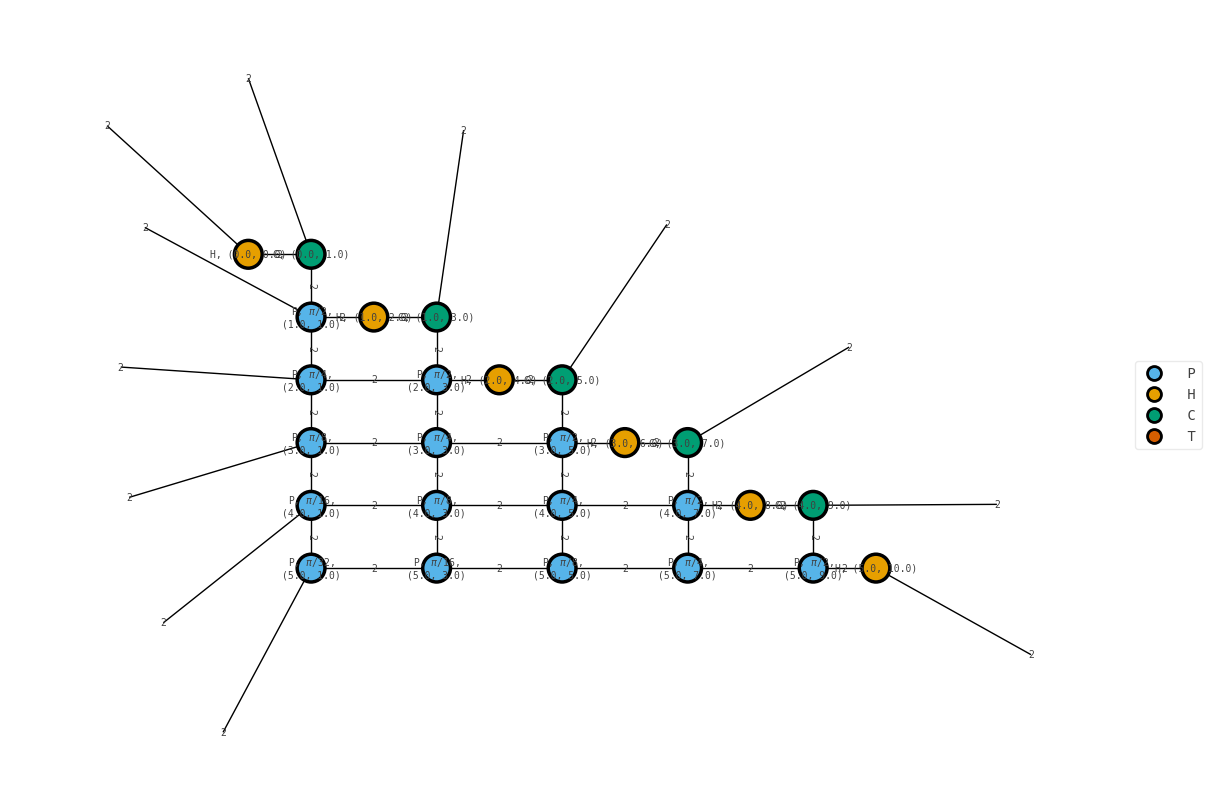

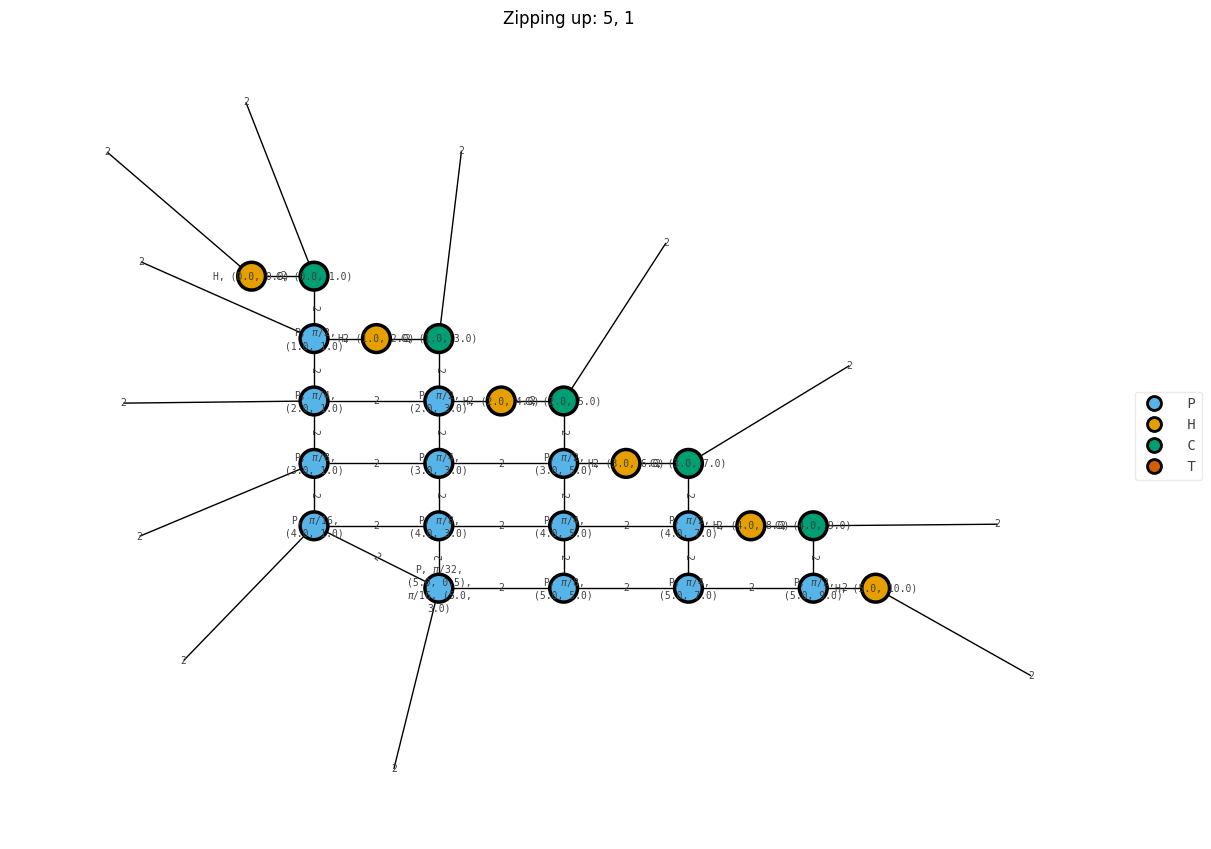

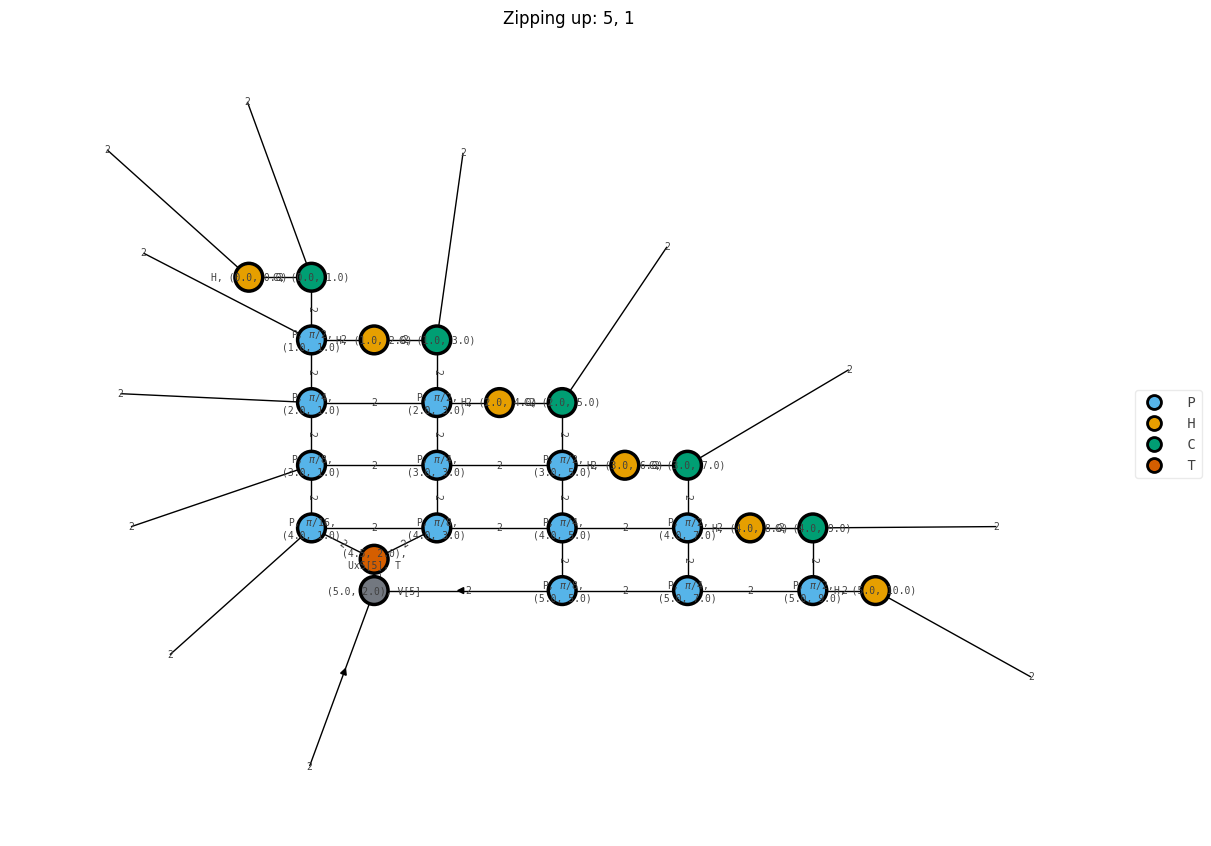

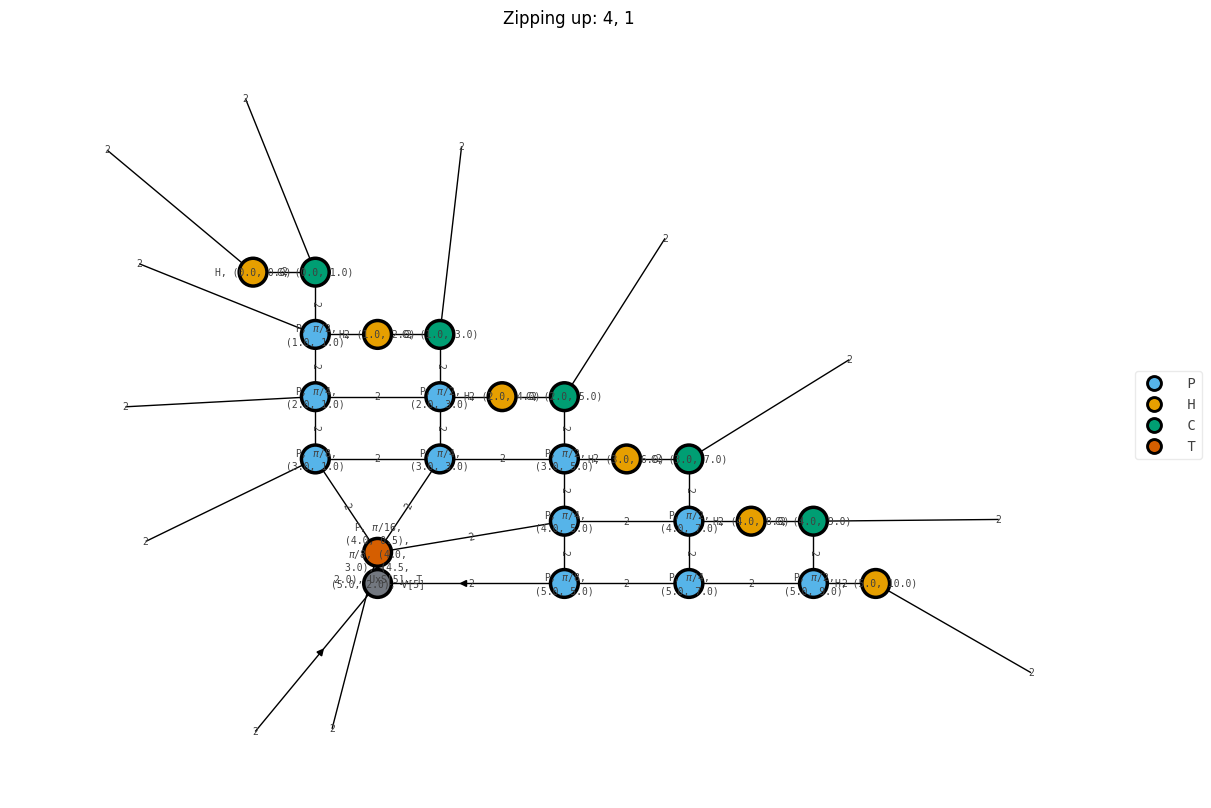

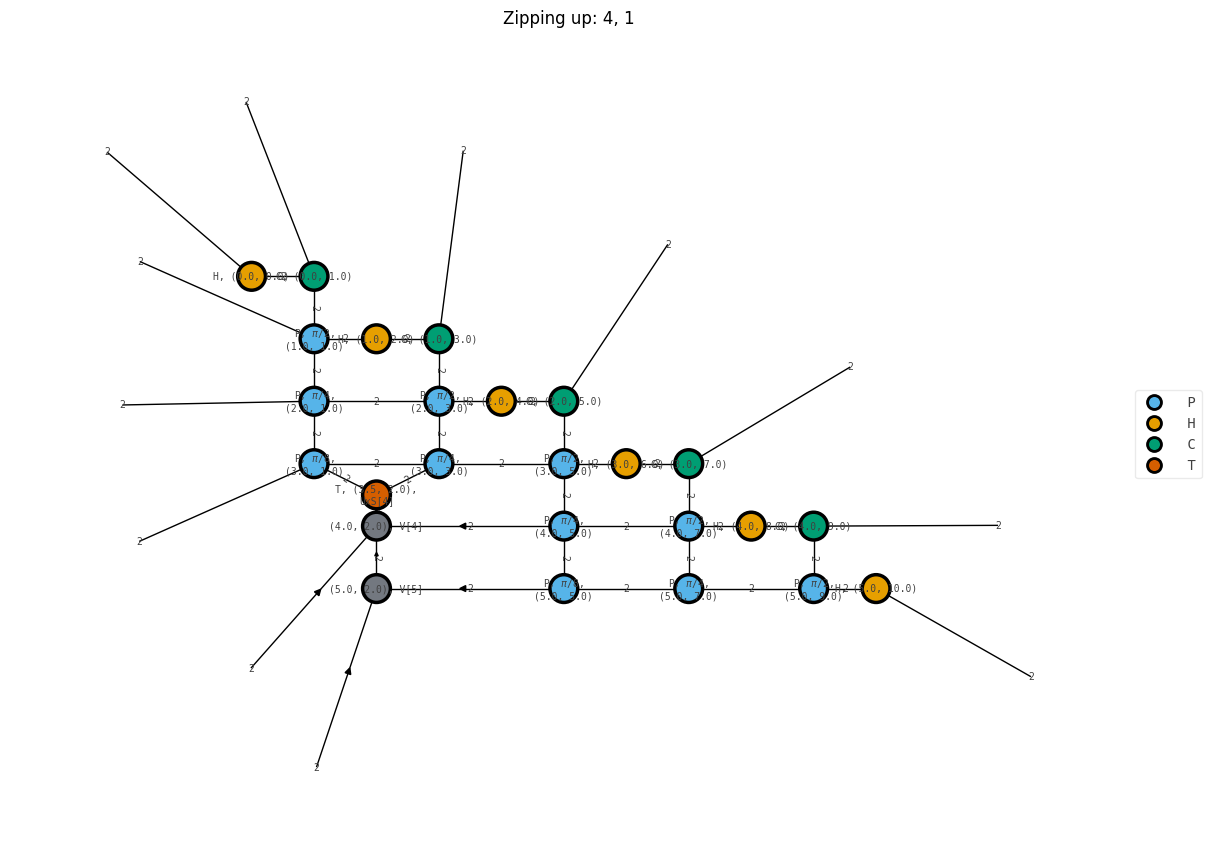

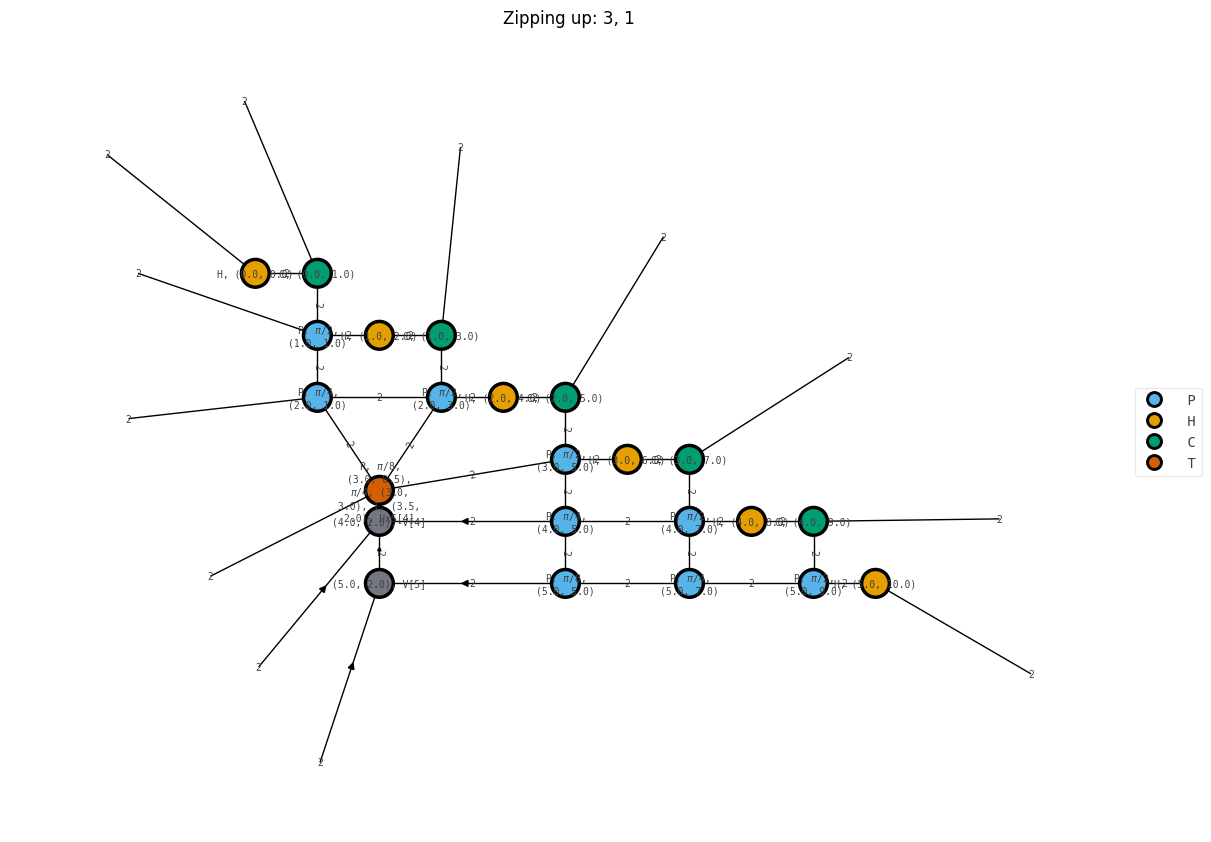

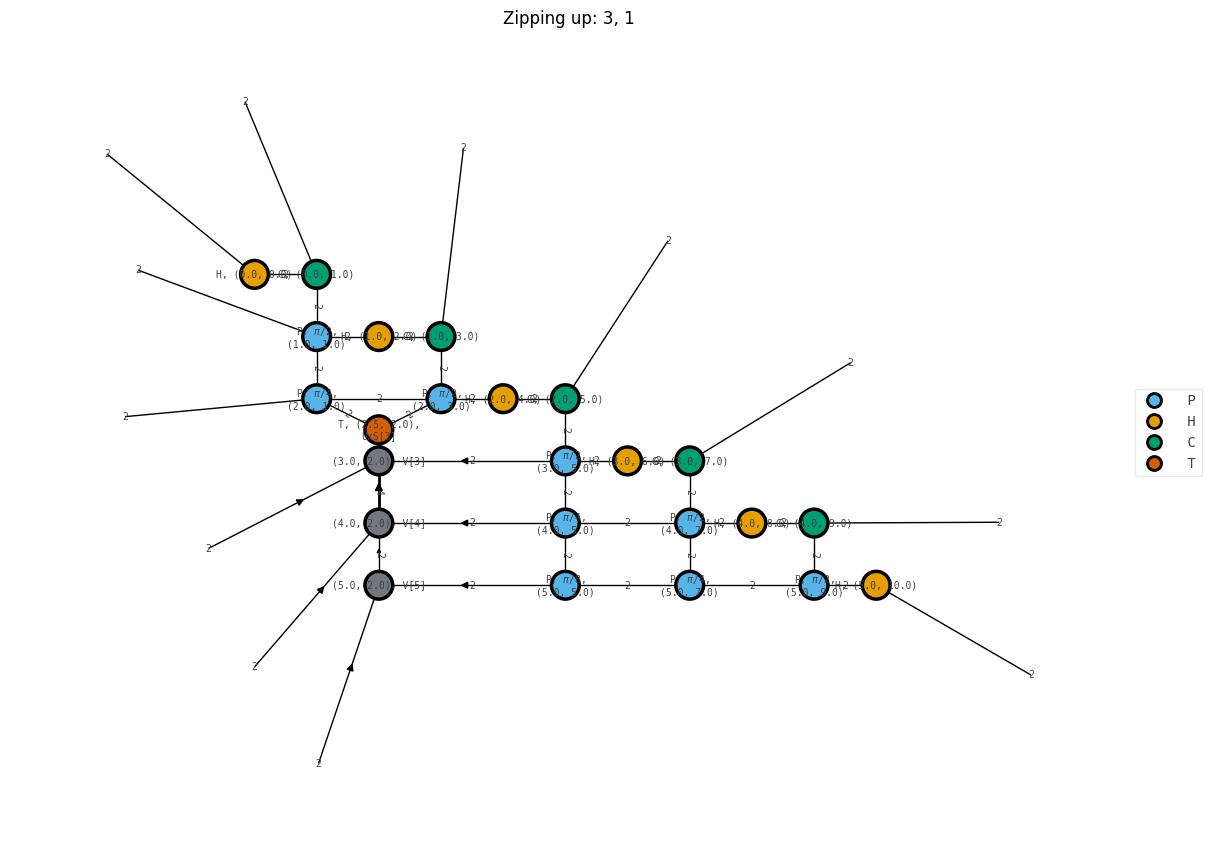

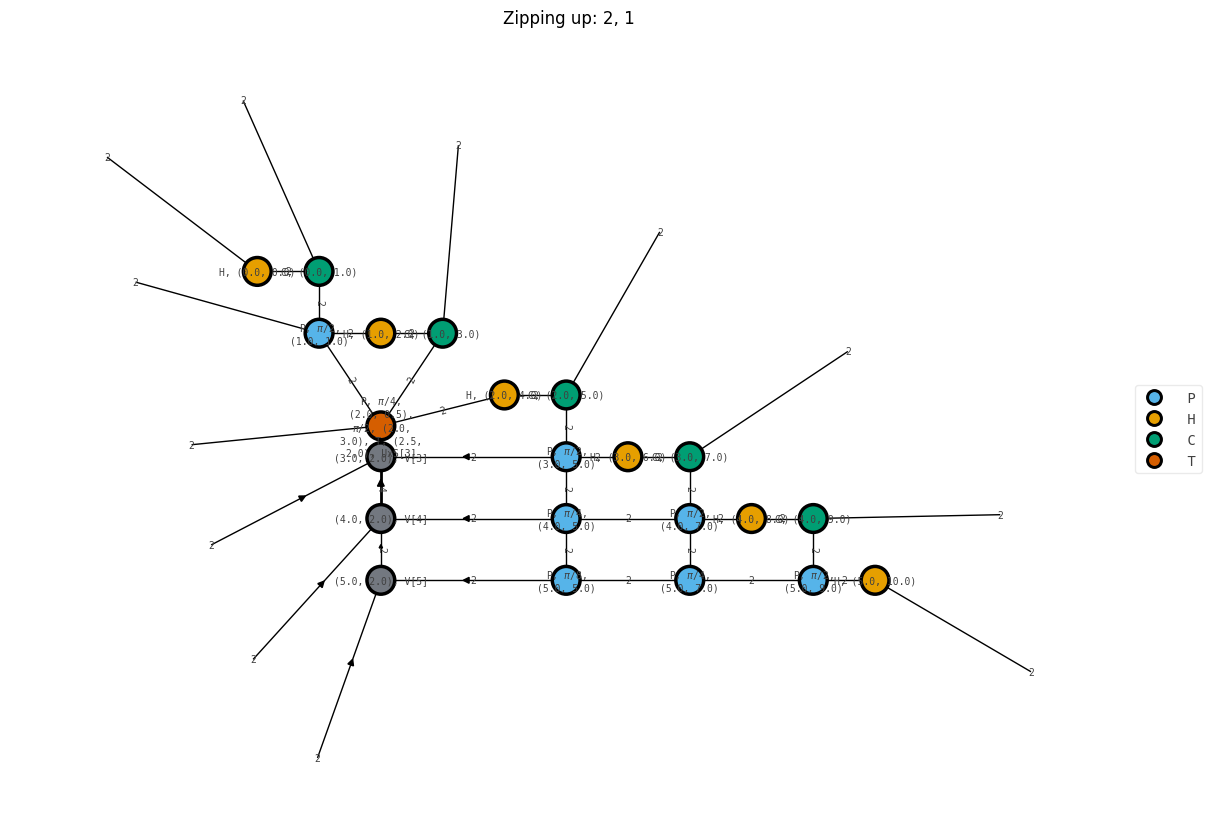

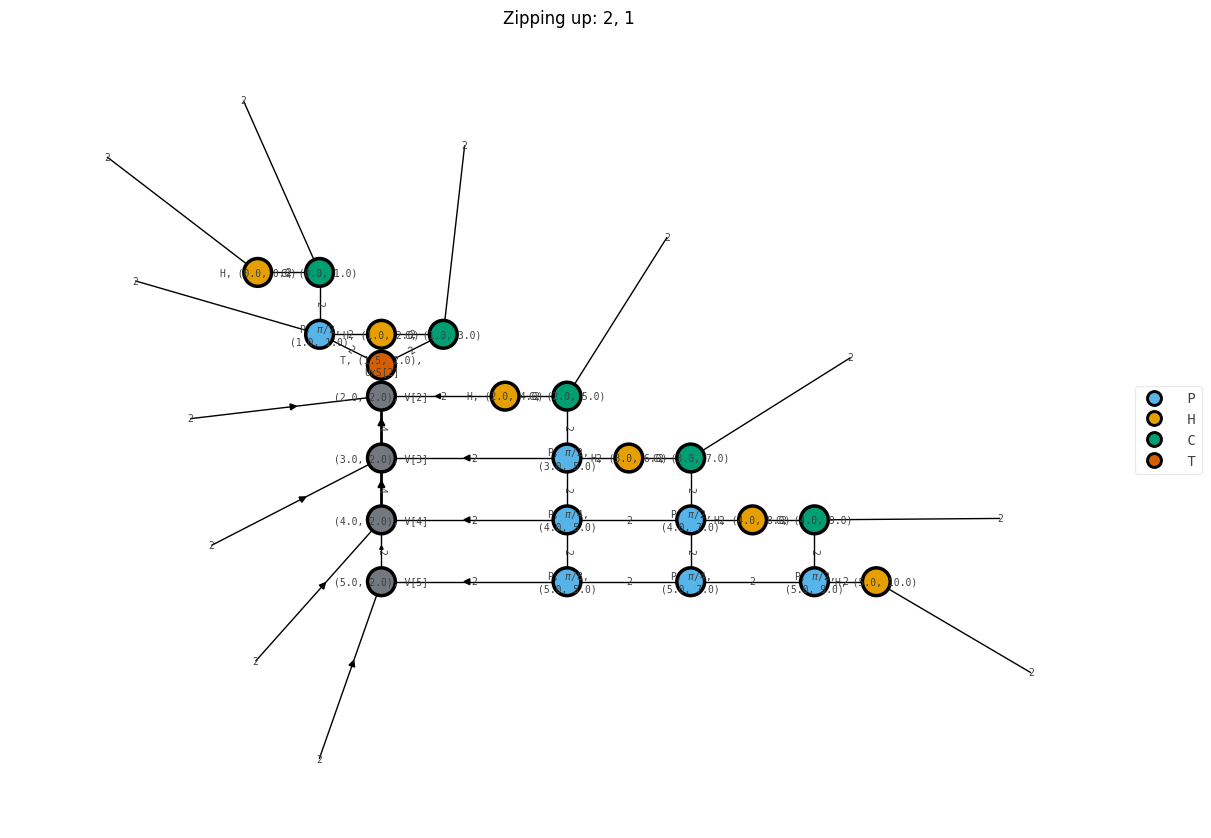

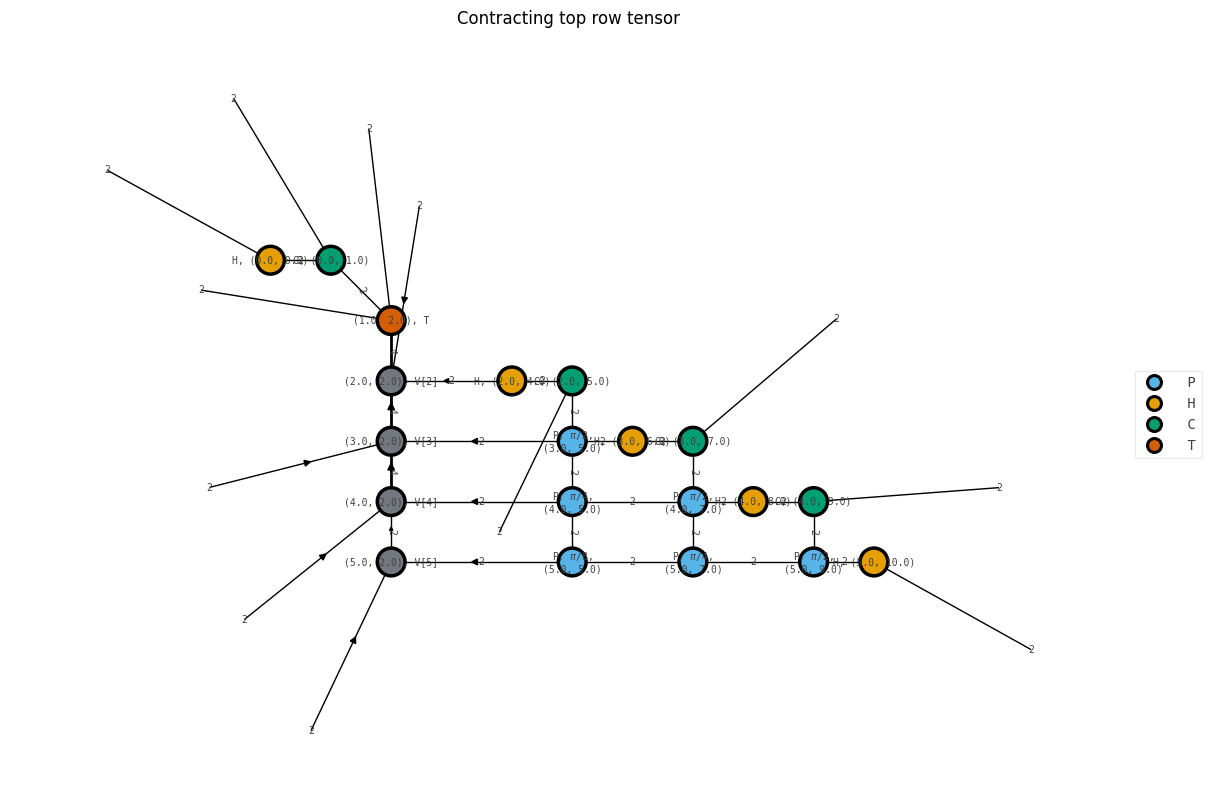

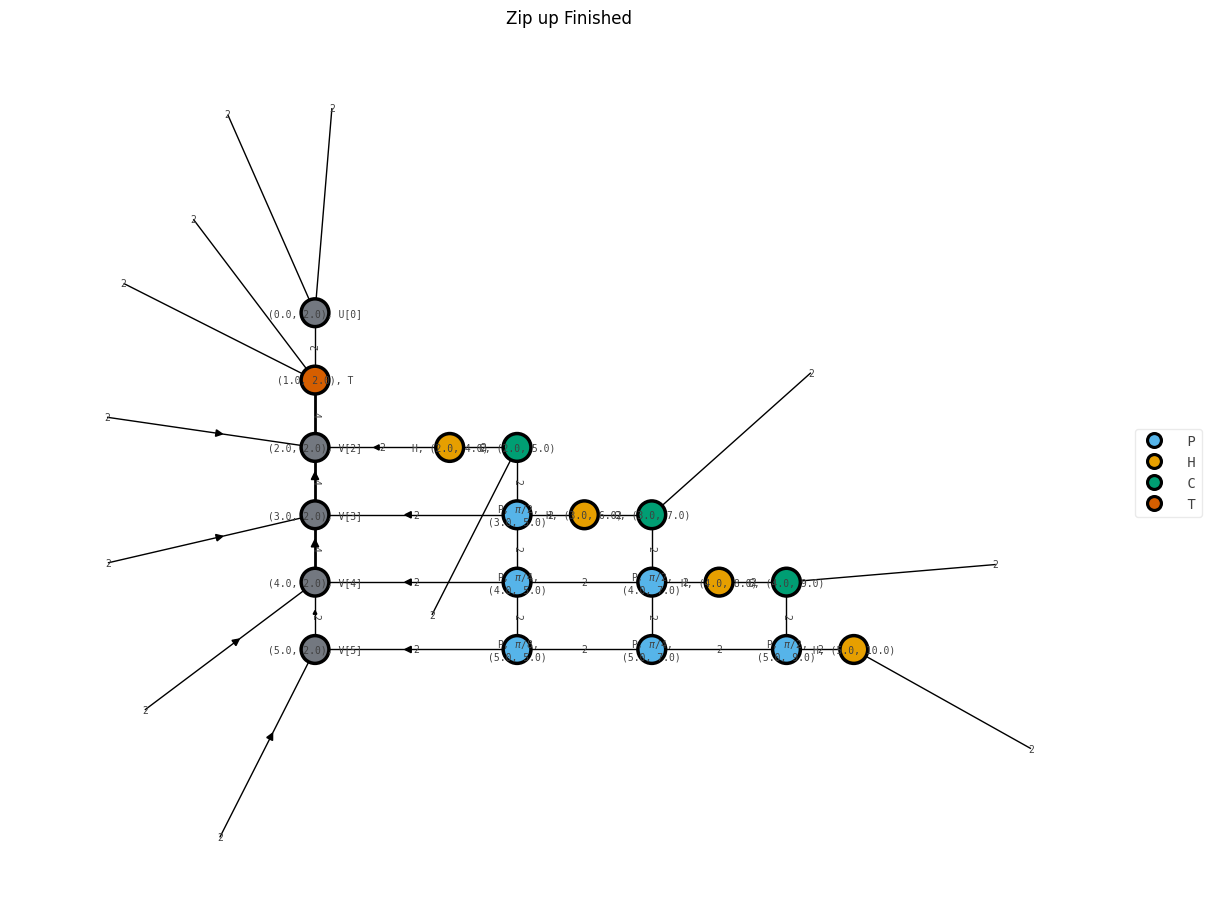

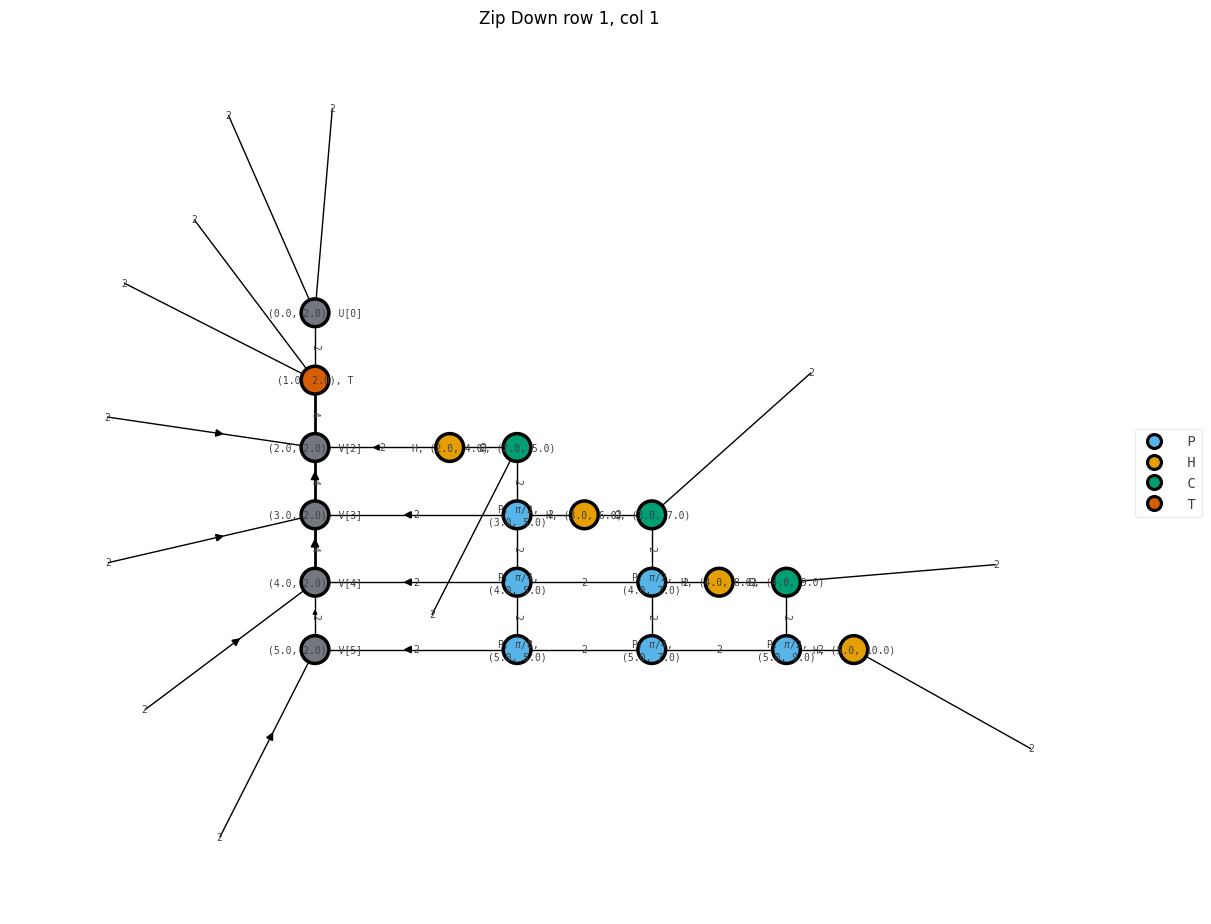

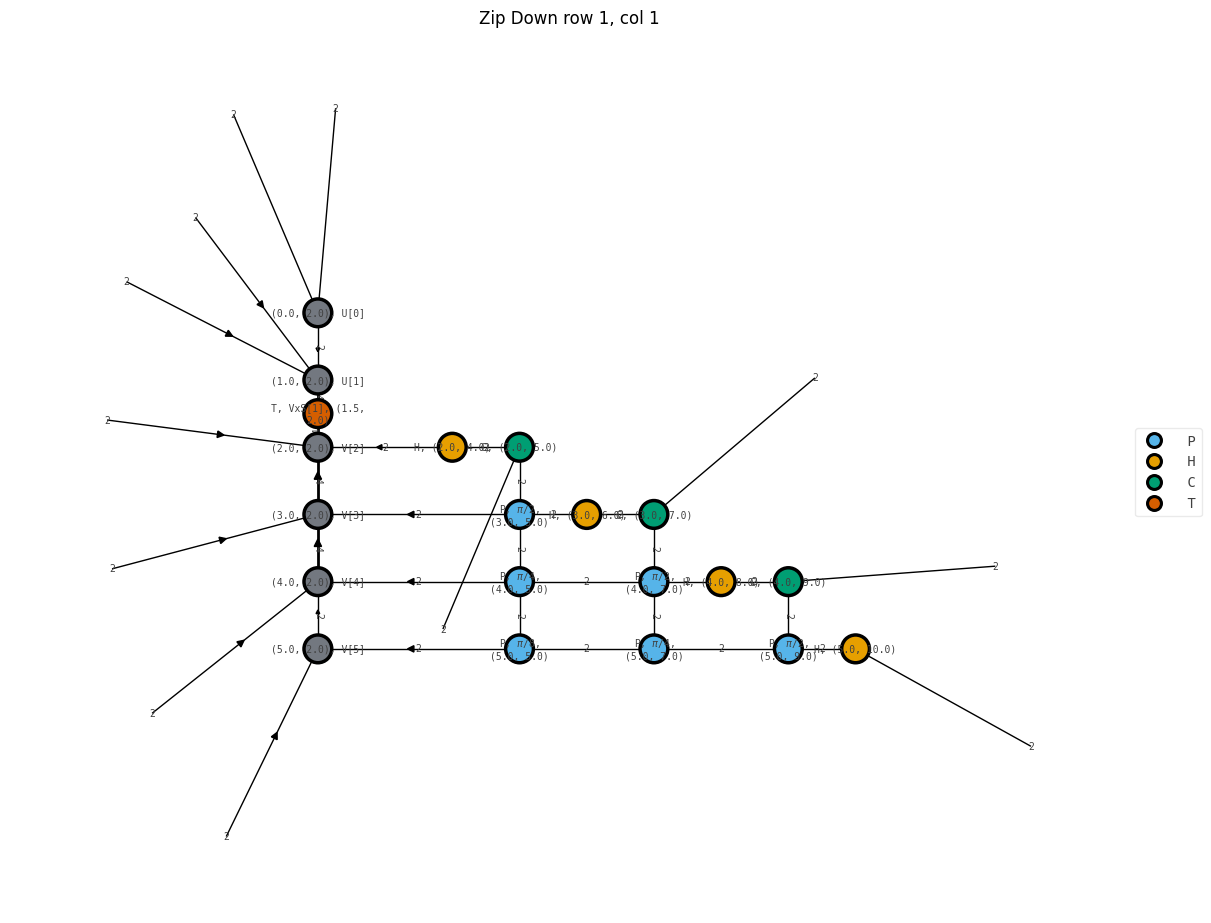

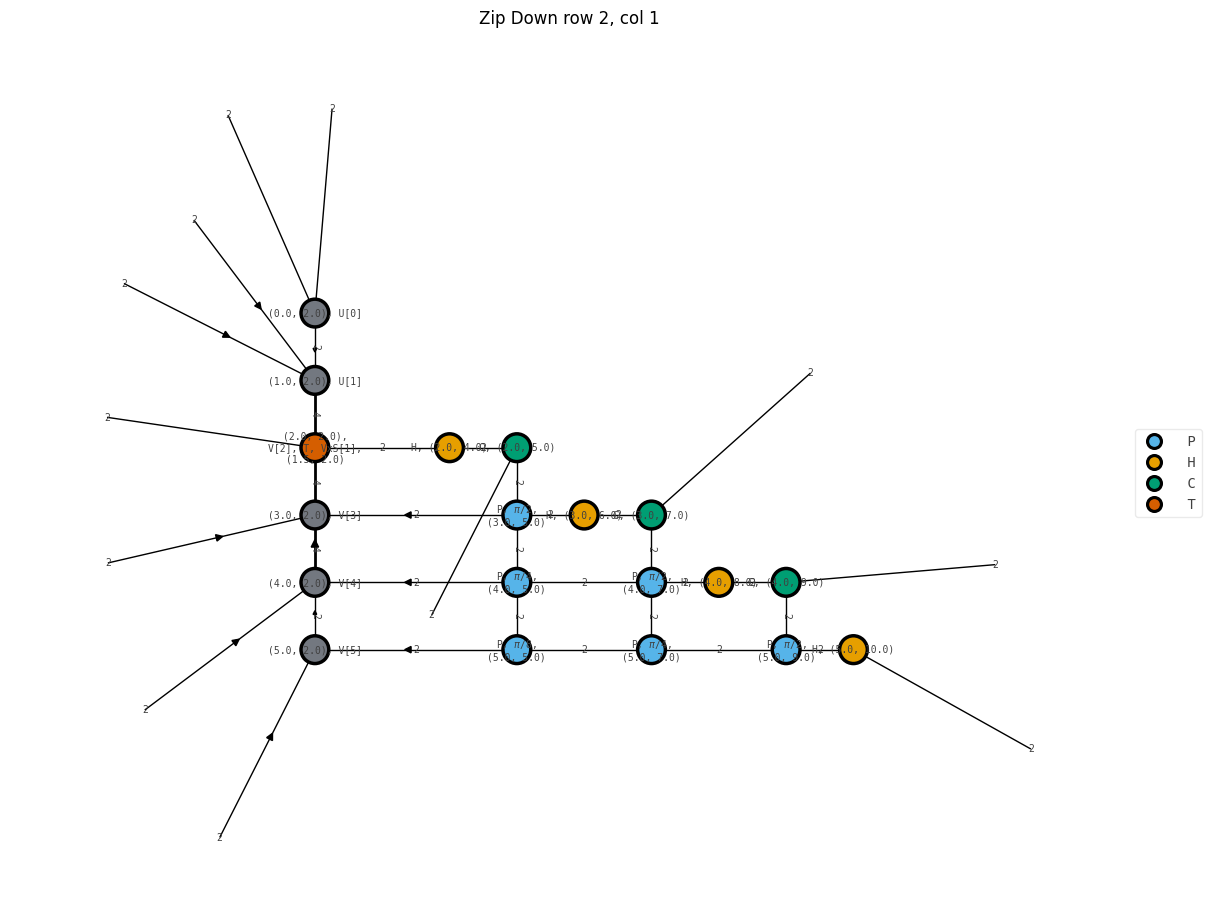

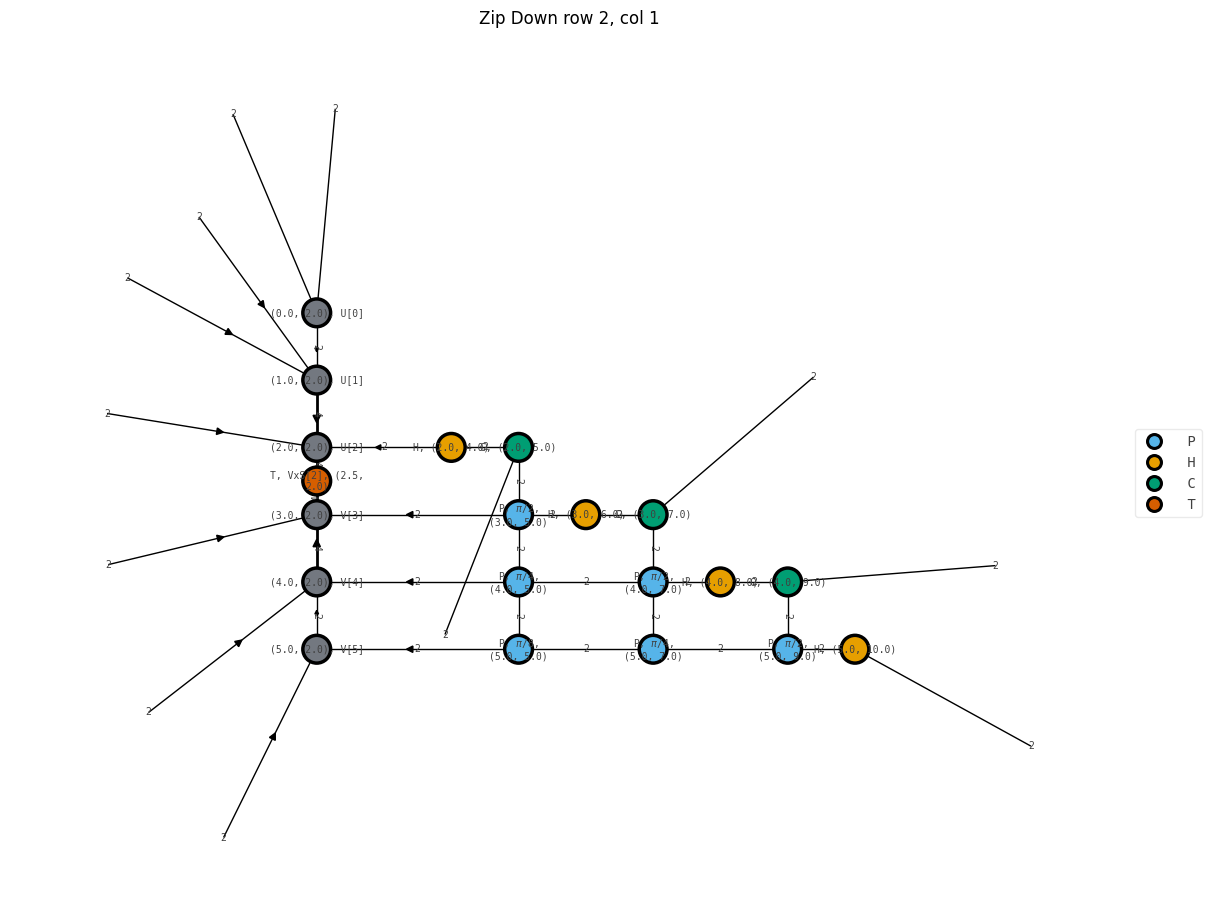

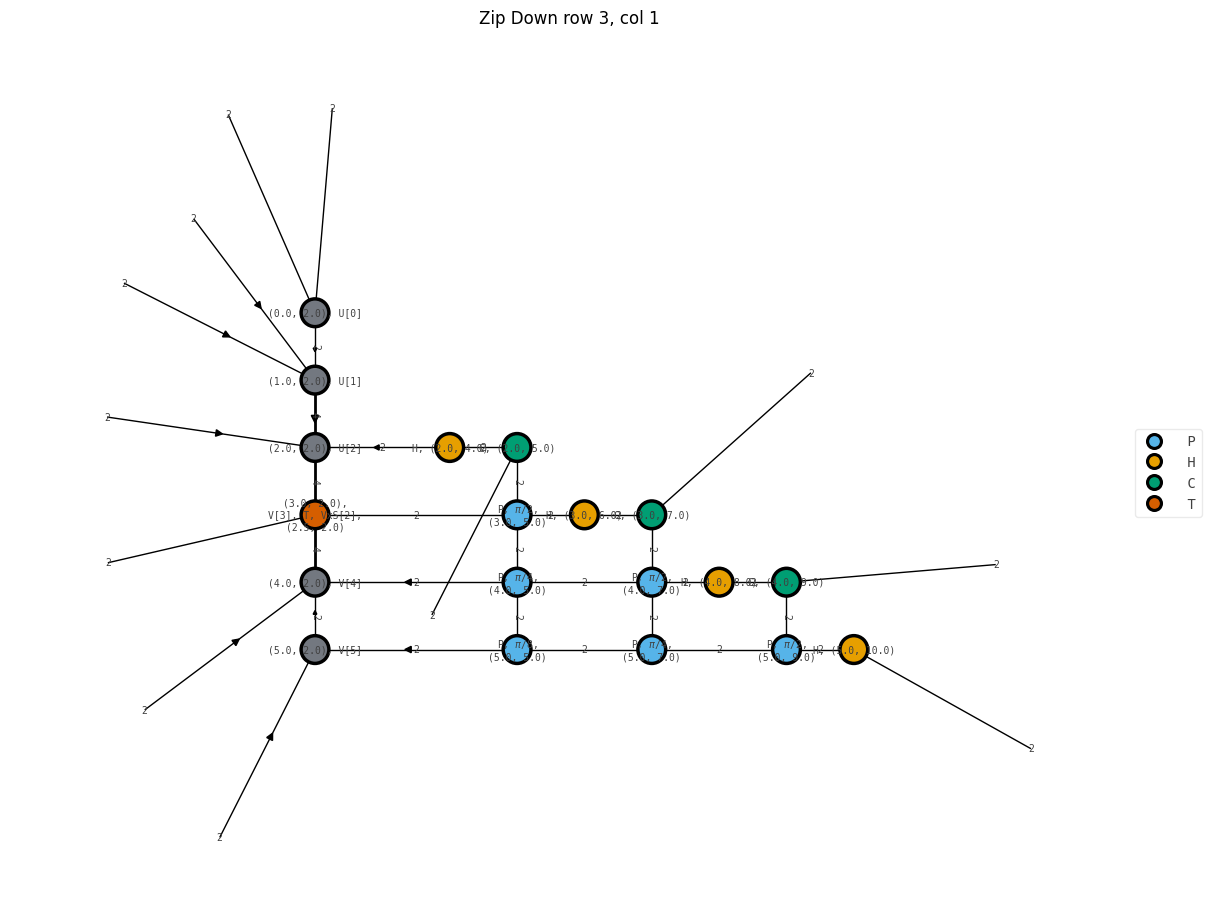

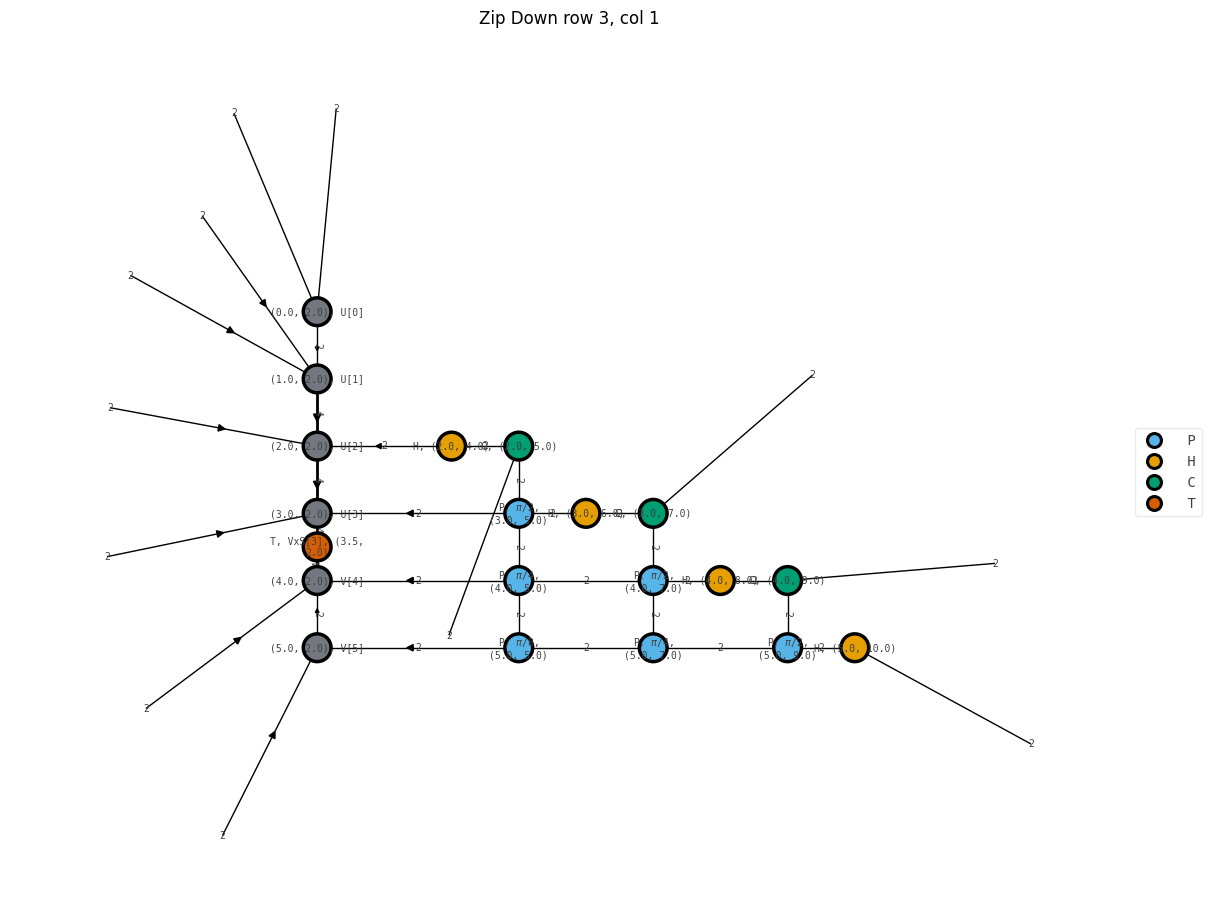

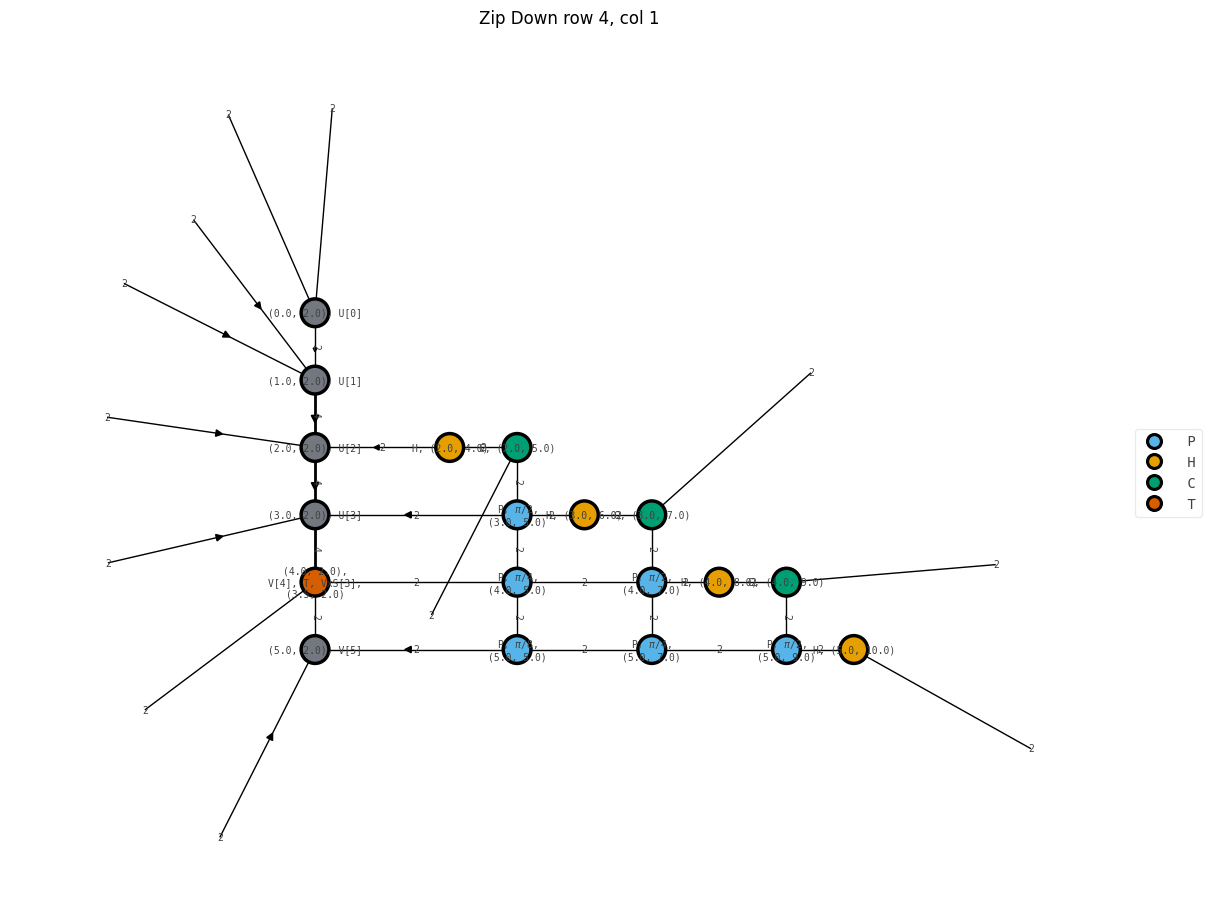

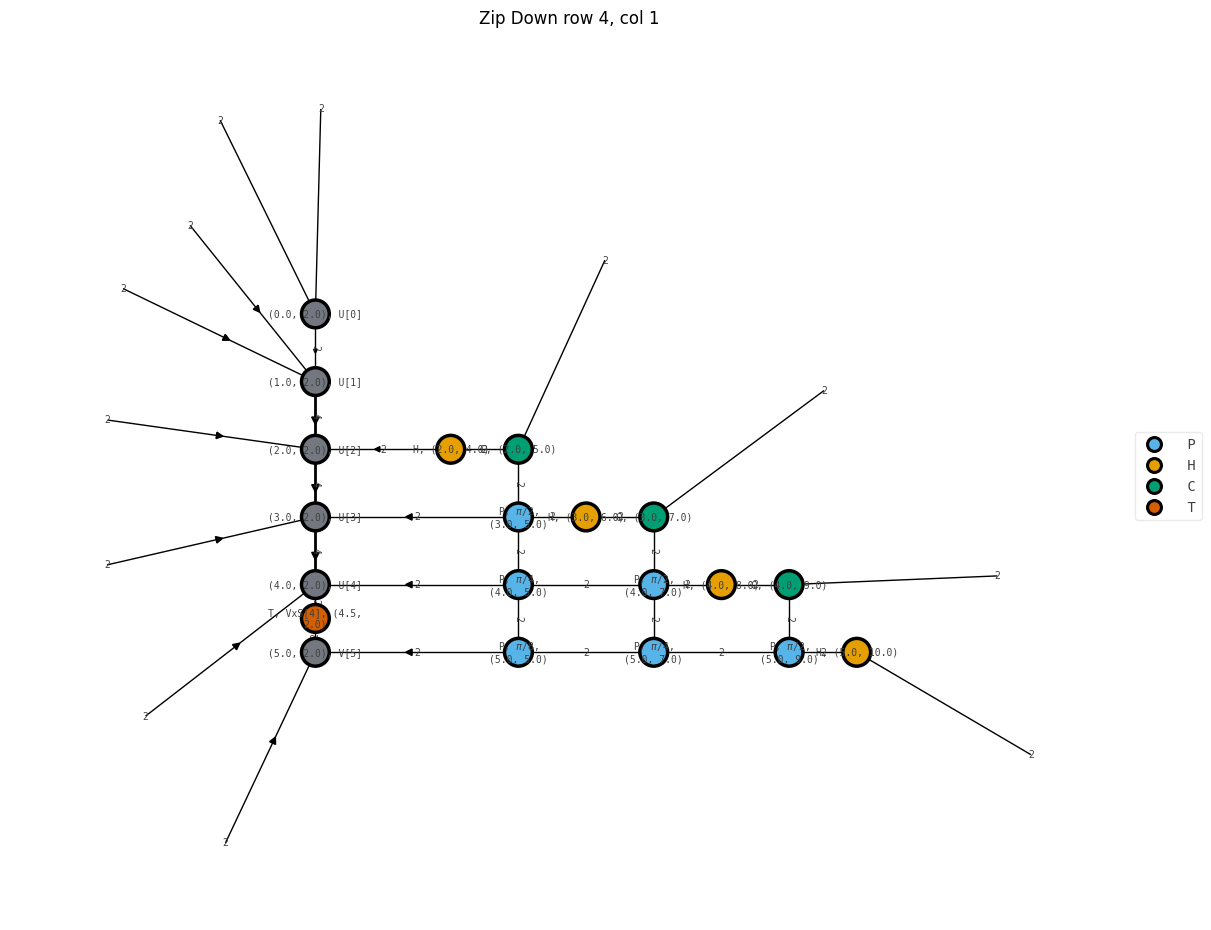

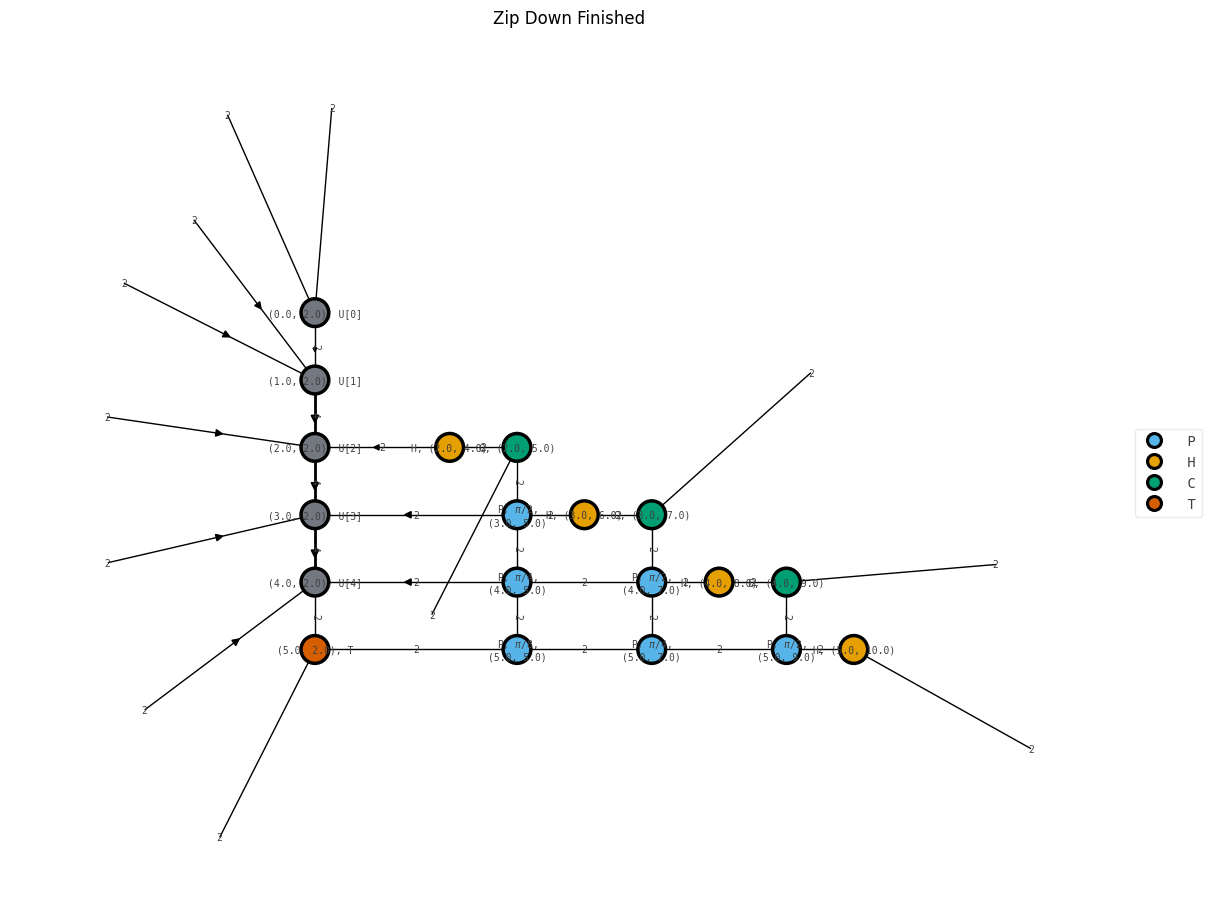

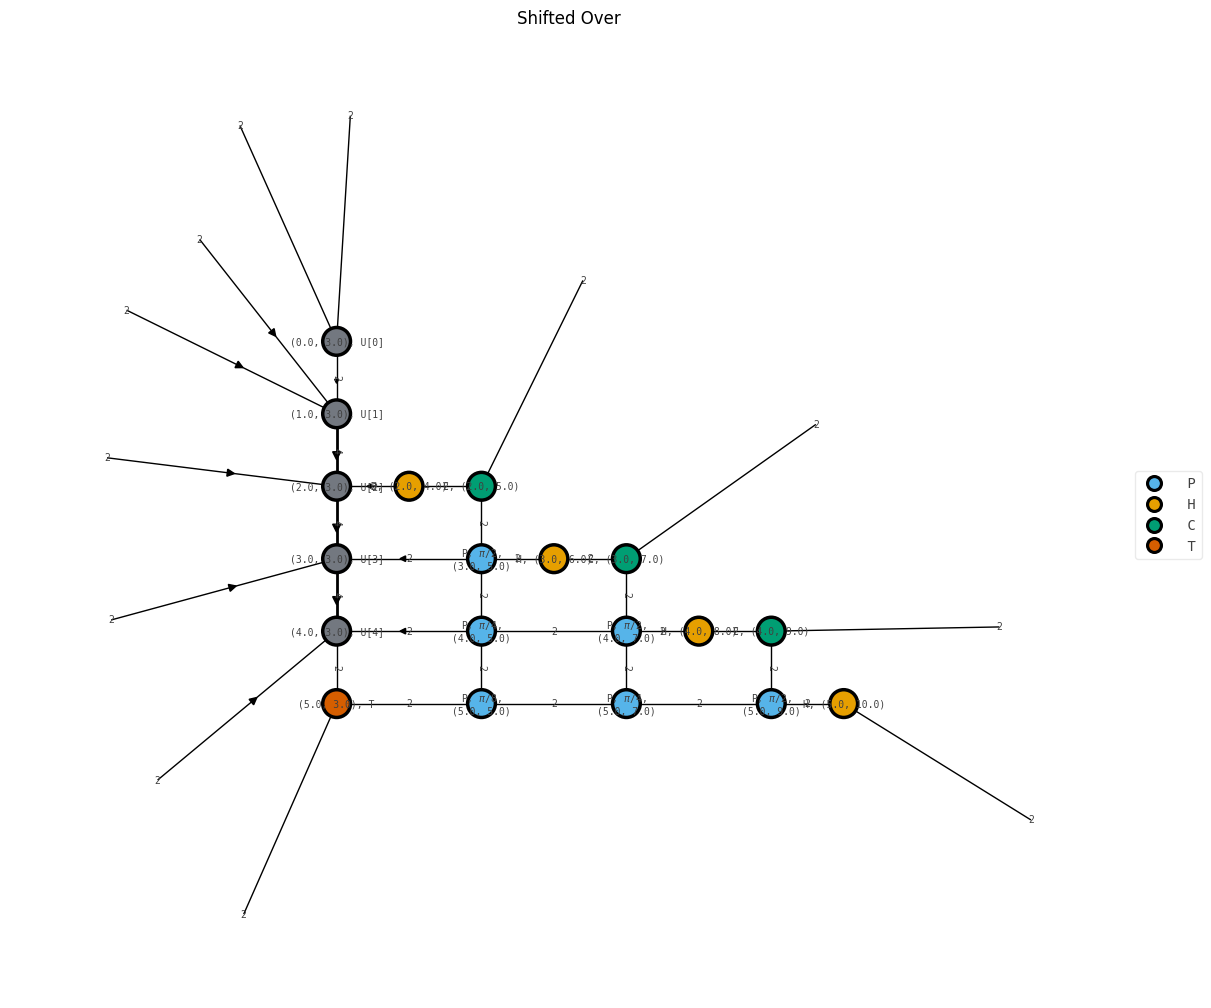

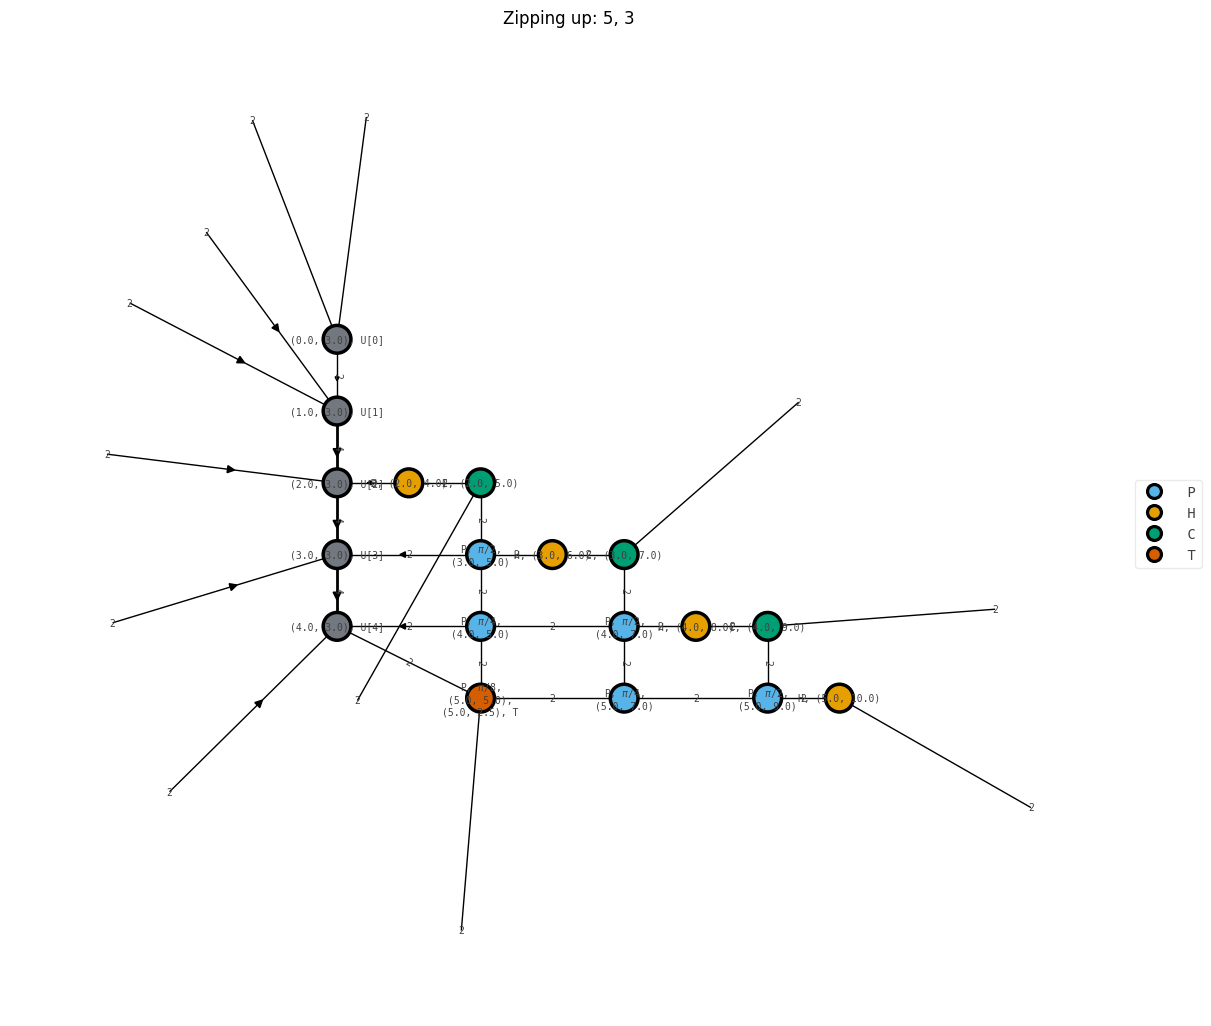

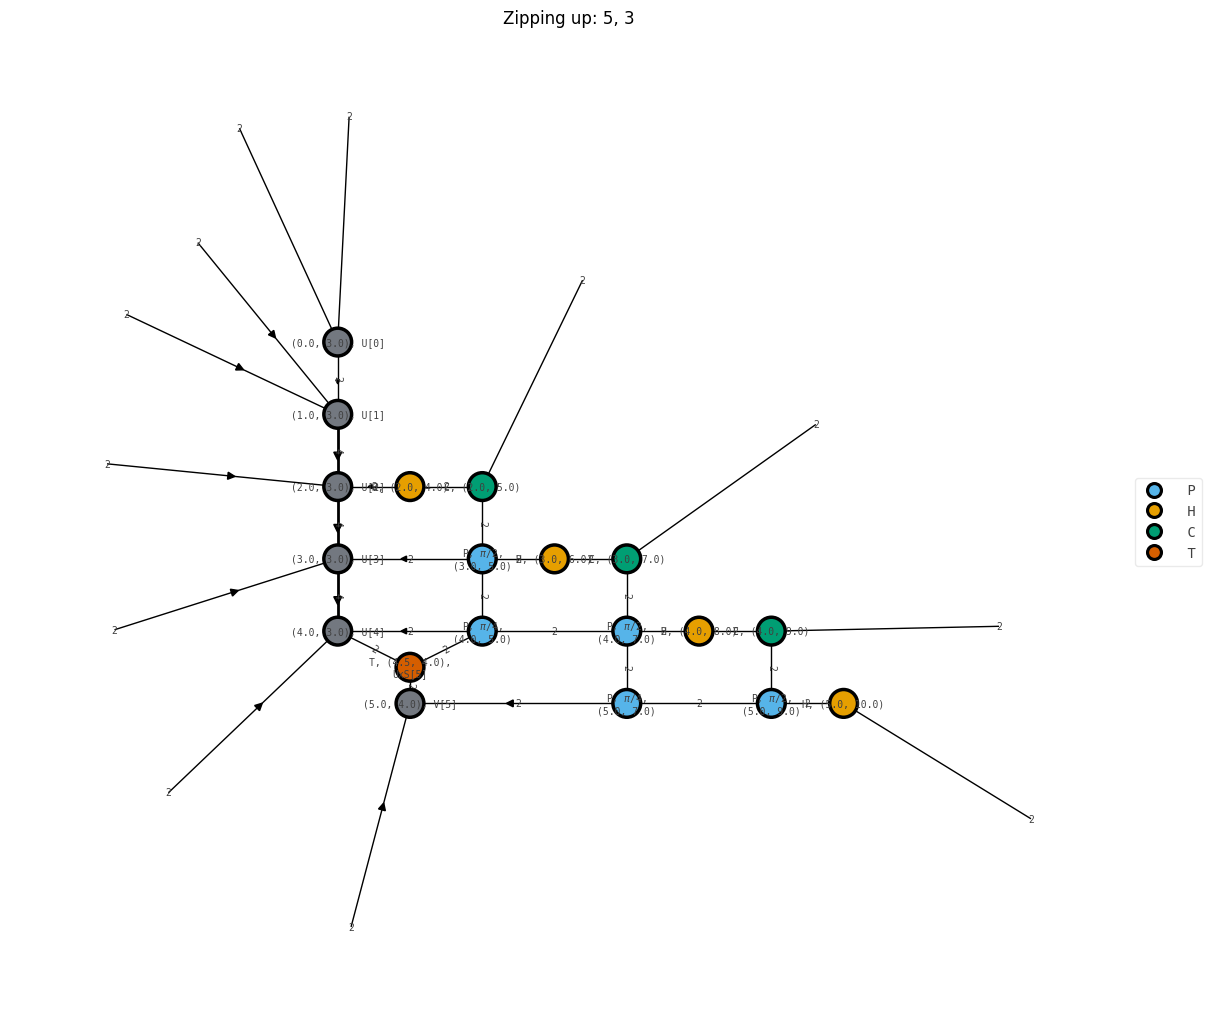

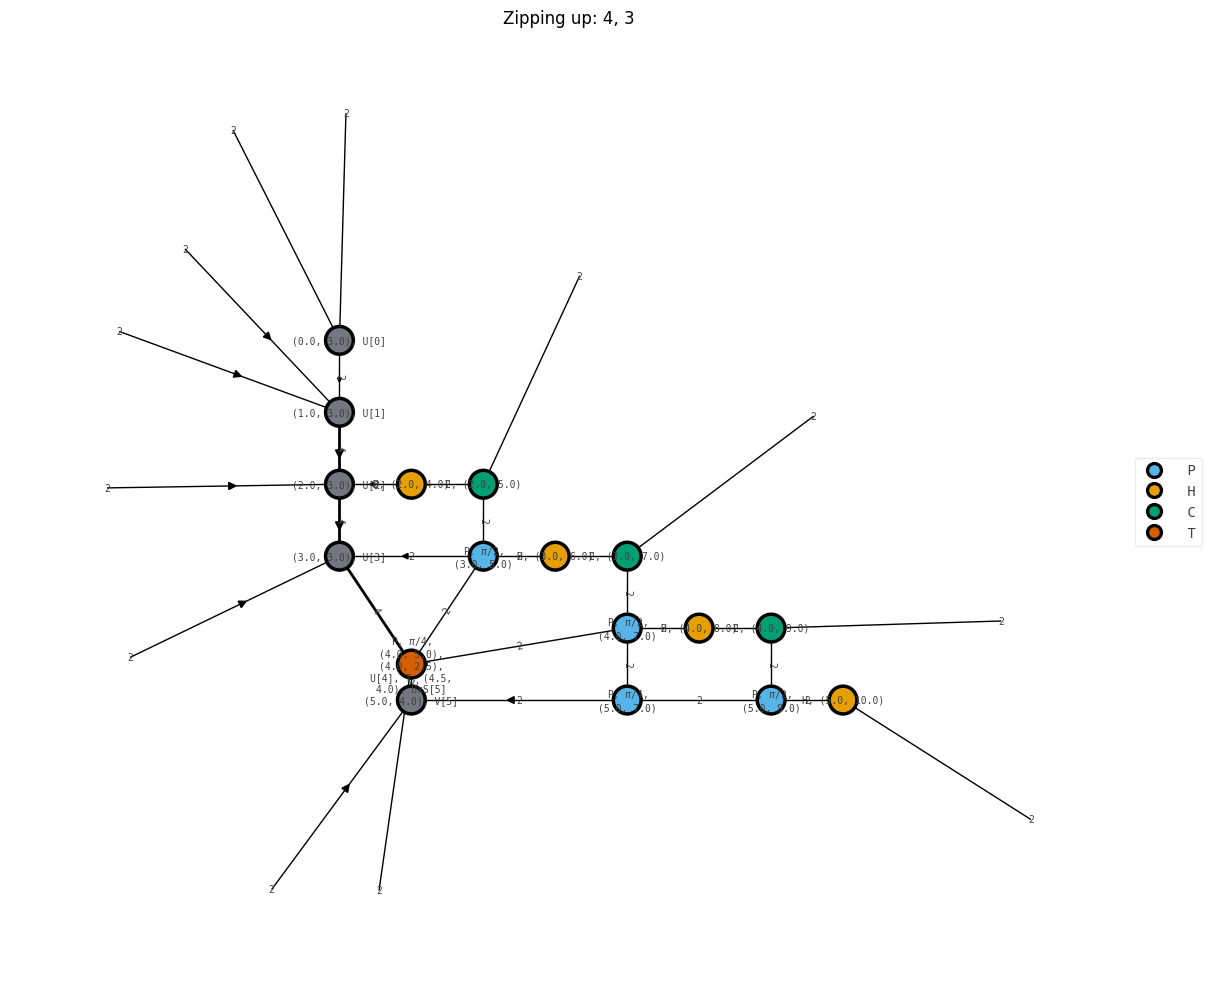

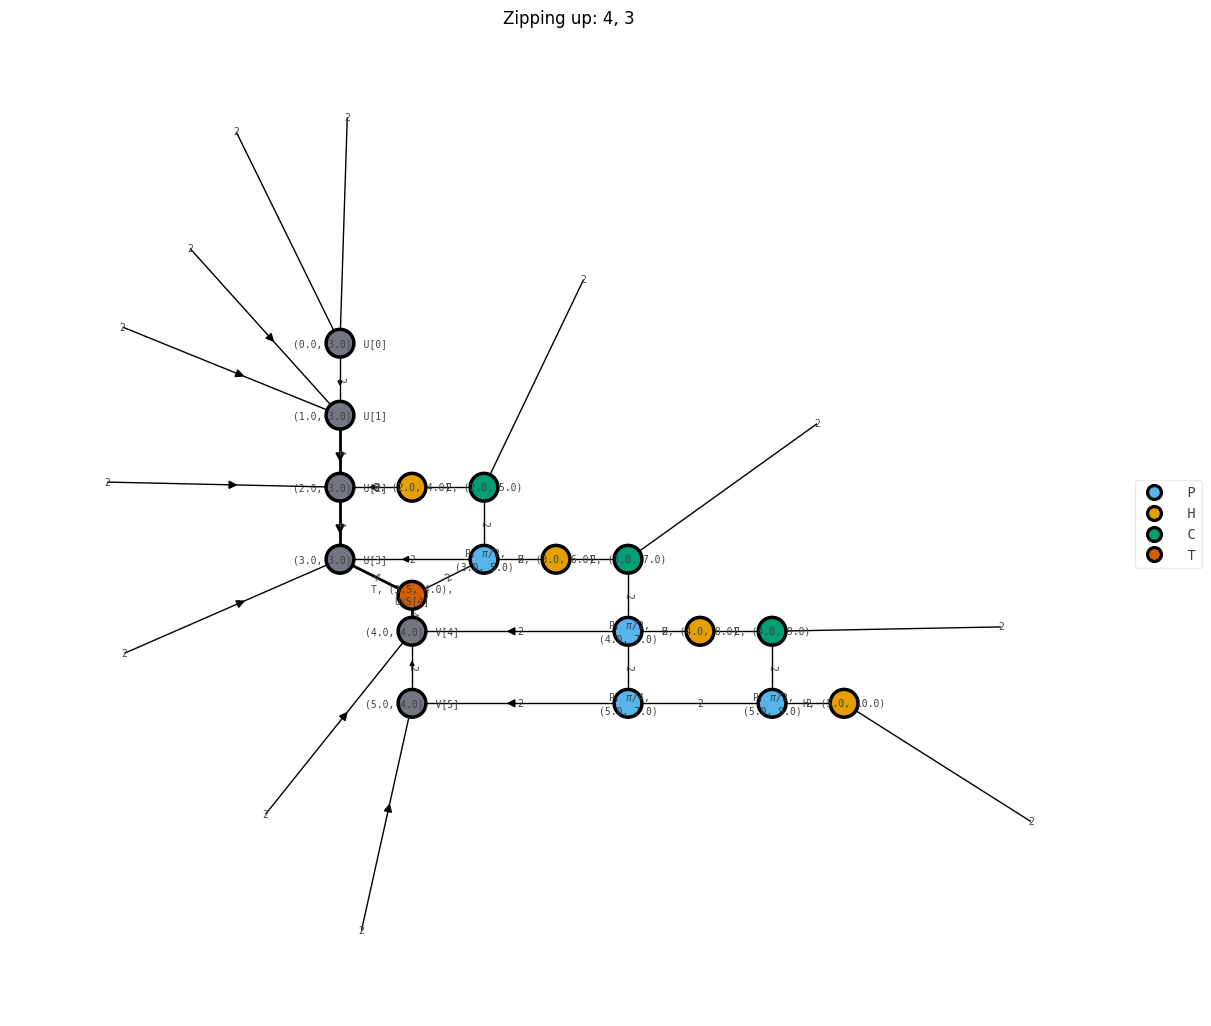

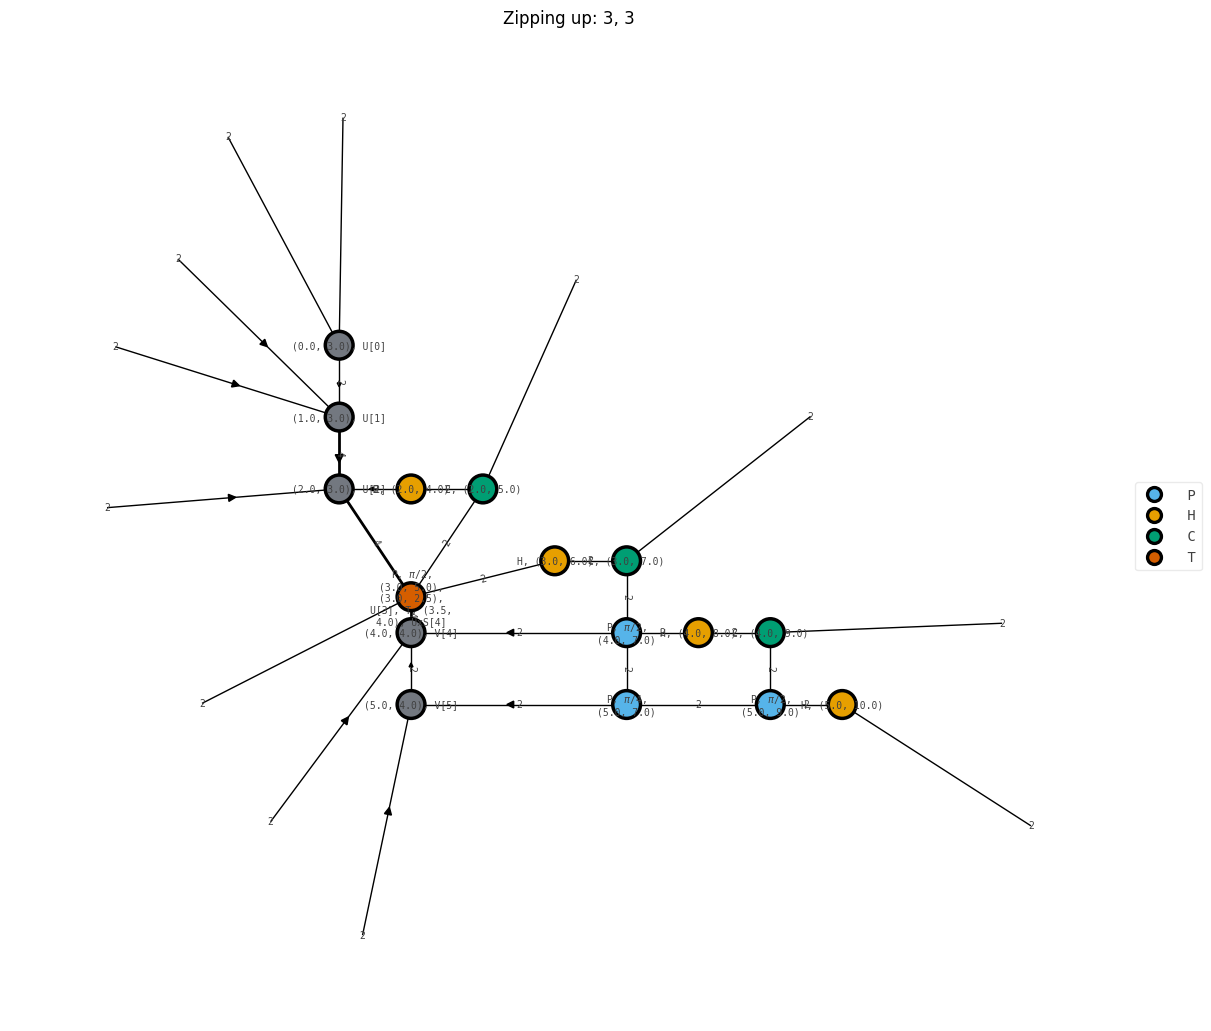

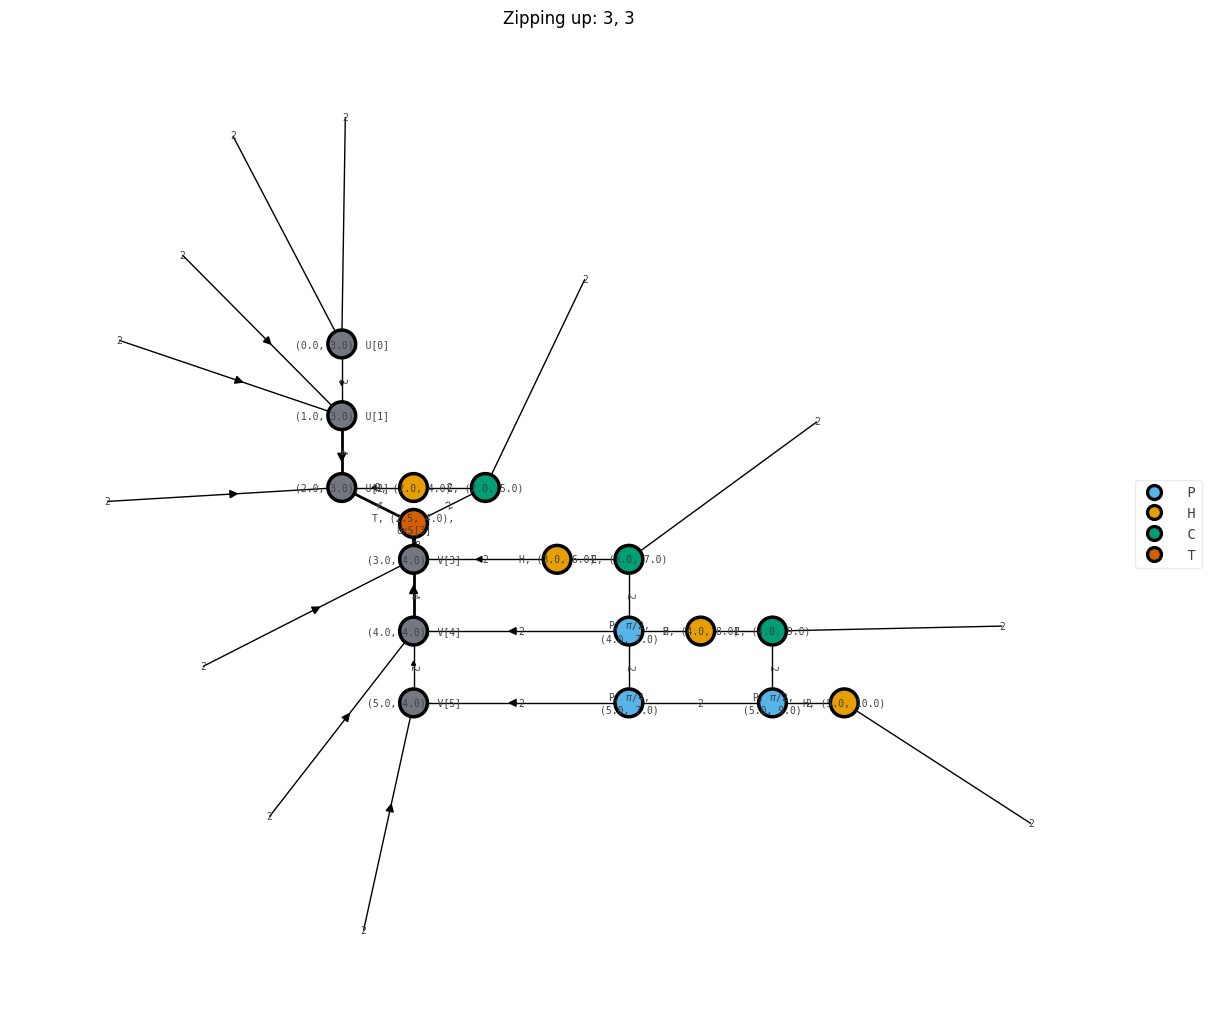

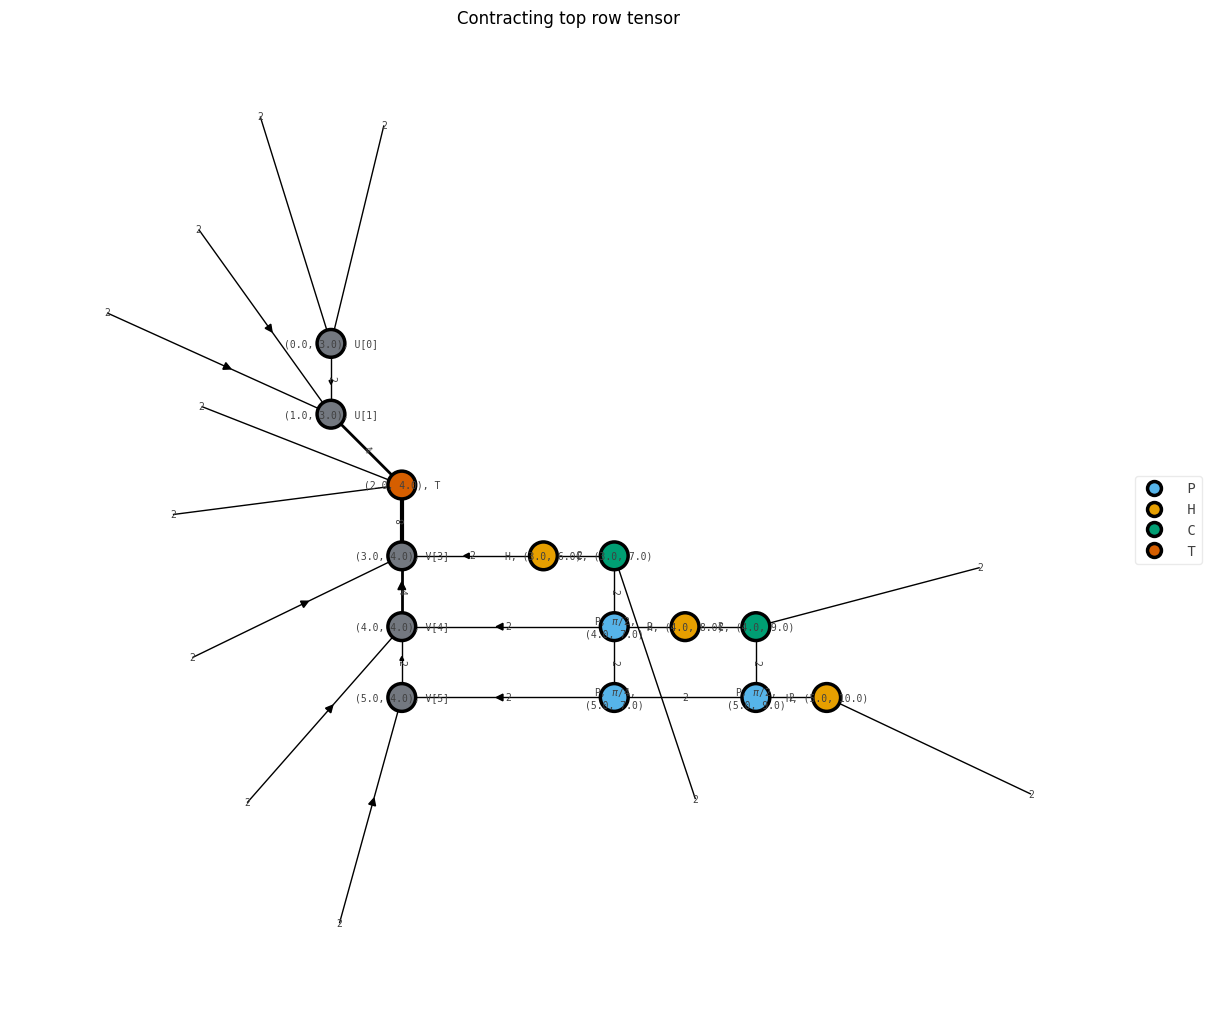

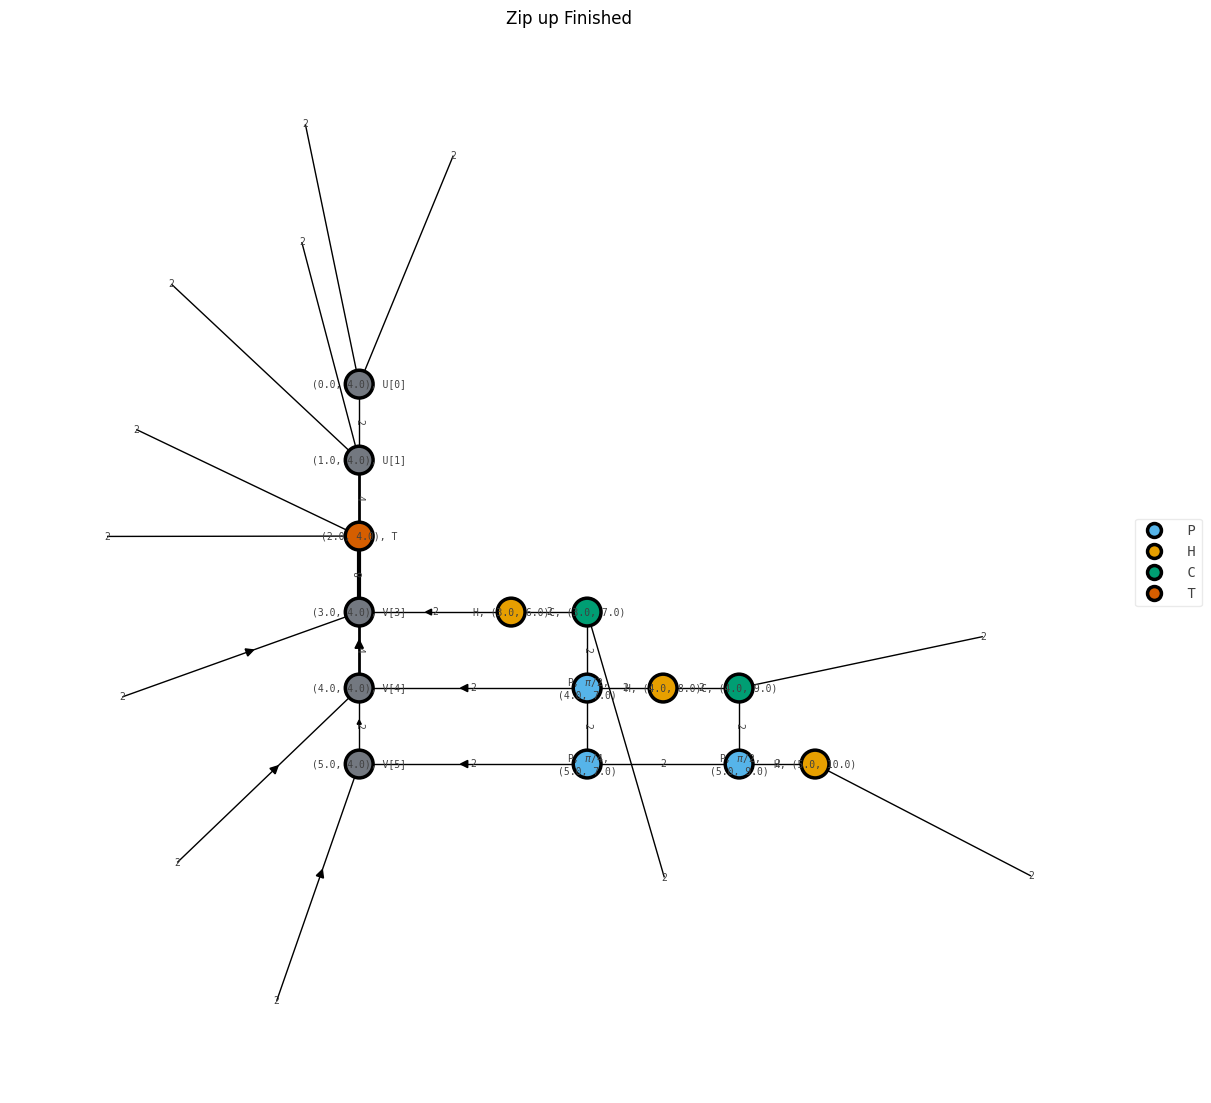

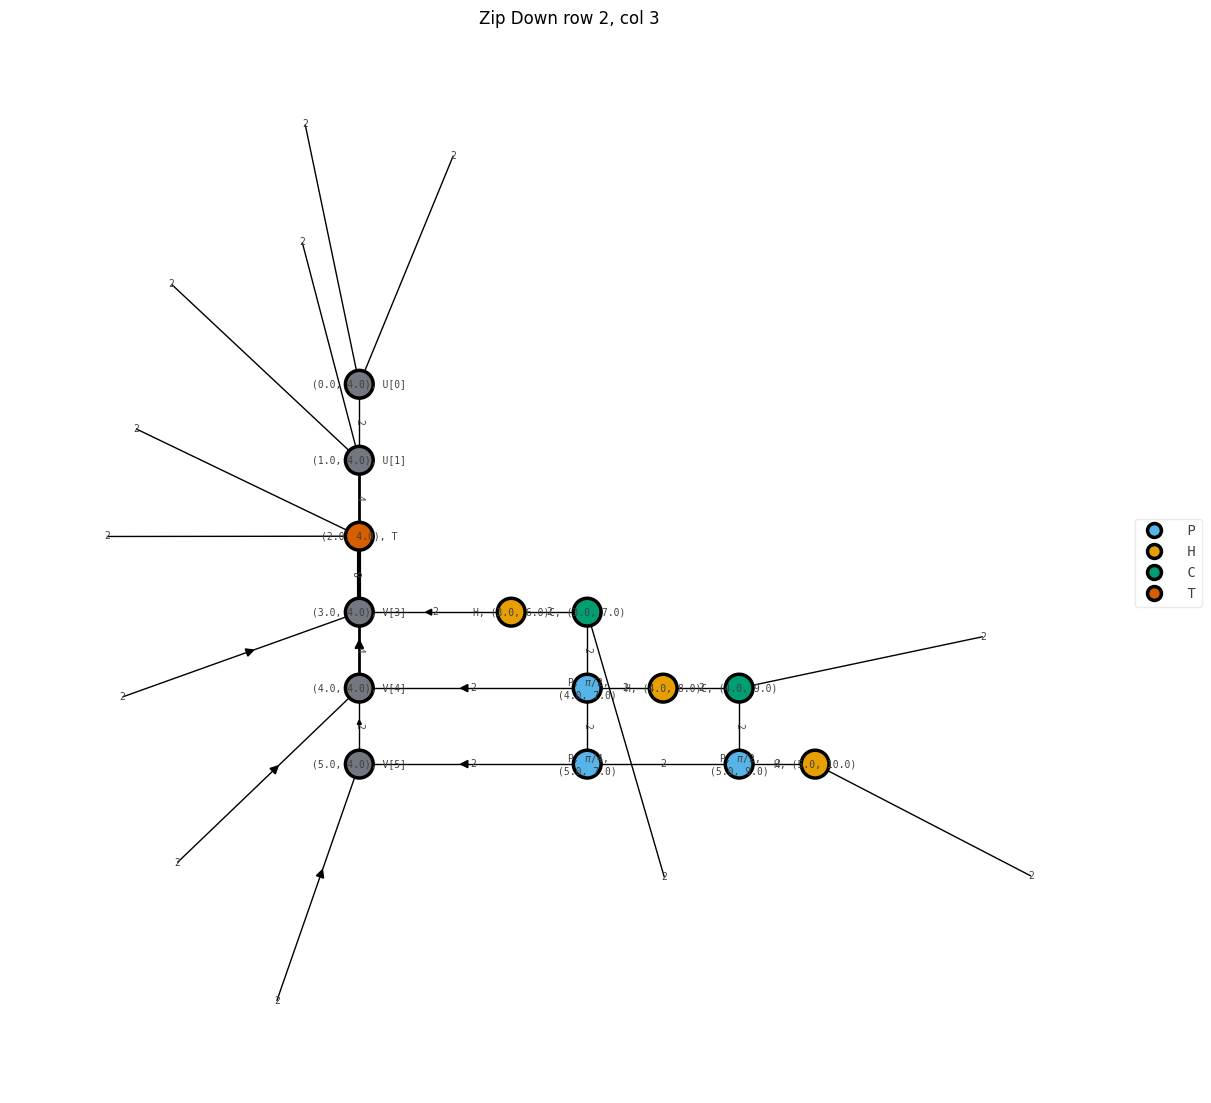

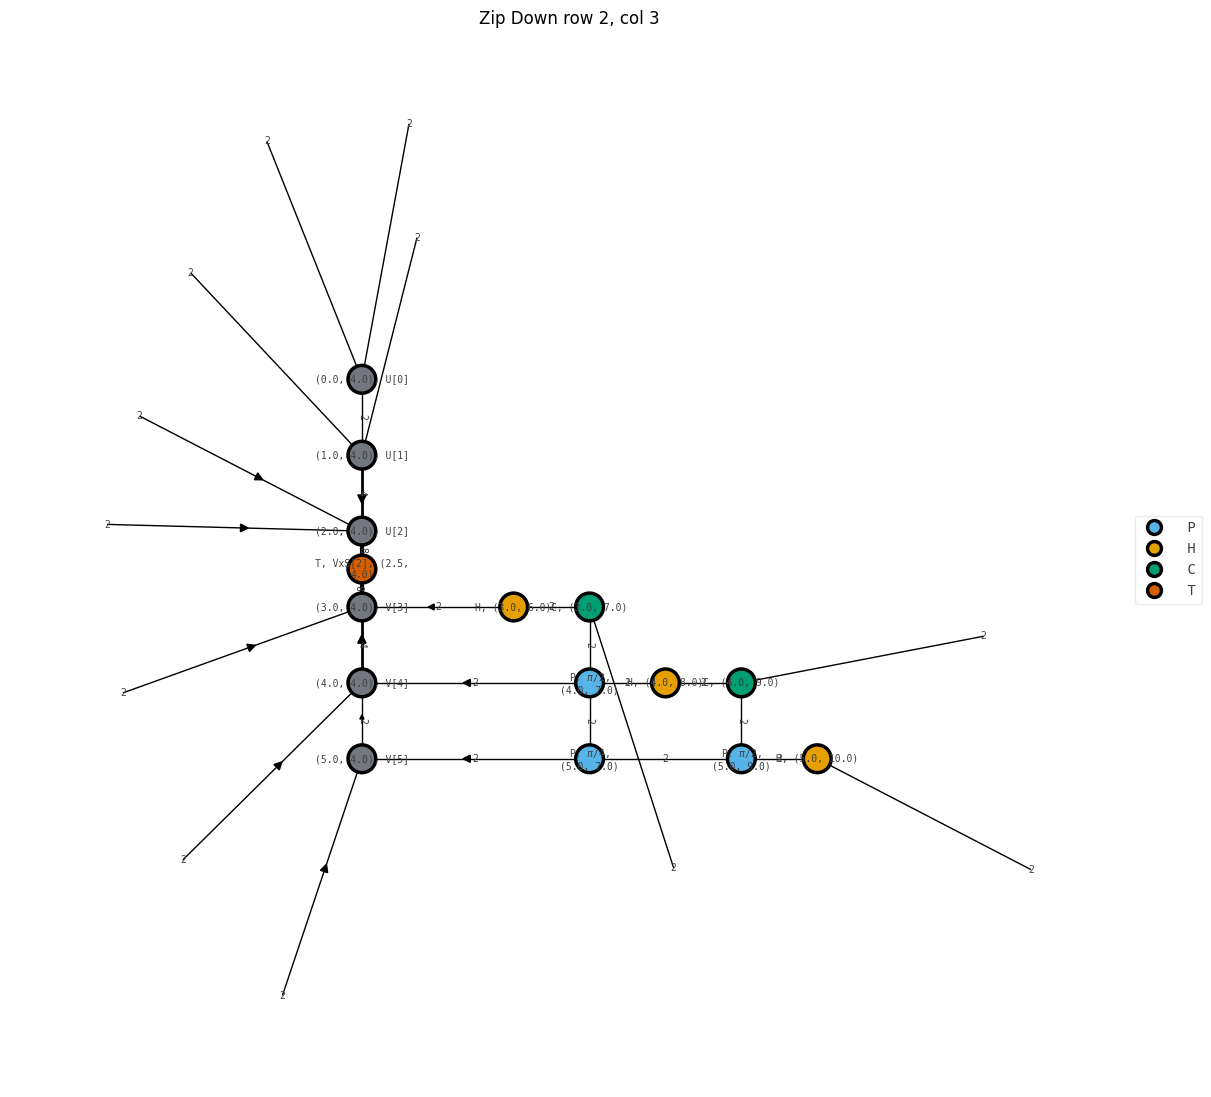

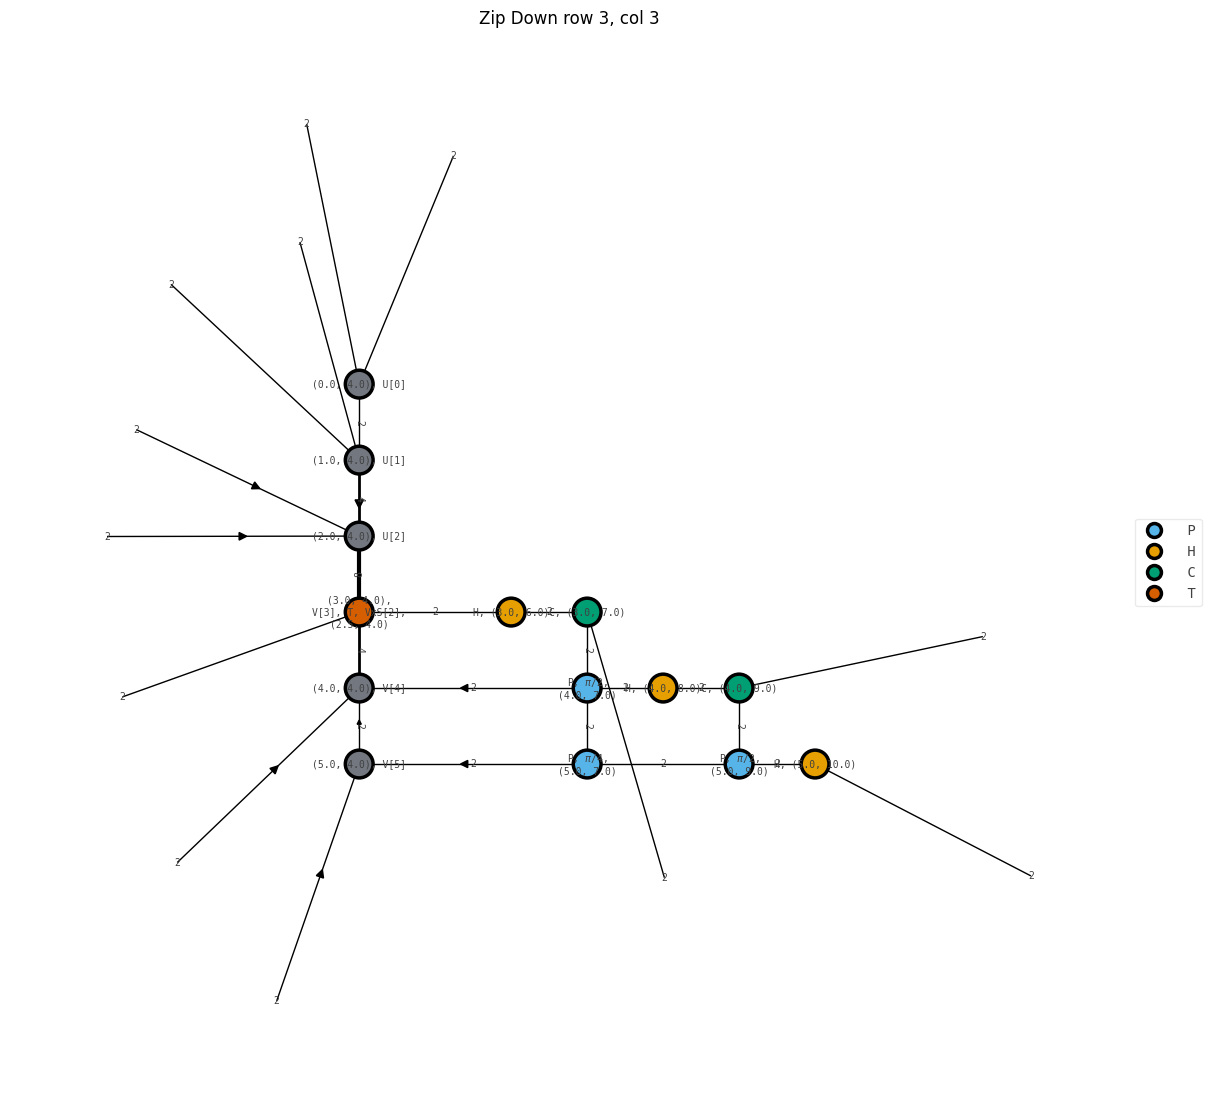

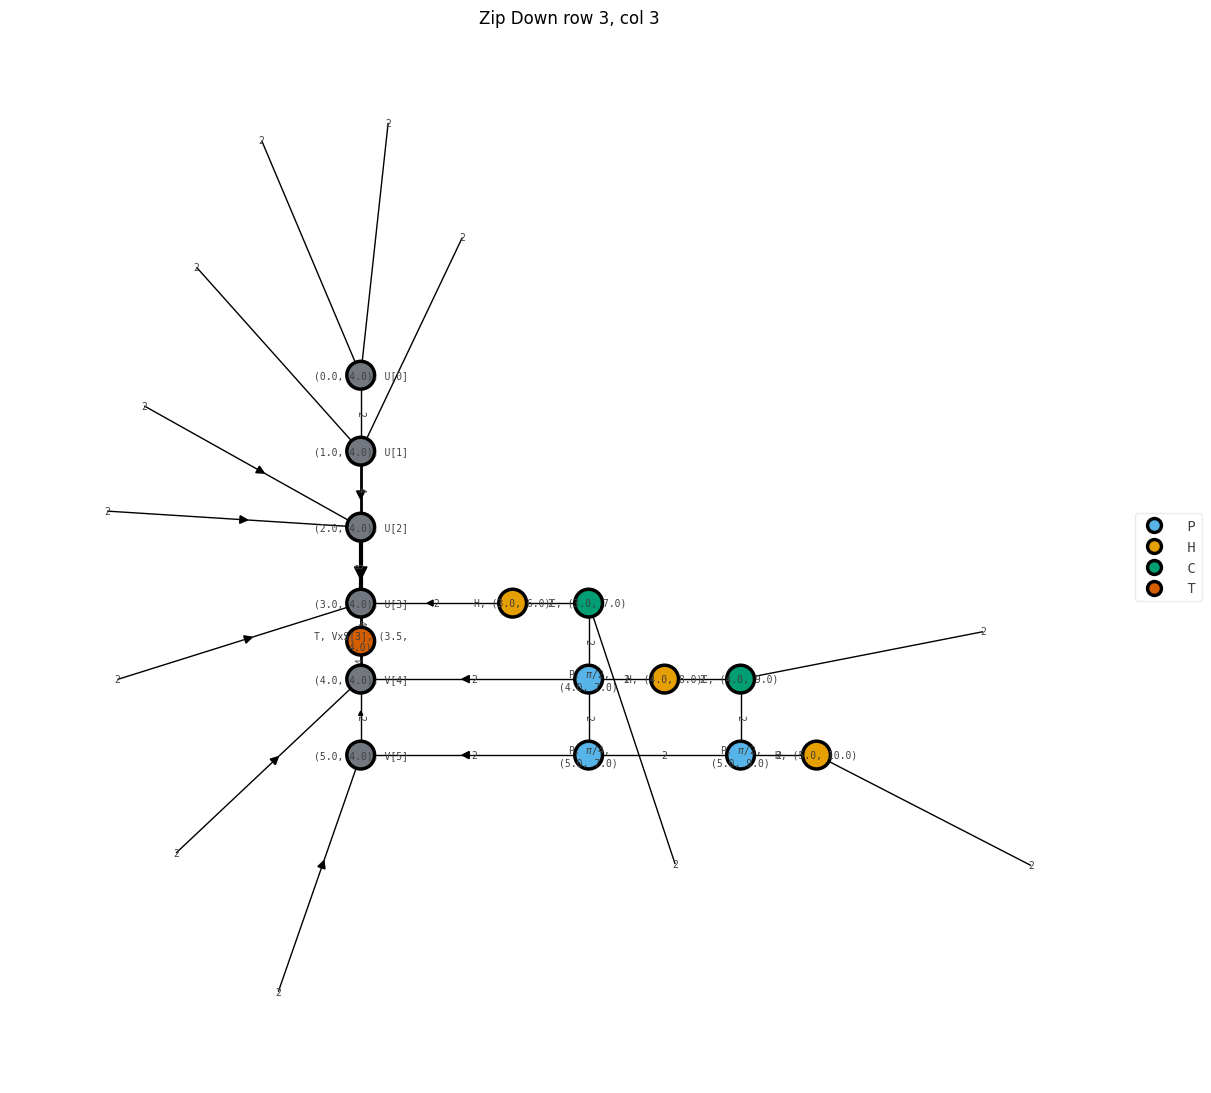

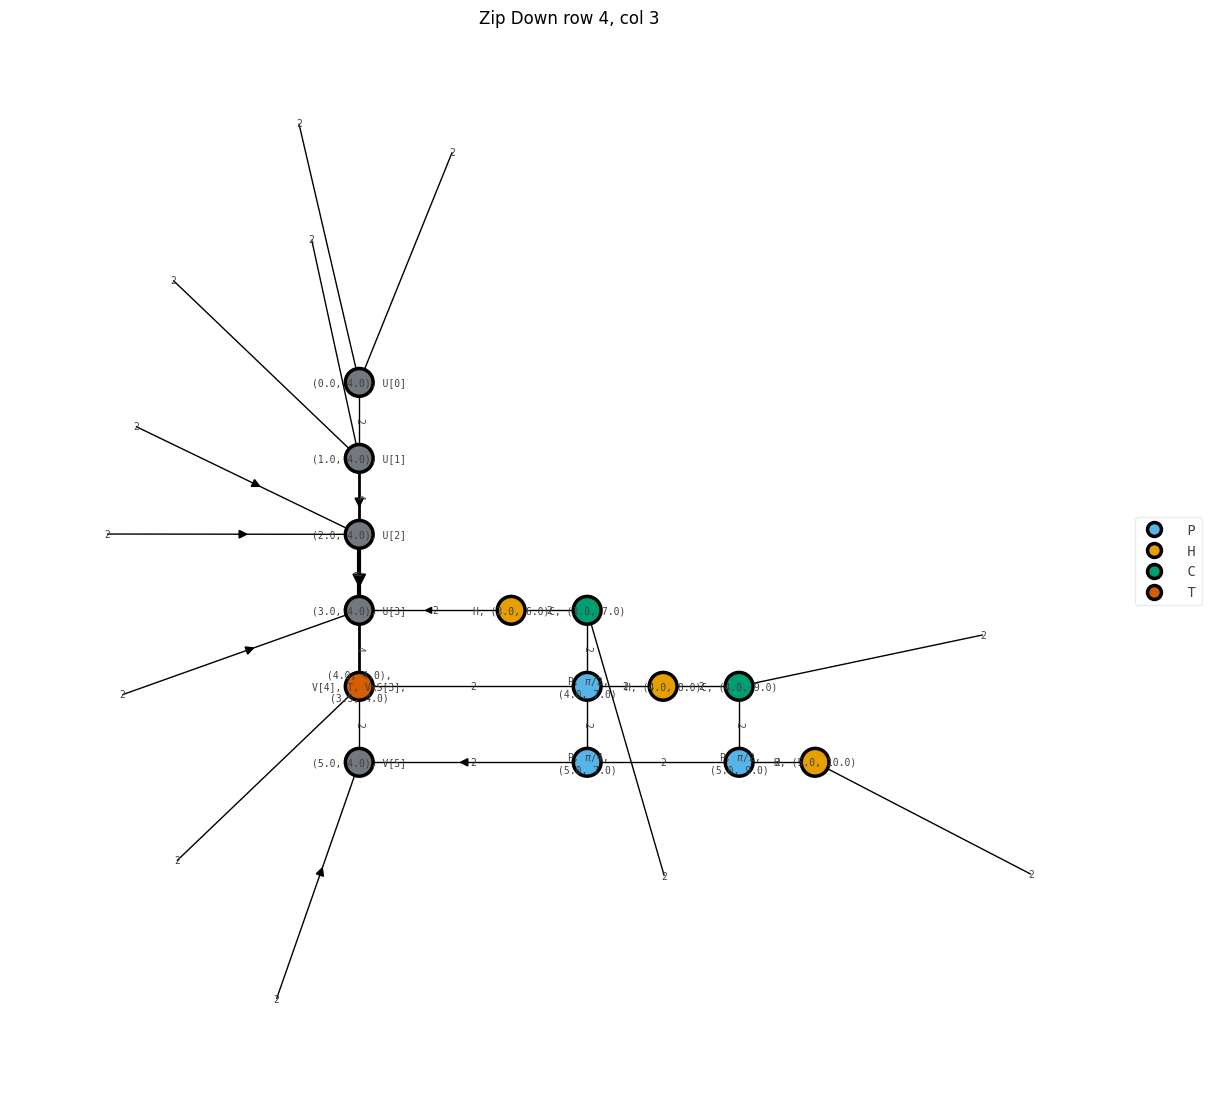

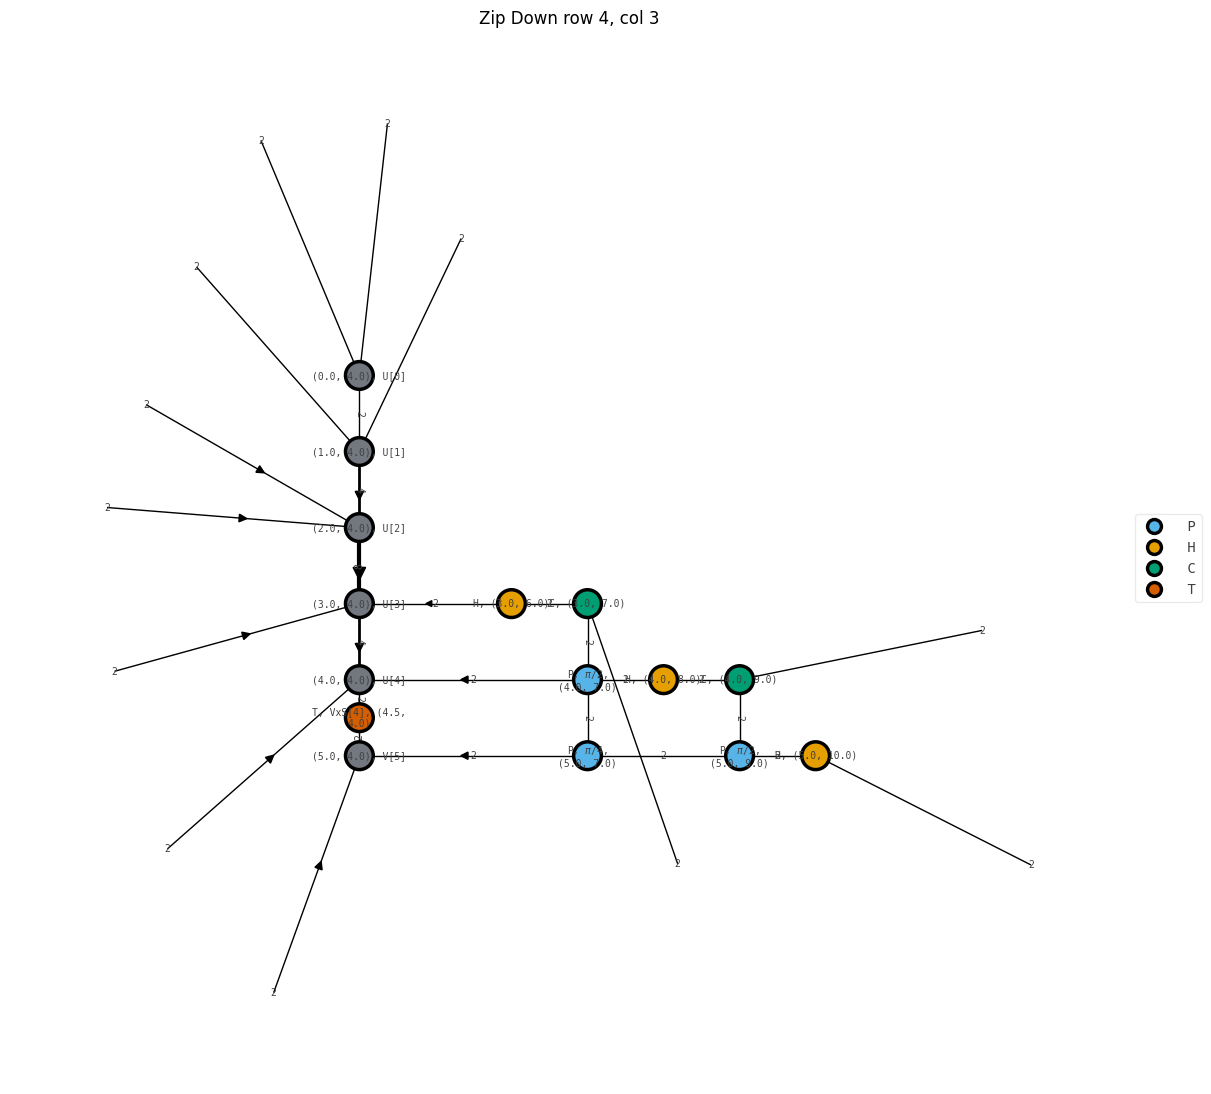

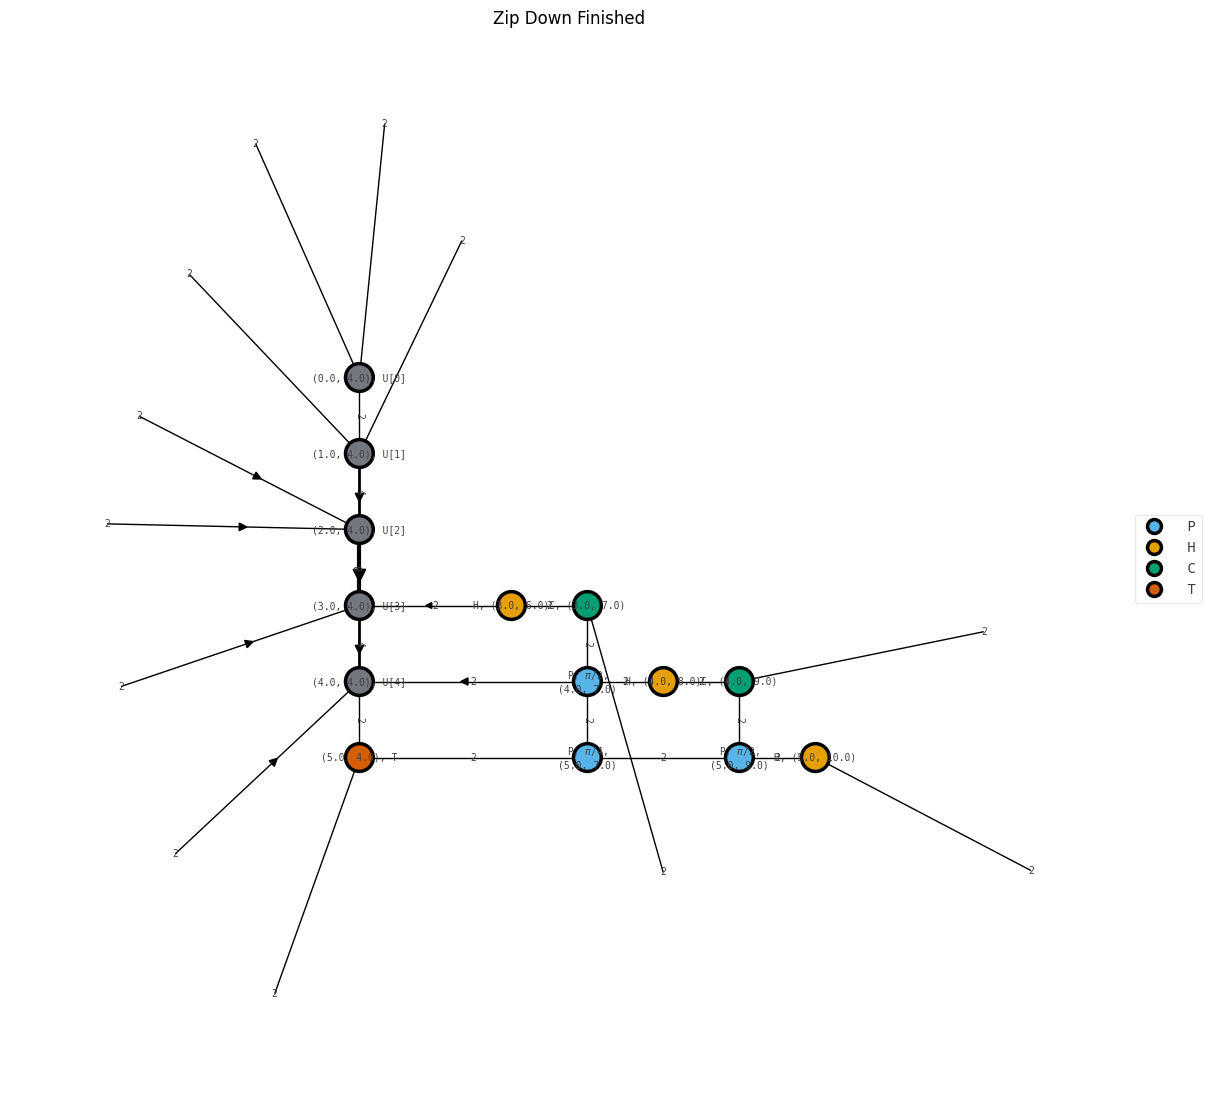

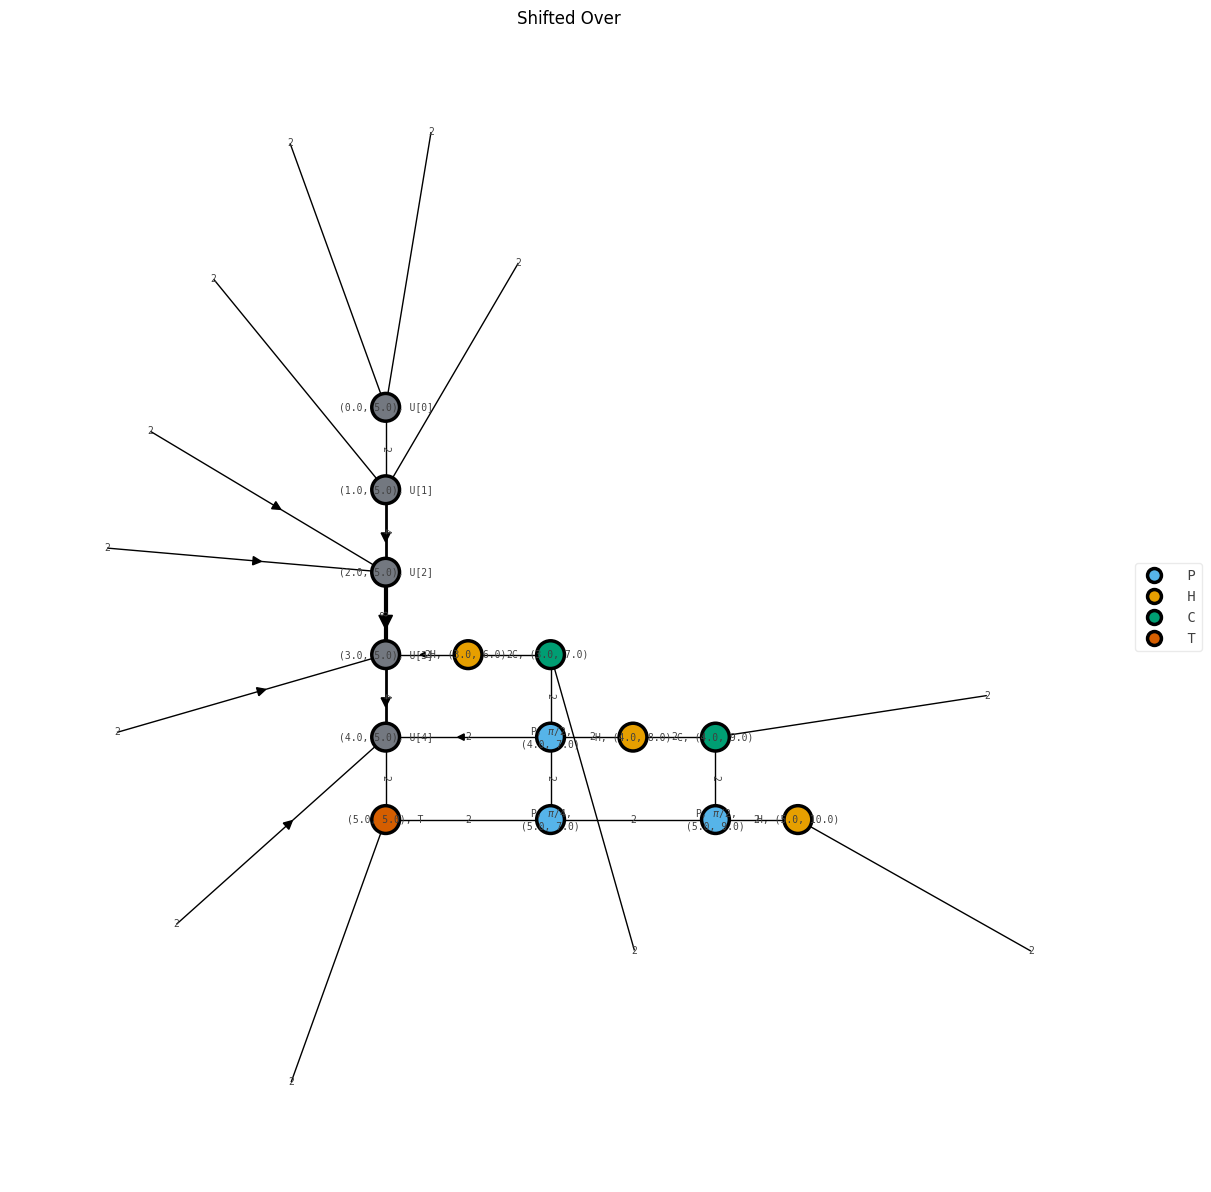

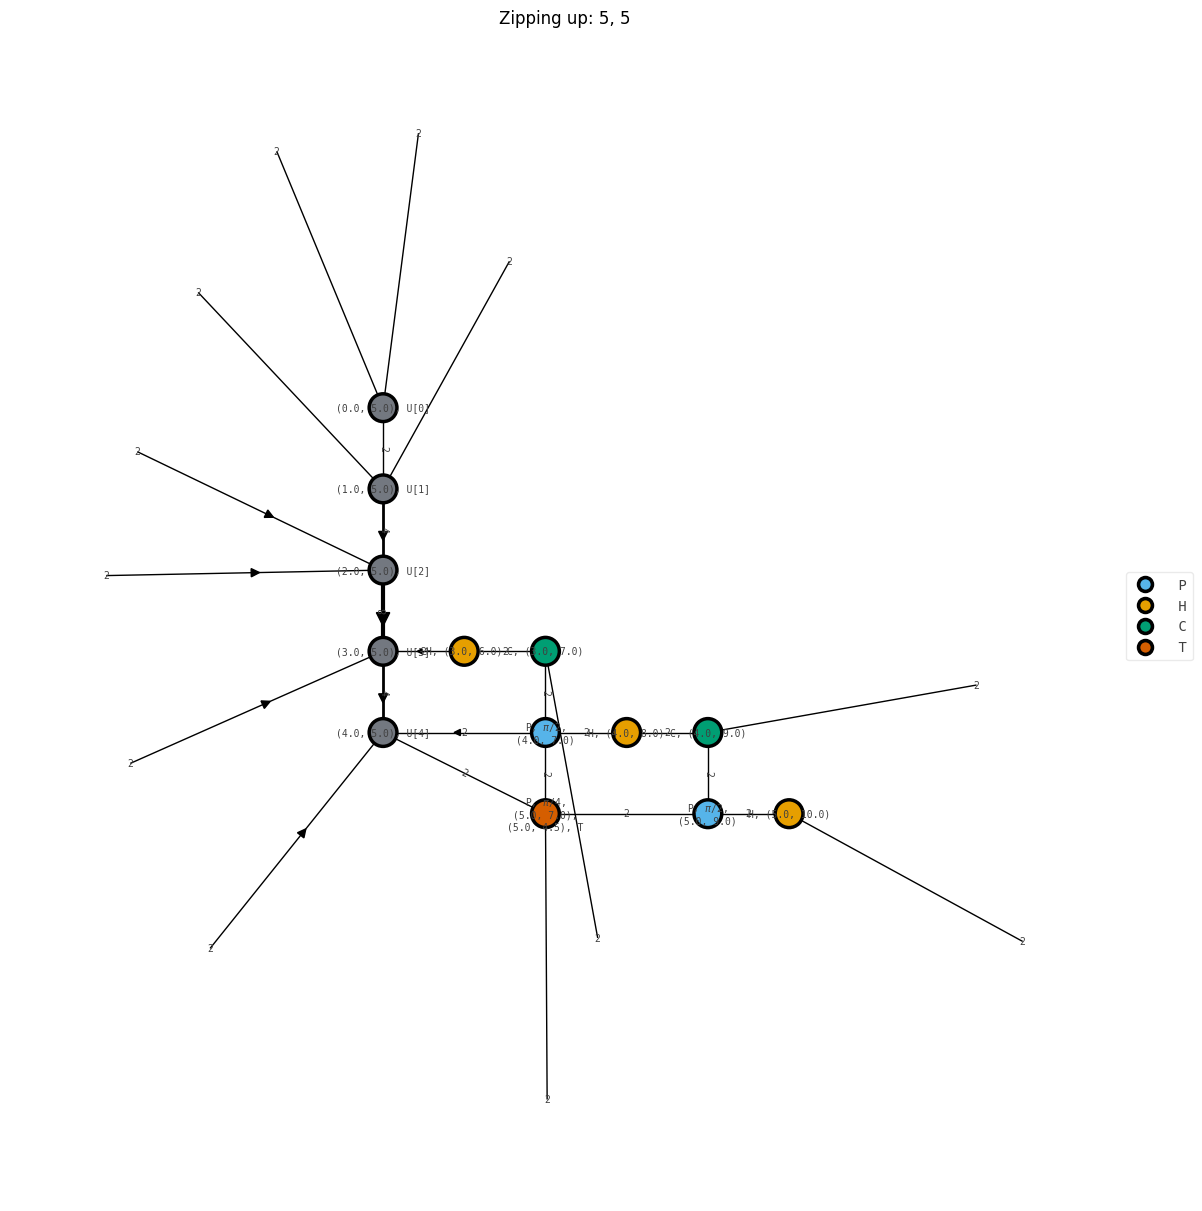

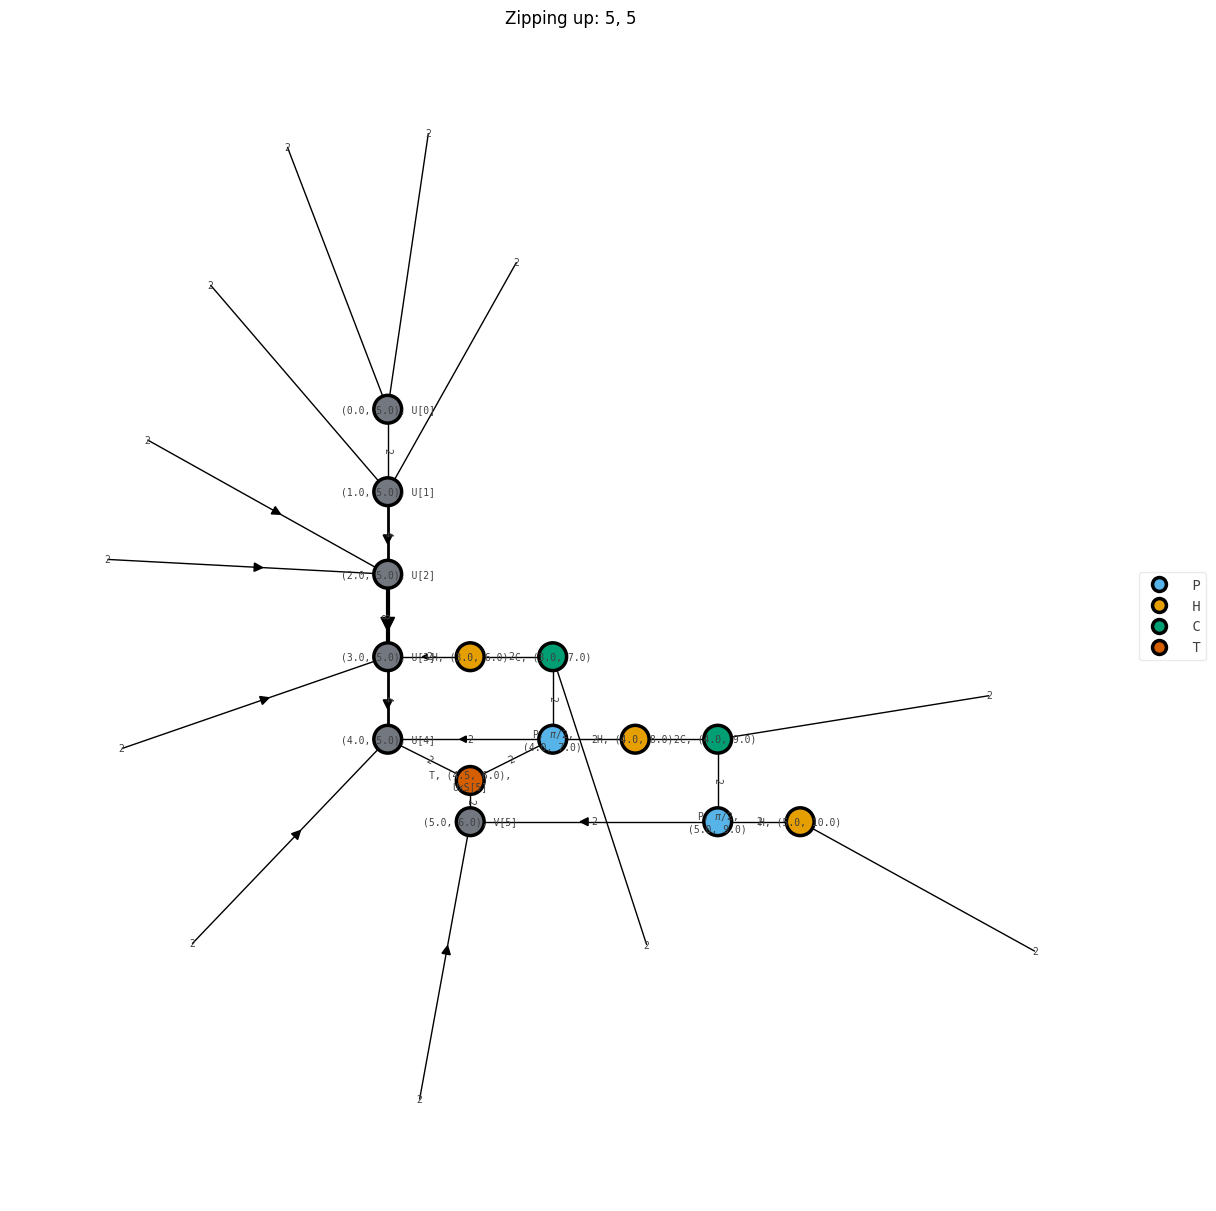

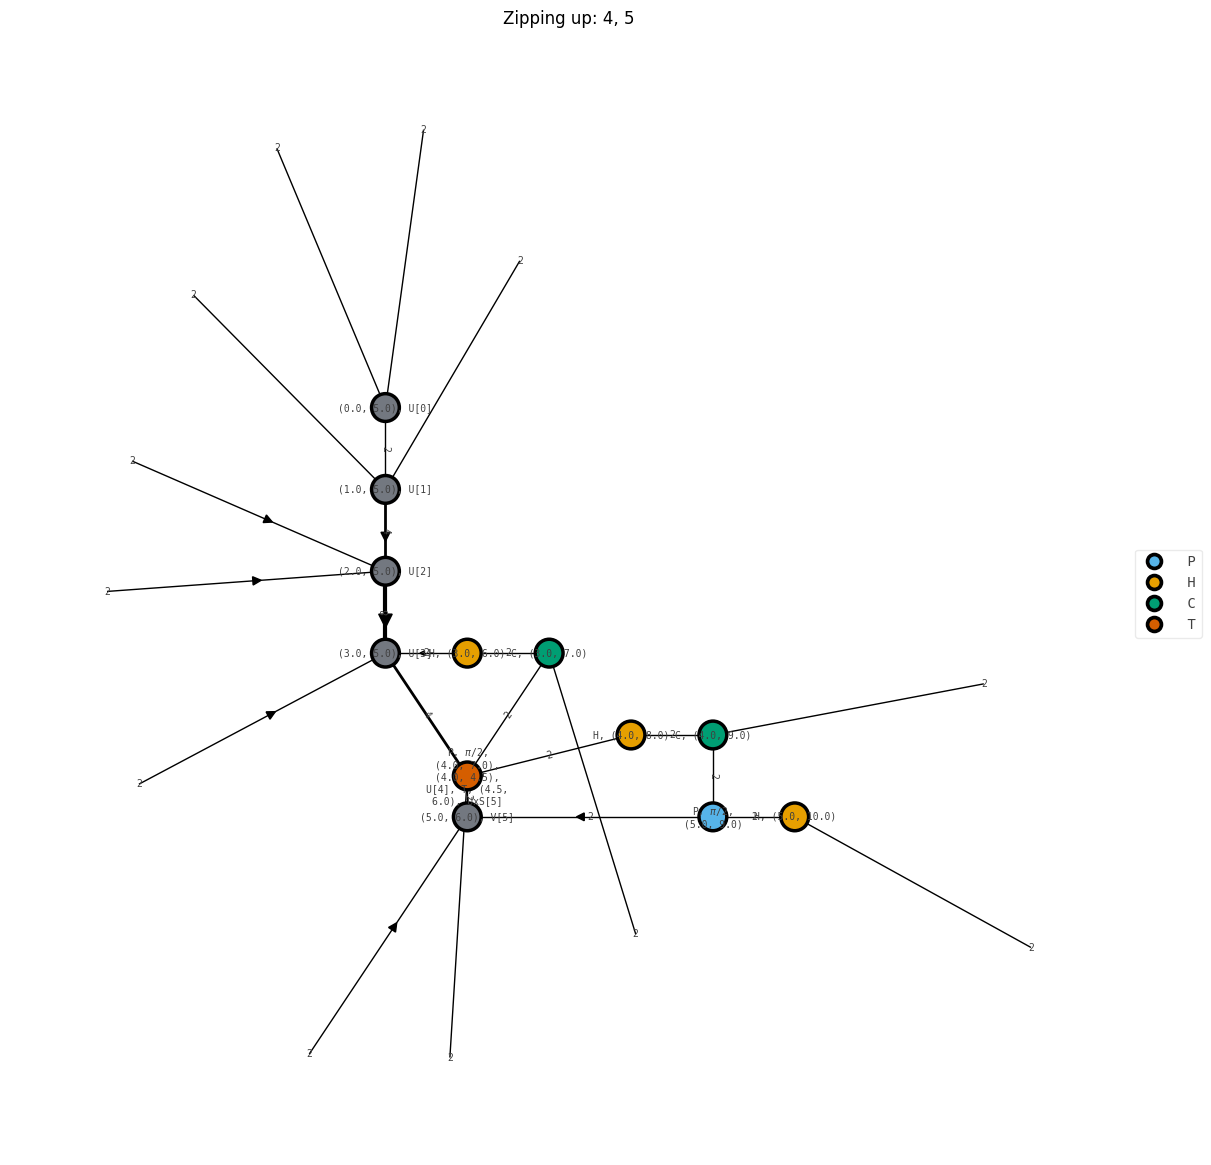

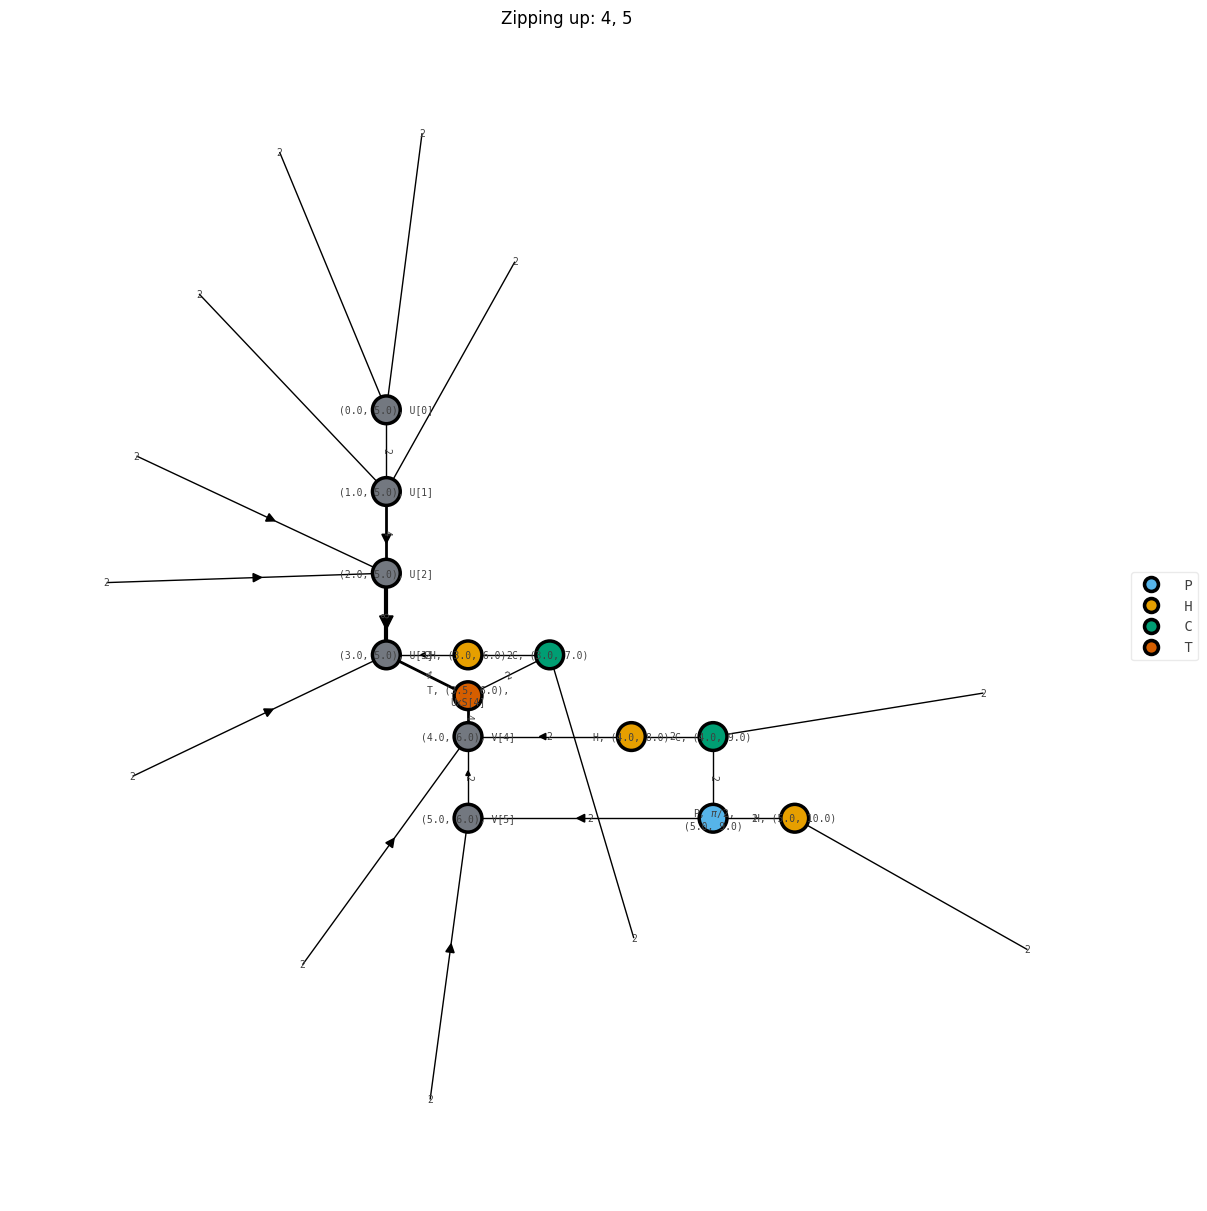

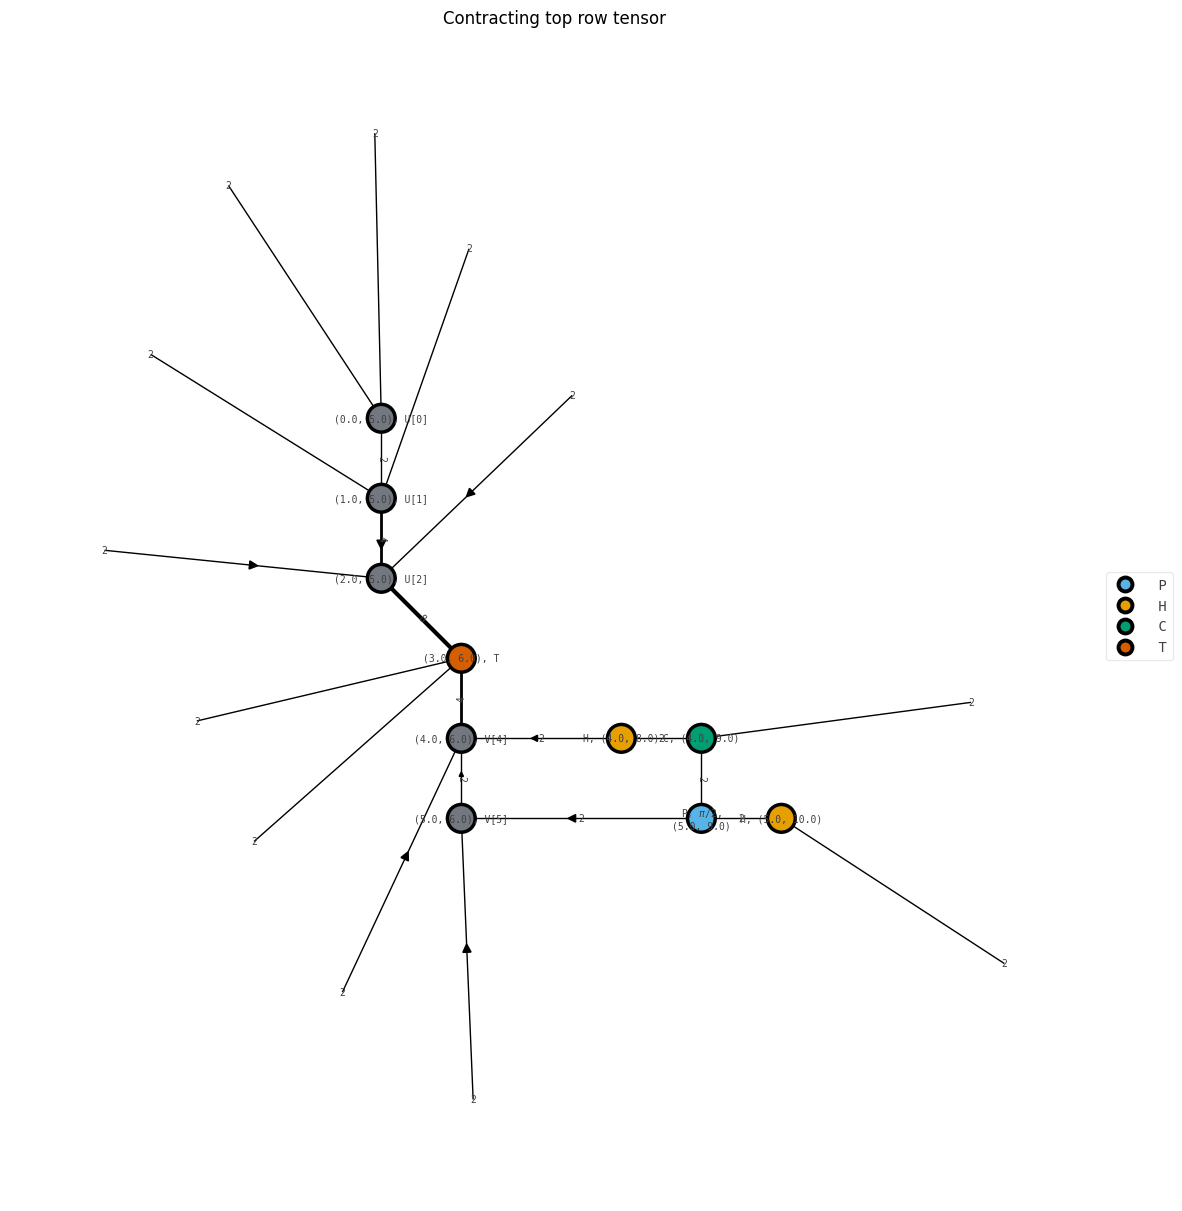

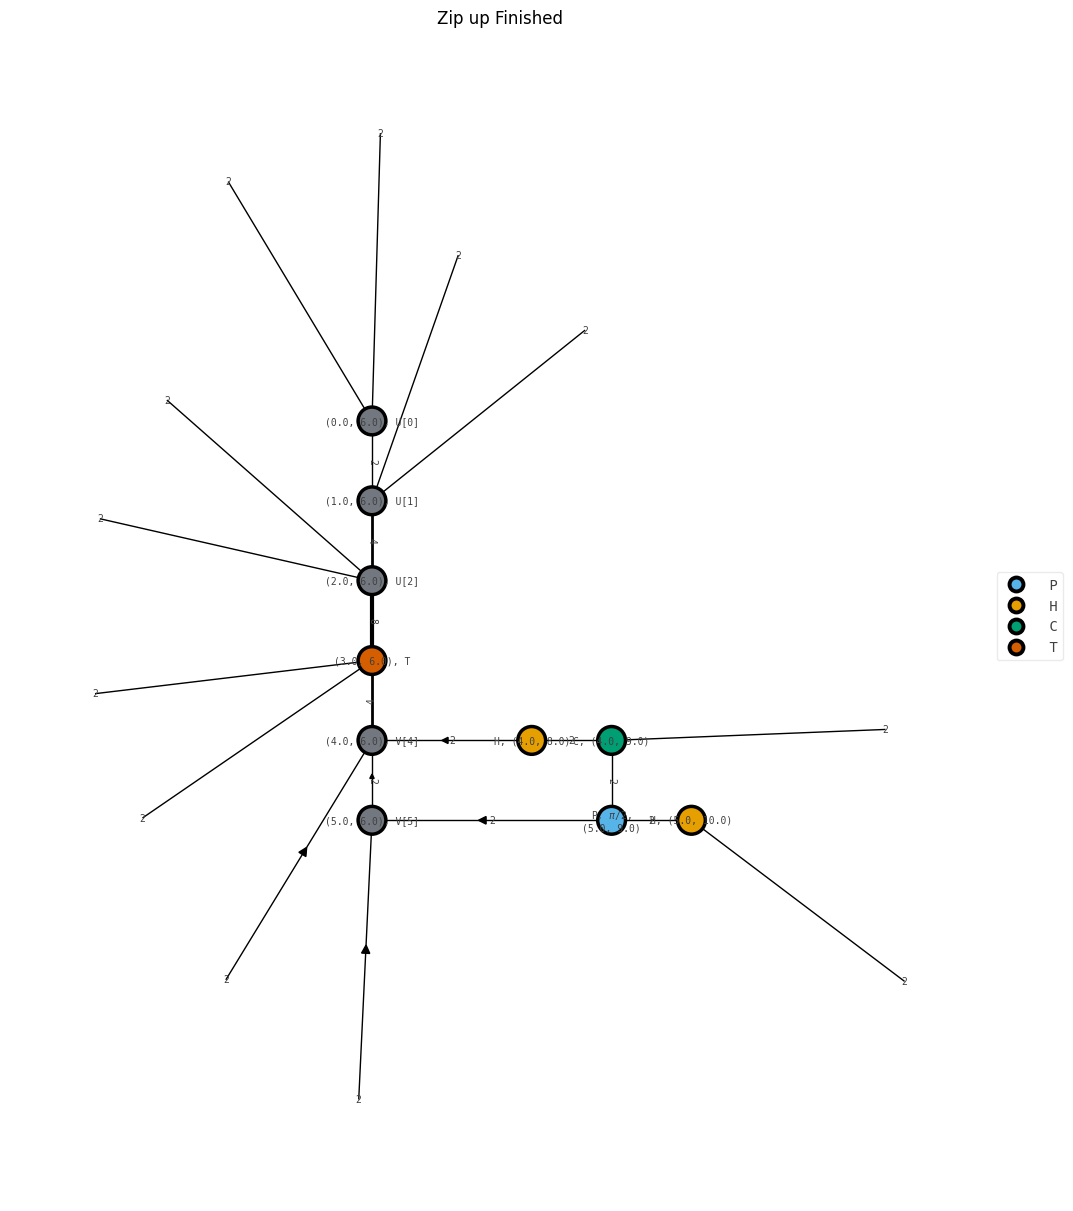

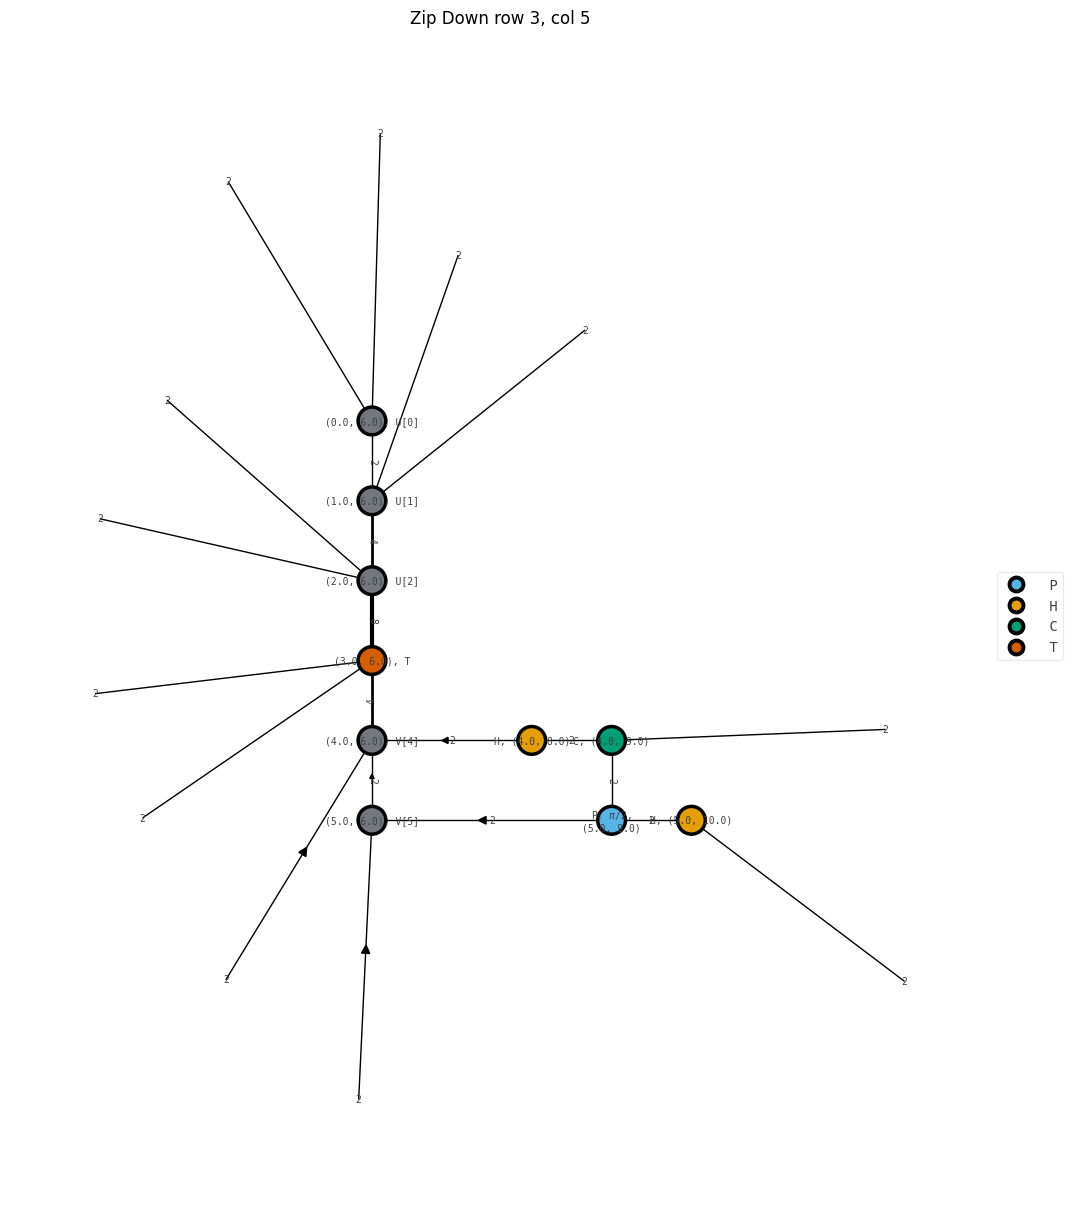

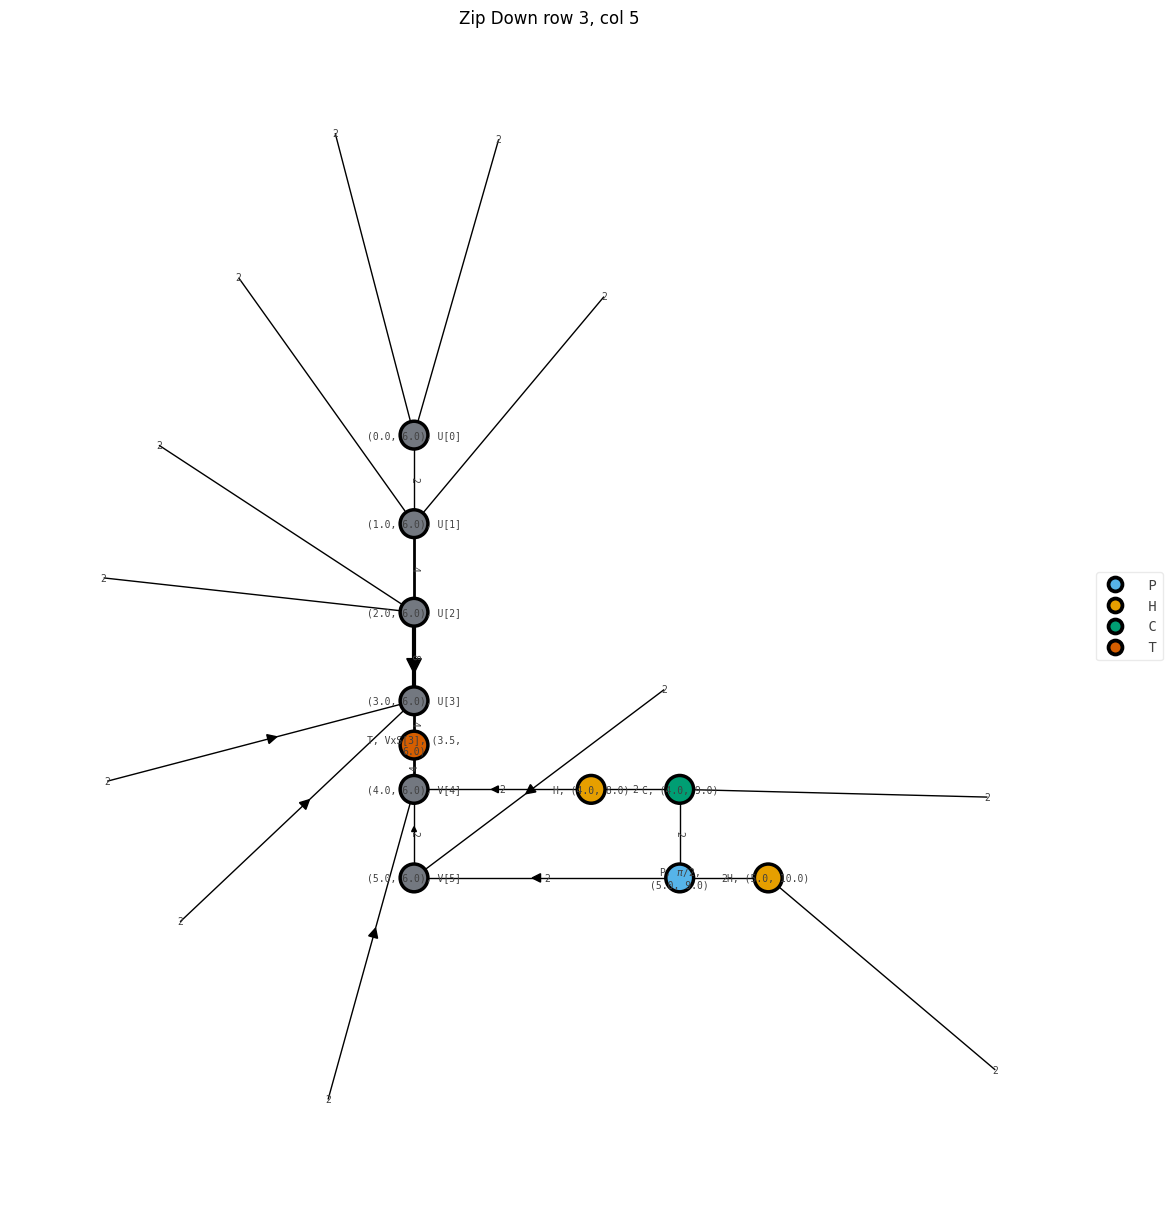

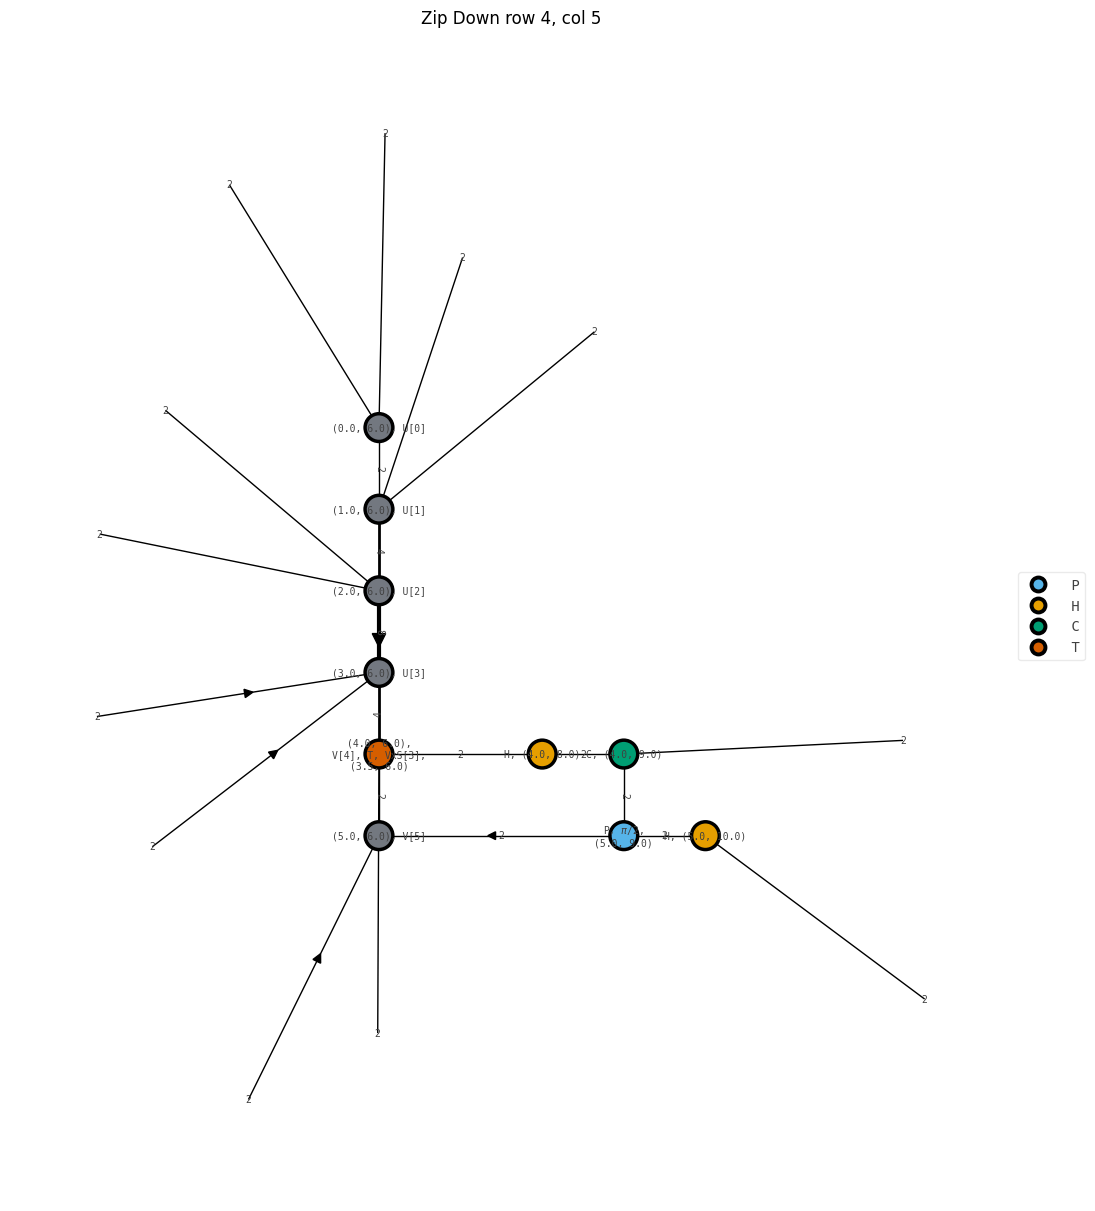

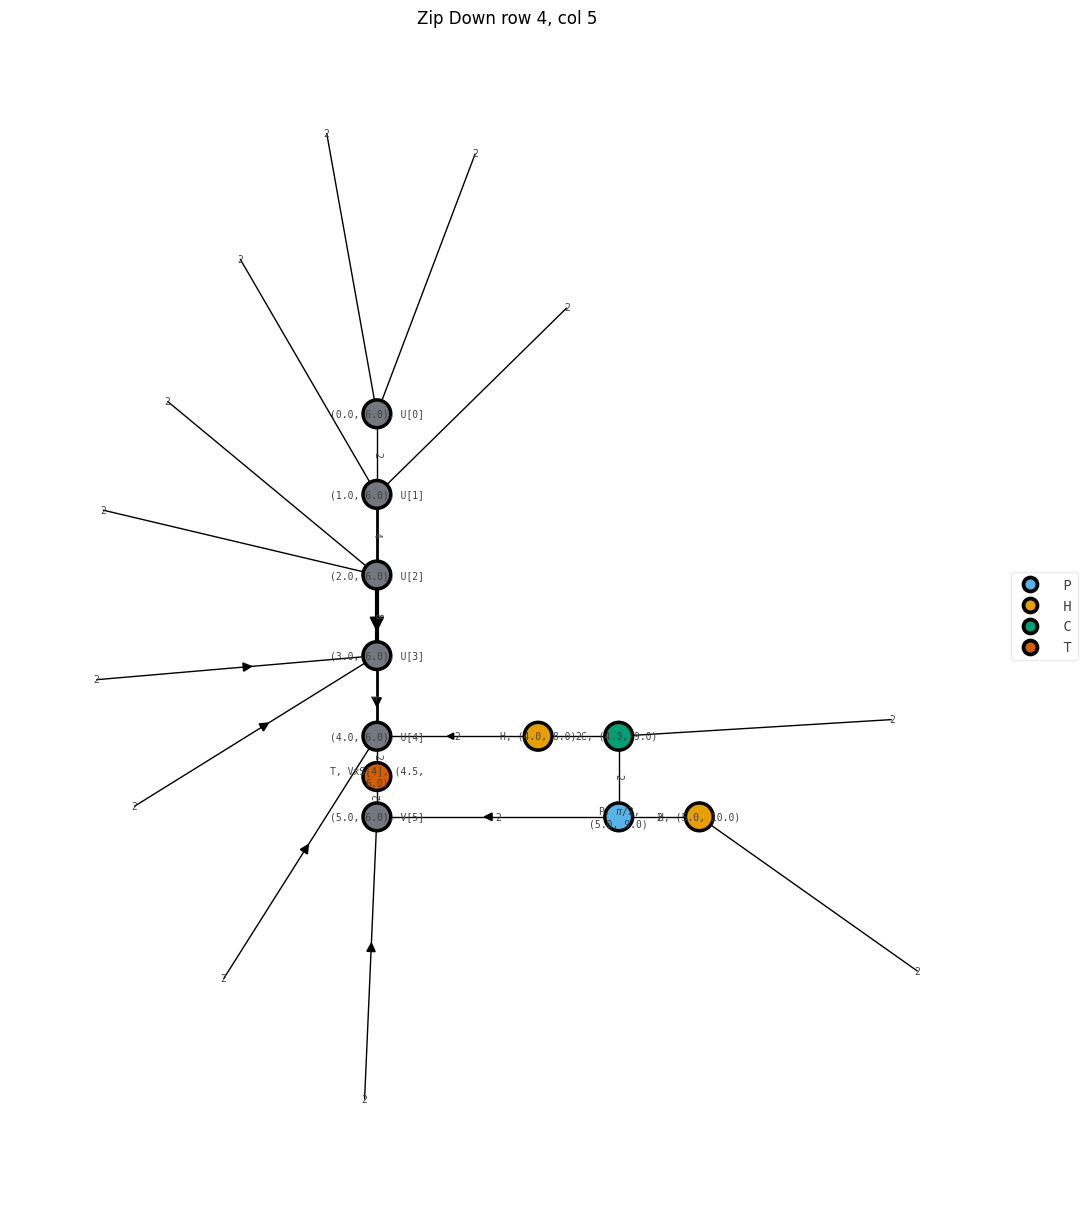

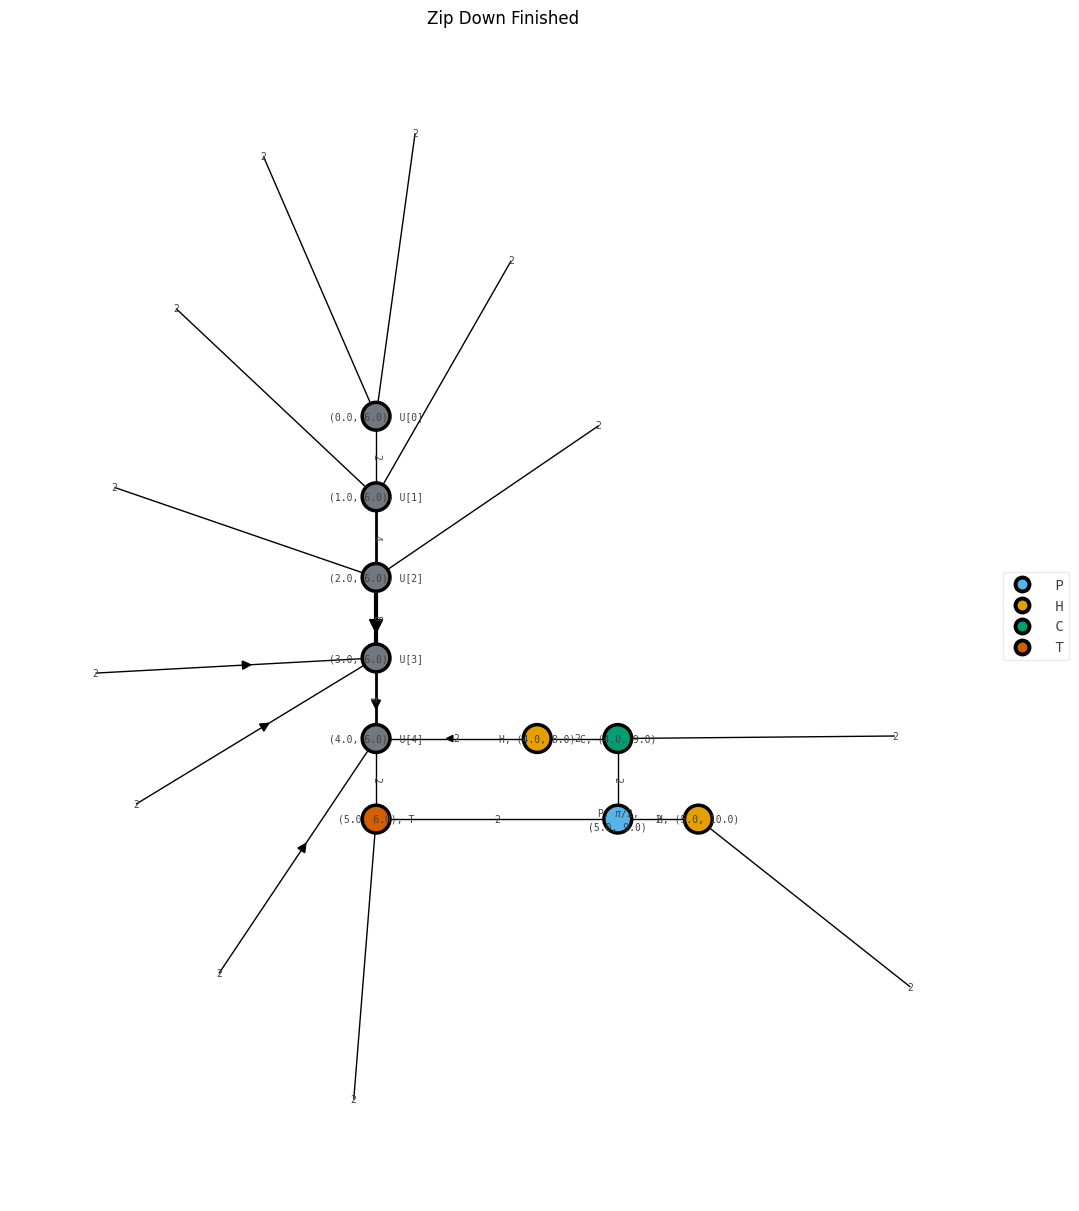

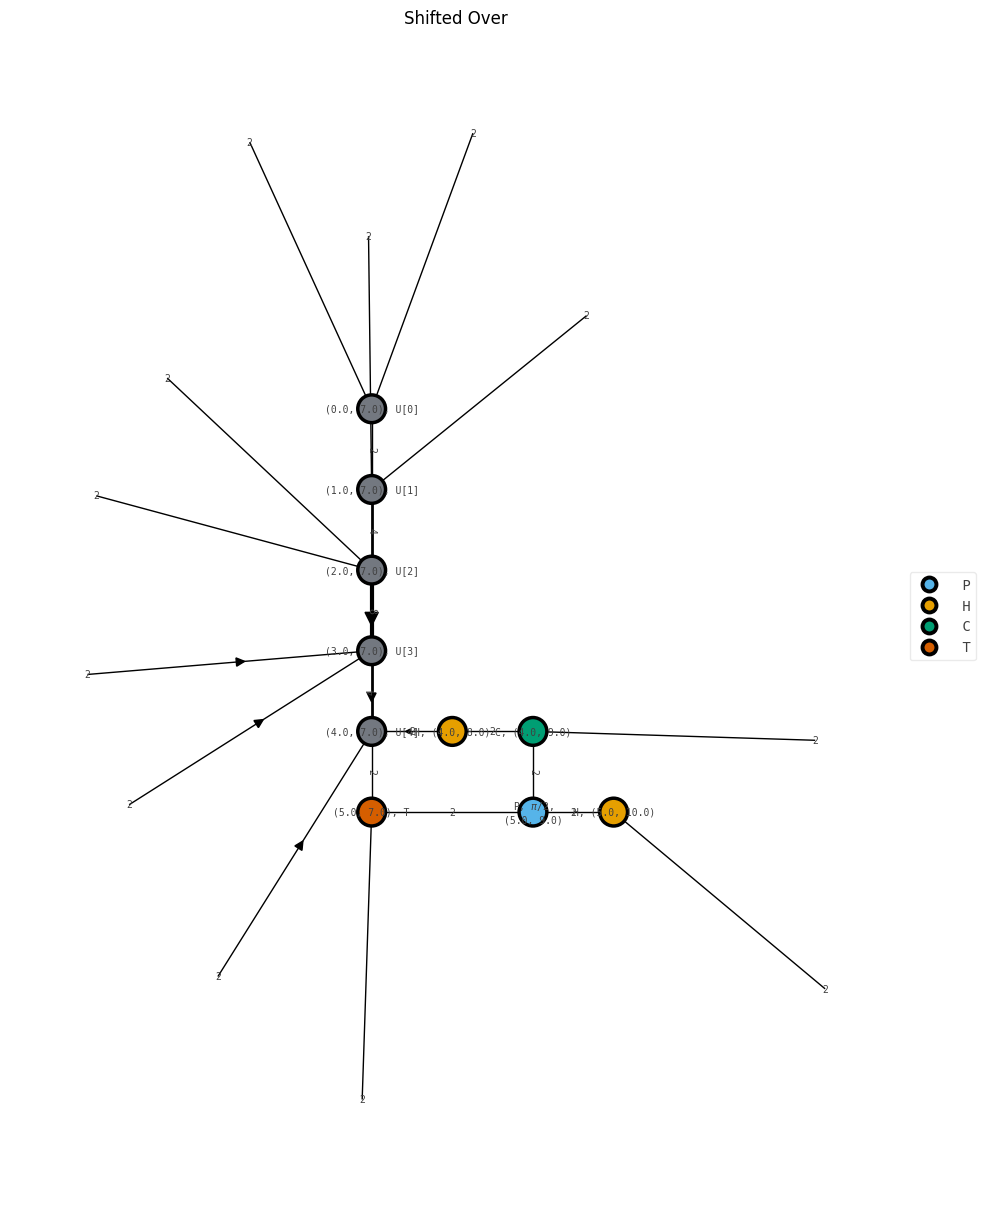

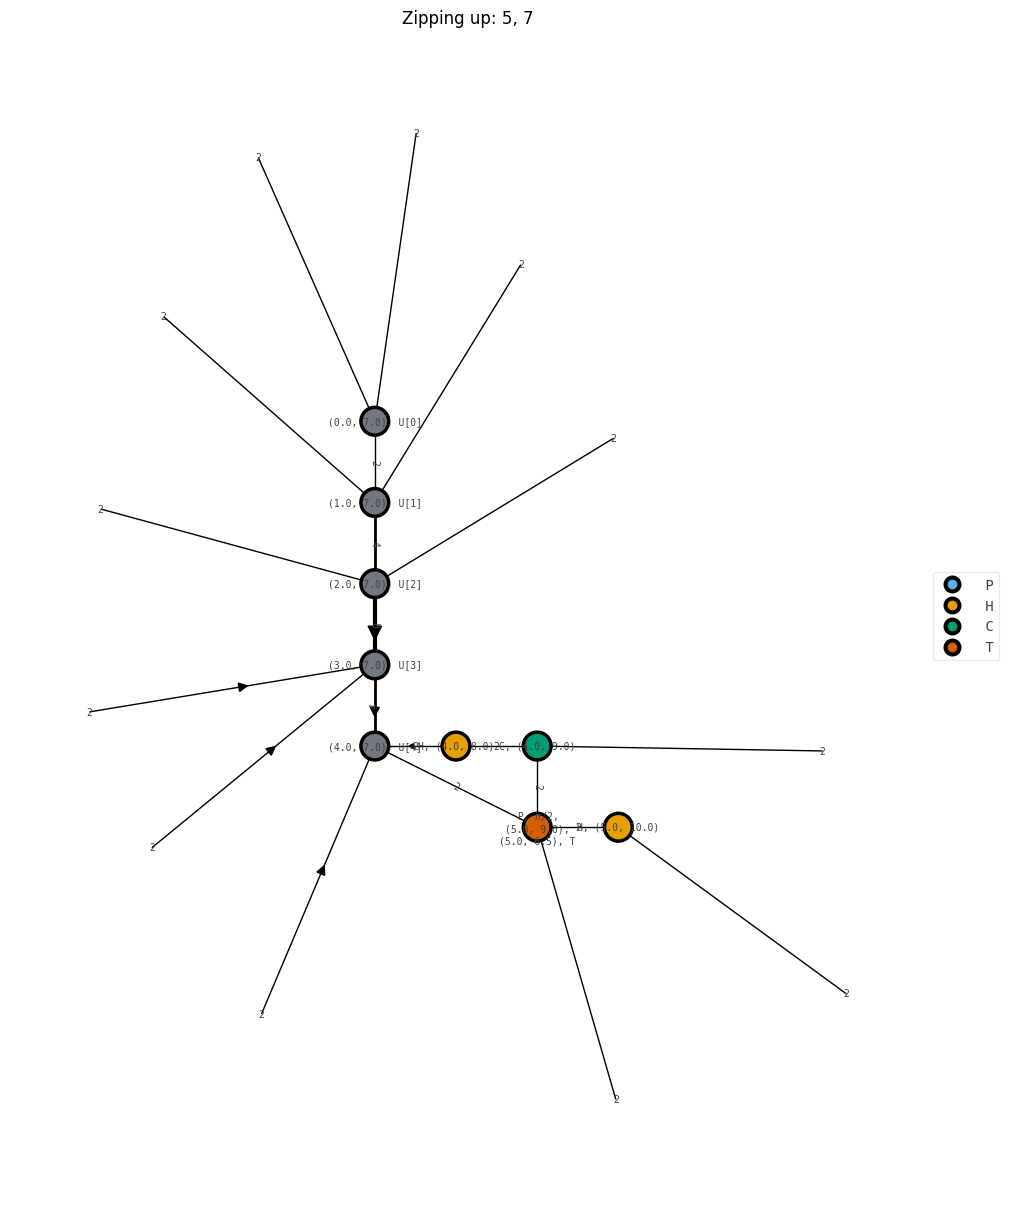

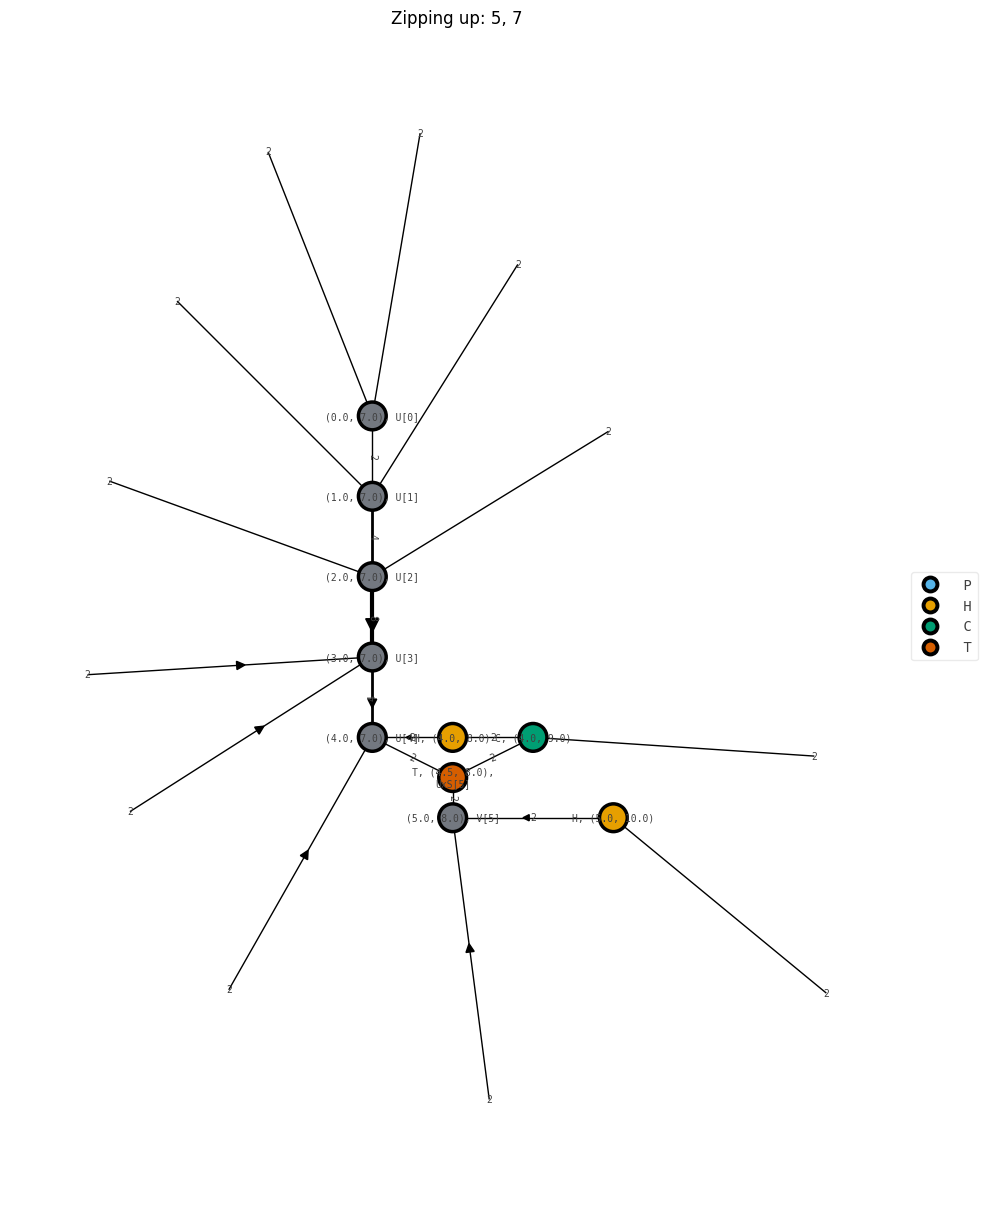

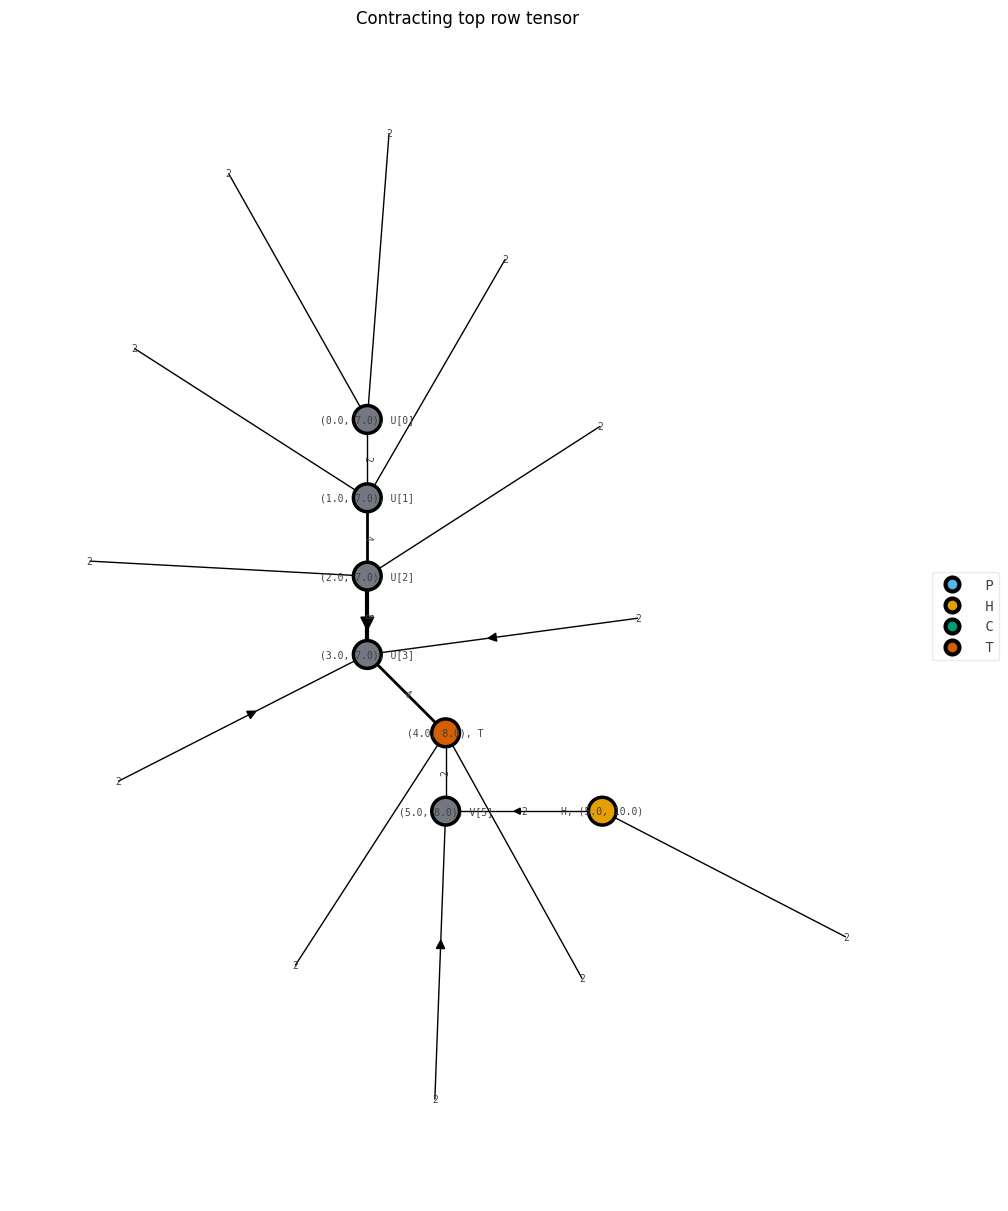

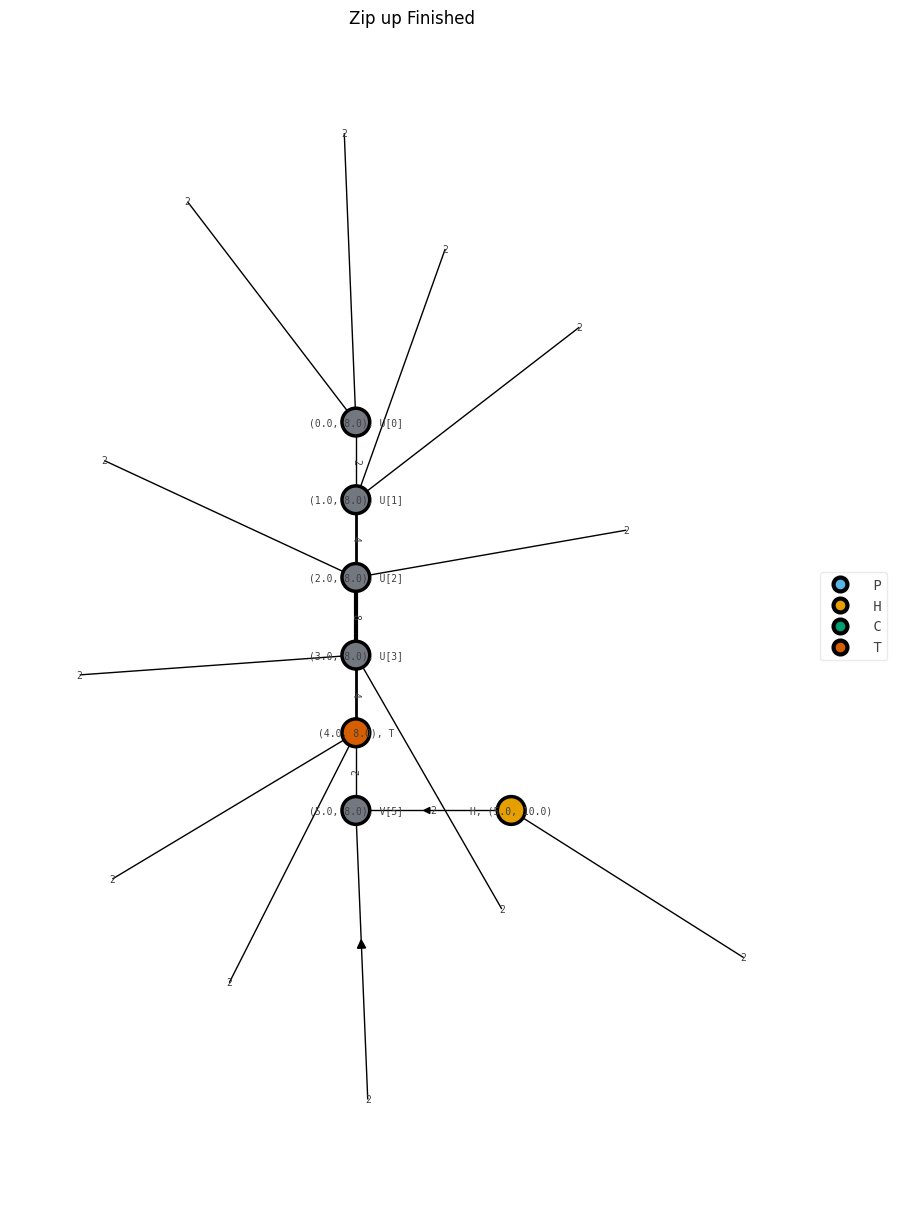

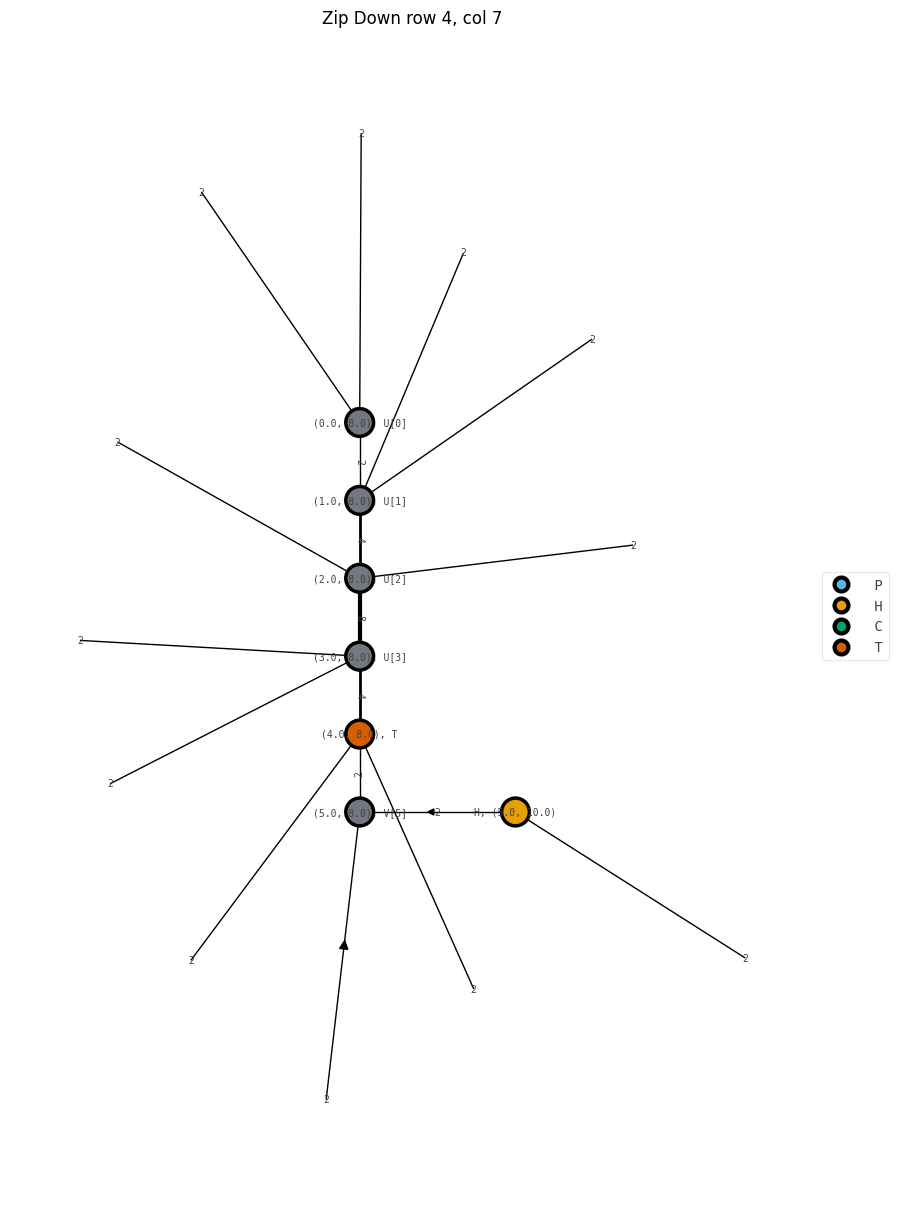

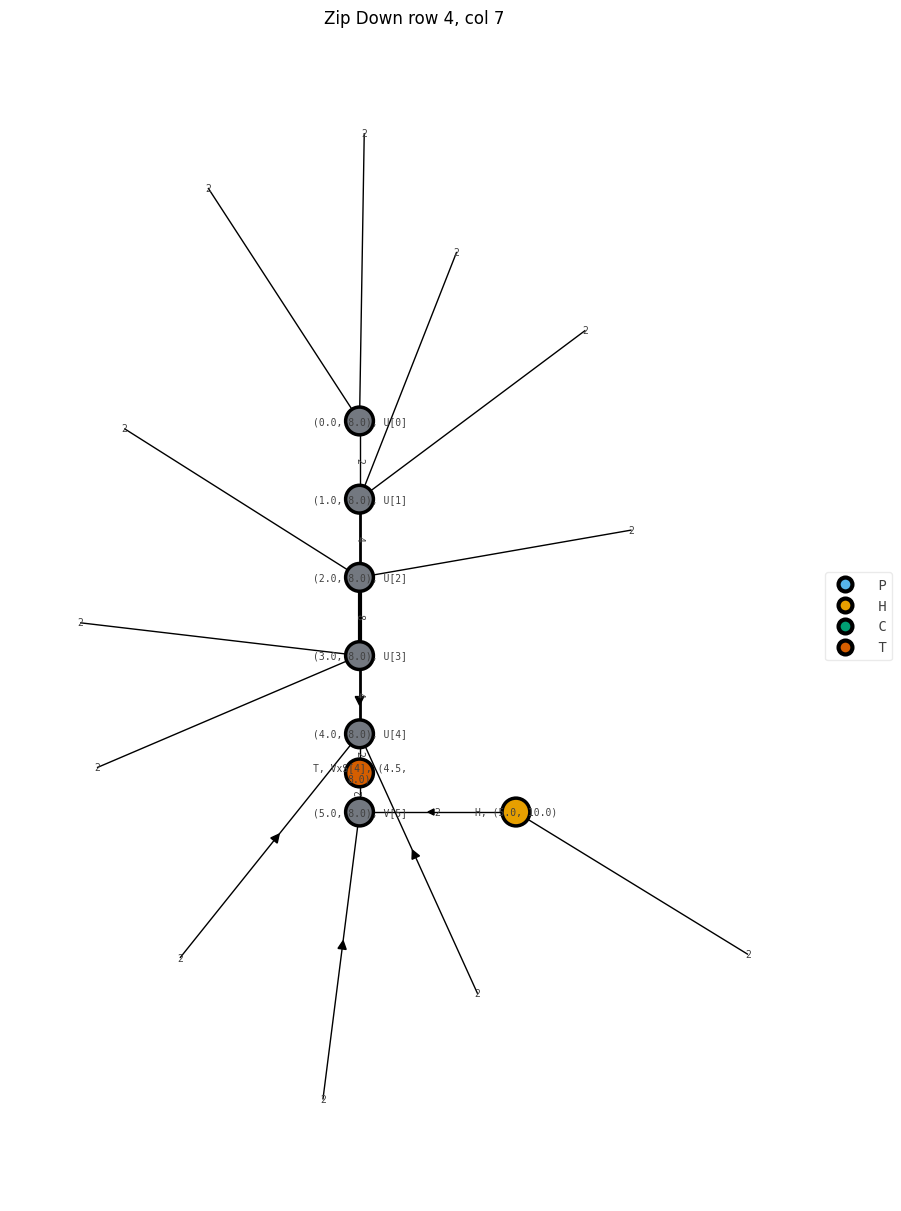

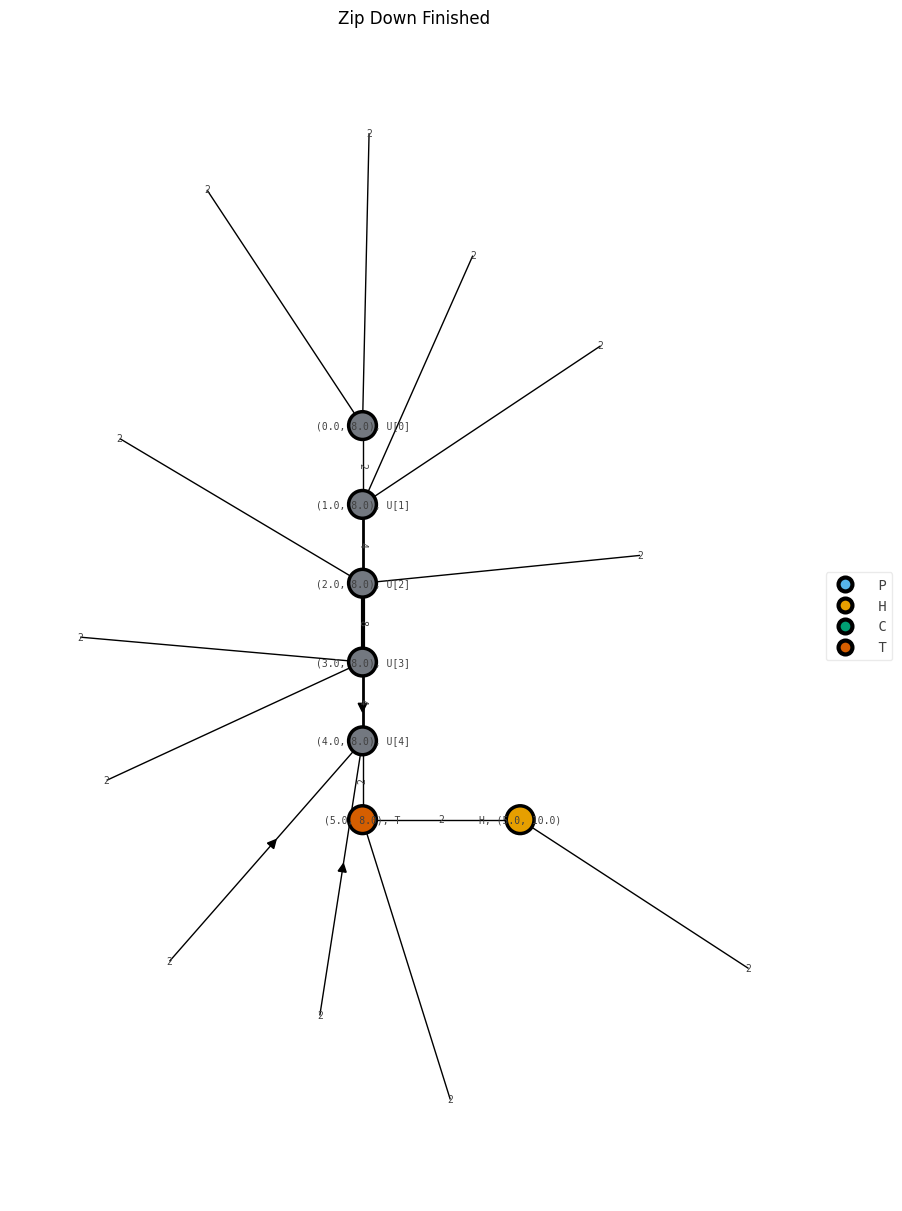

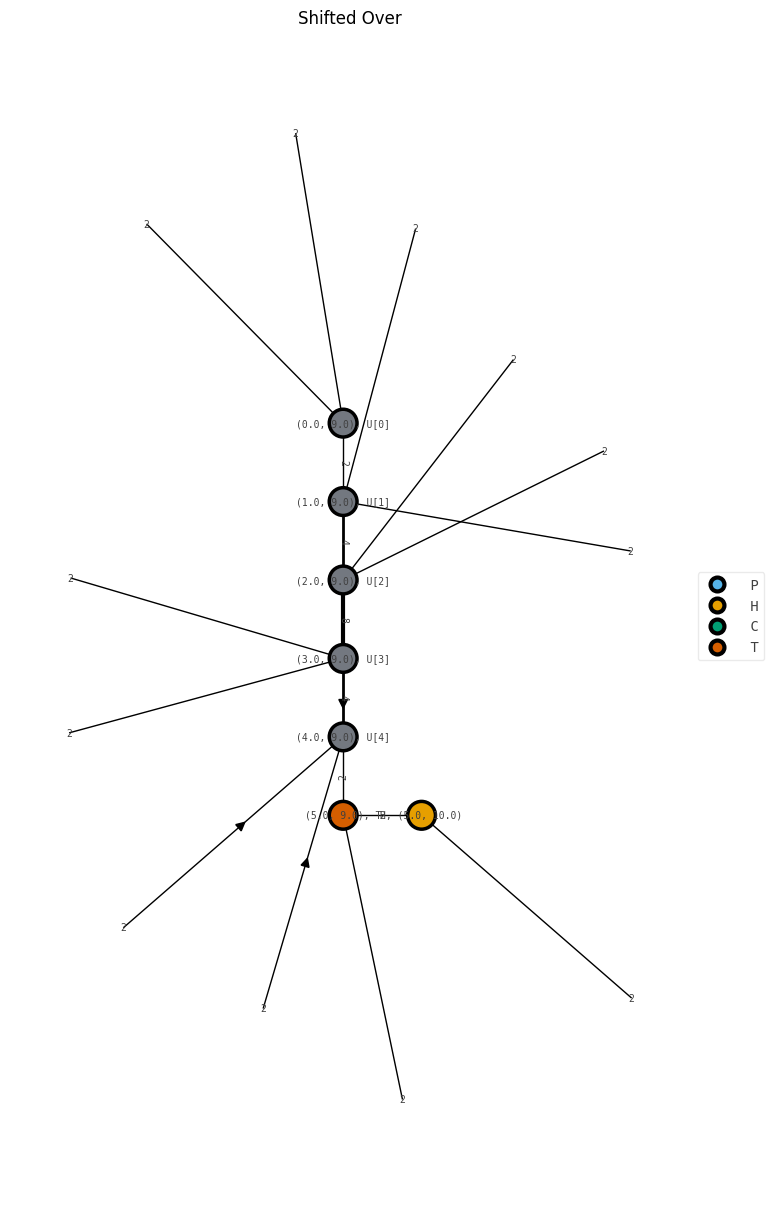

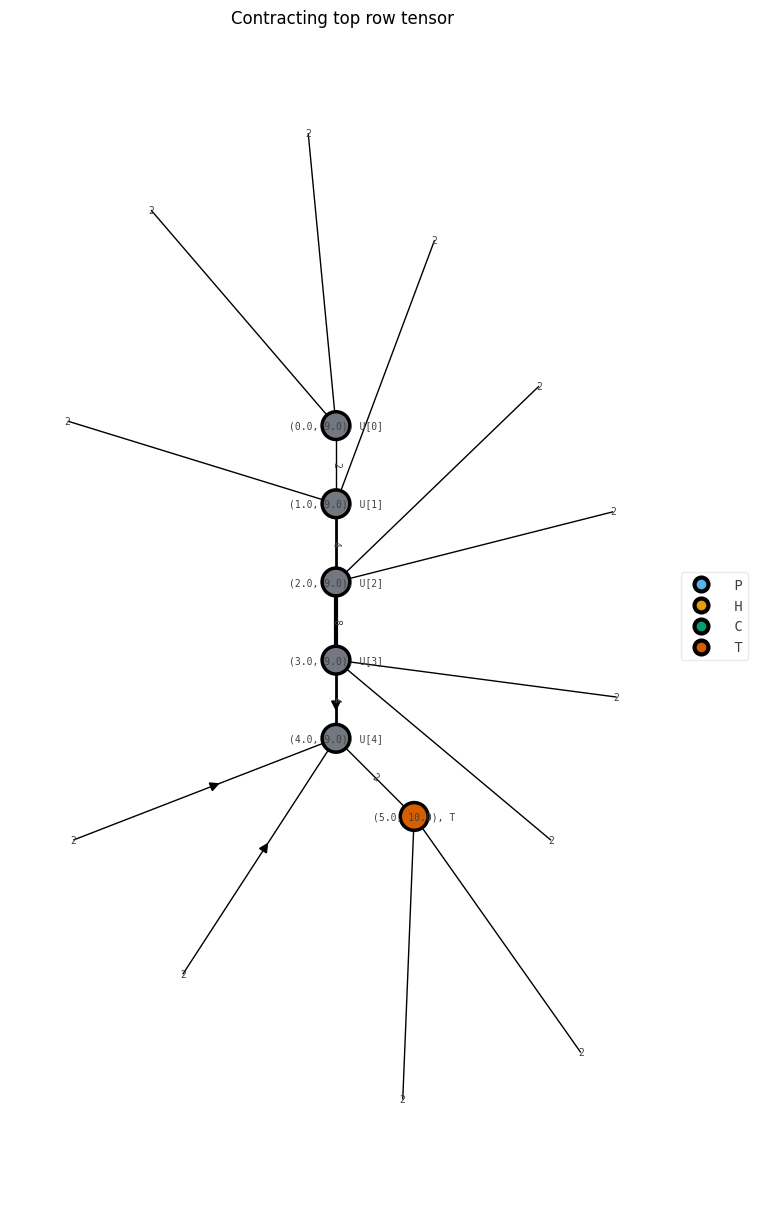

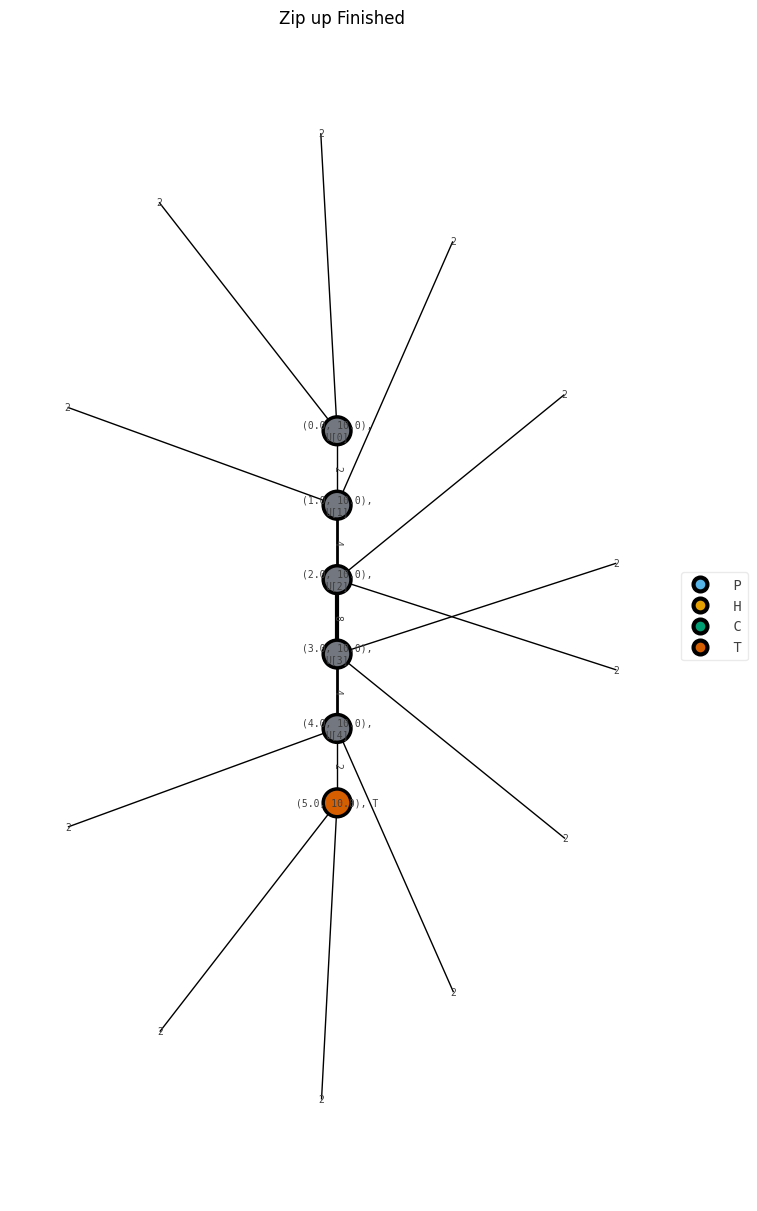

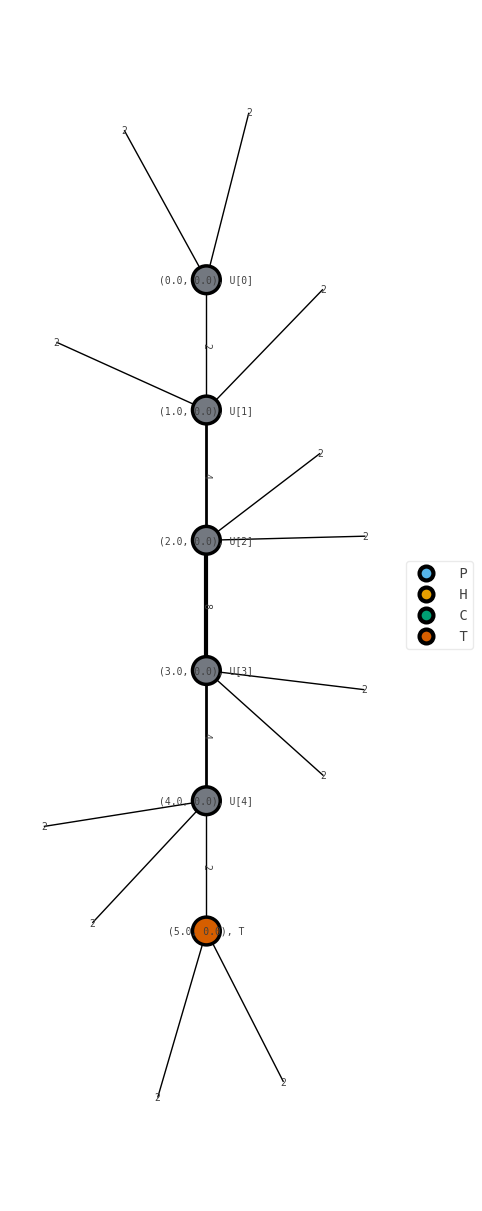

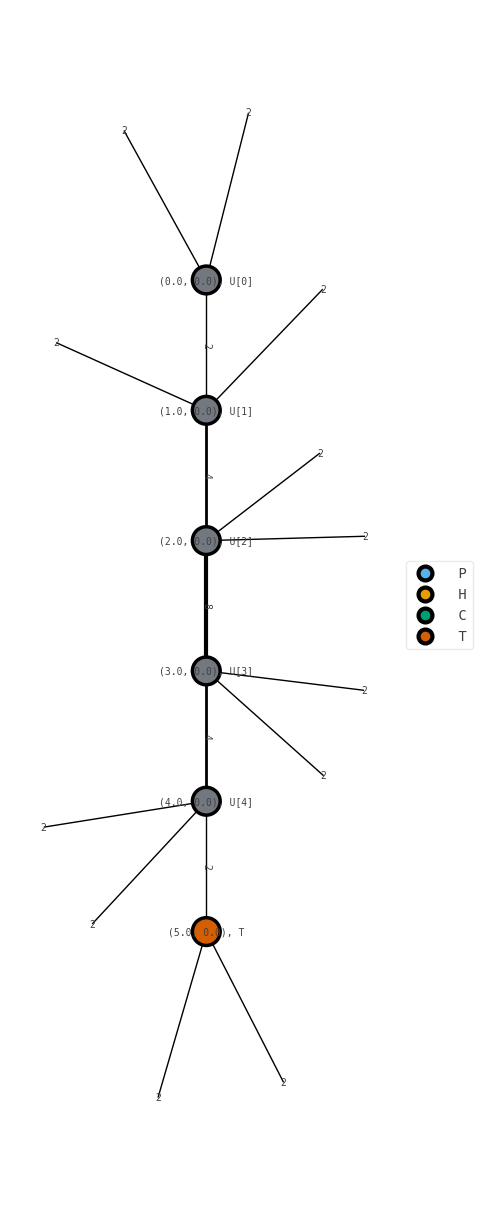

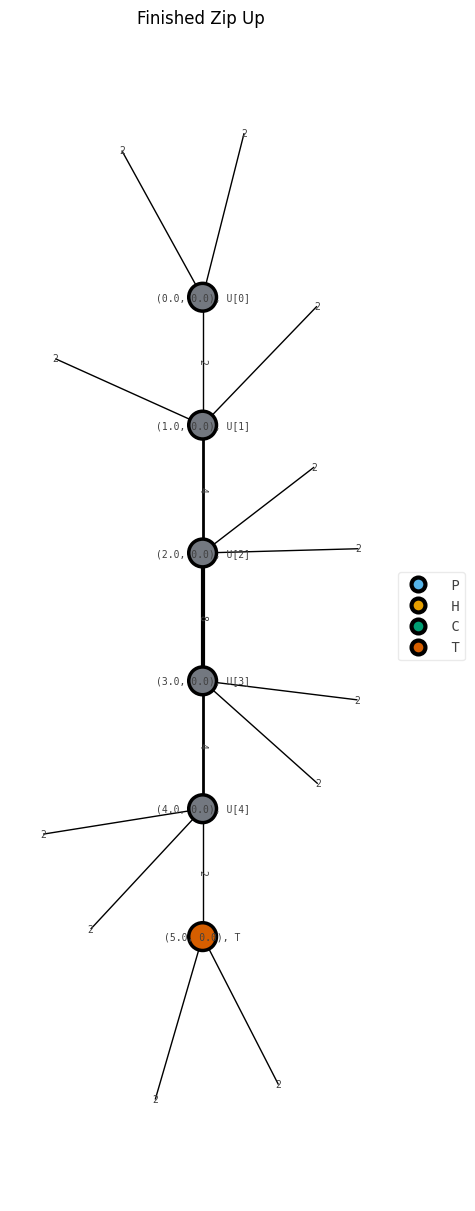

Tensor shape: (2, 2, 2)
Tensor: Tensor(shape=(2, 2, 2), inds=('b000', 'k000', 'z000'), tags=oset(['(0.0, 0.0)', 'U[0]']), backend='numpy', dtype='complex128')
Tensor Data:
 [[[-8.40896415e-01+0.00000000e+00j -4.66791281e-17+5.18242428e-33j]
  [-8.40896415e-01+0.00000000e+00j -4.66791281e-17+5.18242428e-33j]]

 [[ 3.30071280e-17-3.30071280e-17j -5.94603558e-01+5.94603558e-01j]
  [-3.30071280e-17+3.30071280e-17j  5.94603558e-01-5.94603558e-01j]]]

Tensor shape: (2, 2, 2, 4)
Tensor: Tensor(shape=(2, 2, 2, 4), inds=('b001', 'k001', 'z000', 'z001'), tags=oset(['(1.0, 0.0)', 'U[1]']), backend='numpy', dtype='complex128')
Tensor Data:
 [[[[-4.85388588e-01+1.02747071e-01j  2.16849217e-01+3.17287726e-02j
    -3.77277278e-01+1.94564124e-01j -3.46728820e-01+3.34344936e-16j]
   [ 2.27201139e-01-4.69453772e-02j  4.08079437e-01-3.16204869e-01j
     1.47507247e-01-2.74637386e-01j -4.20302935e-01-2.06481592e-02j]]

  [[-4.85388588e-01+1.02747071e-01j  2.16849217e-01+3.17287726e-02j
    -3.77277278e-01

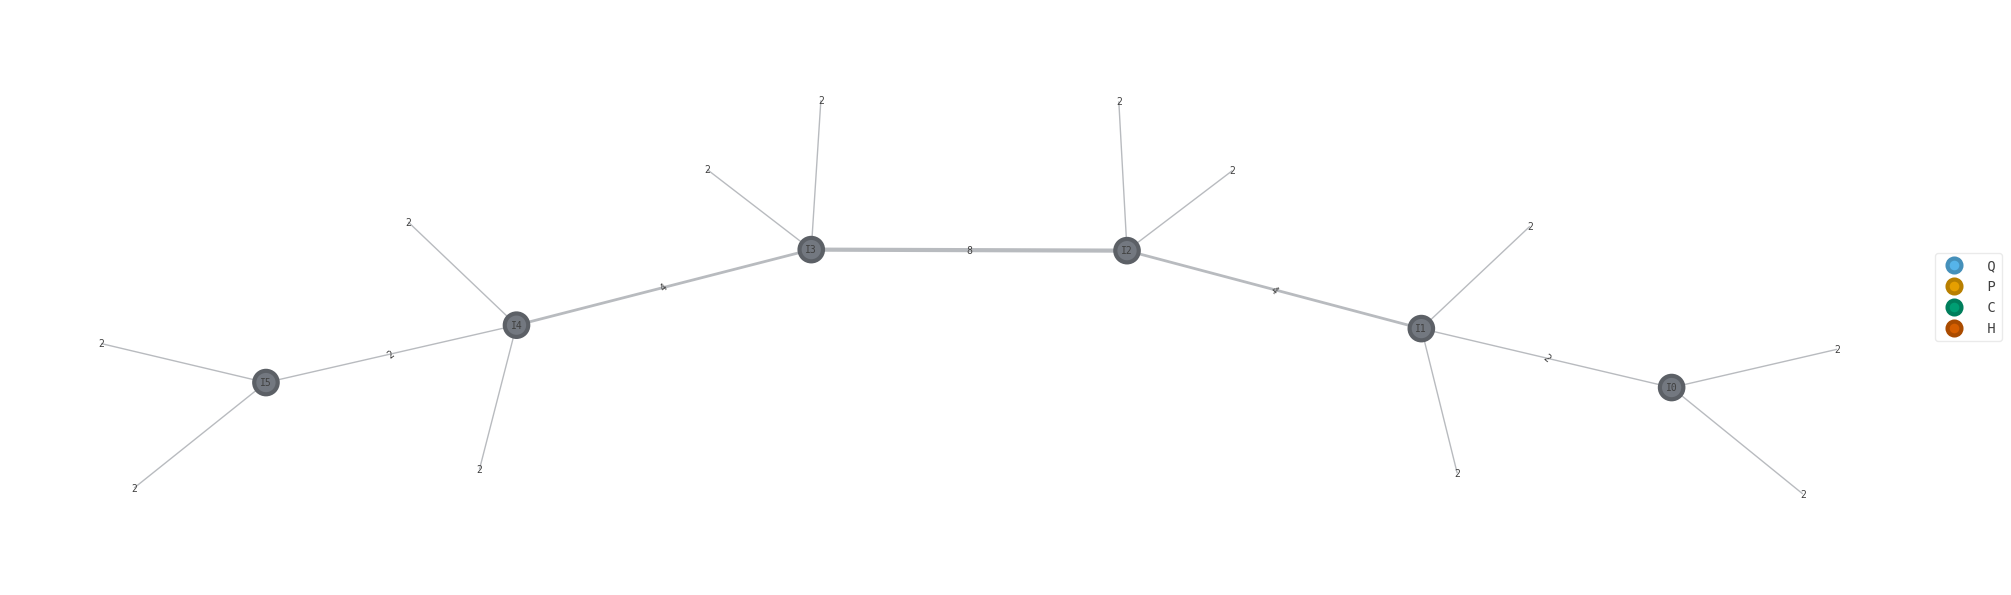

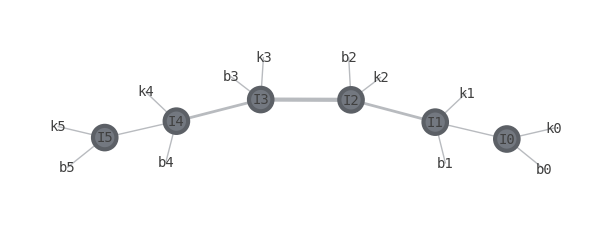

In [17]:
N = 6
QFT_MPO = QFT(6)
QFT_MPO.create_circuit()
QFT_MPO.draw()
mpo = QFT_MPO.create_MPO(max_bond_dim=-1, cutoff=1e-15, verbose=True, reverse=True)

mpo.draw()

# MPS for $f(x) = e^{2\pi i x}$

In [9]:
def f(x):
    return np.exp(2j * np.pi * x)

In [10]:
QFT_mps = MPS(N)

mps = QFT_mps.create_MPS(
    [f], 
    0, 
    1.0, 
    max_bond=-1,
    cutoff=1e-15,
    reverse=True
)

# Comparing QFT MPS applied to MPO with the FFT

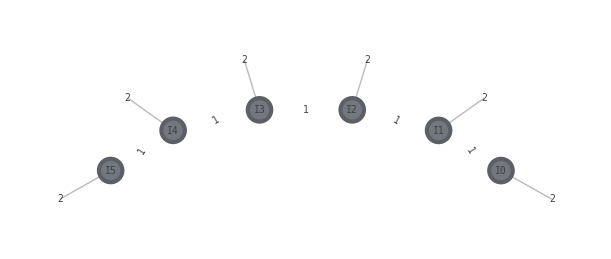

In [11]:
mpo_mps_res = mpo.apply(mps, compress=True)
mpo_mps_res.draw(show_inds='bond-size')

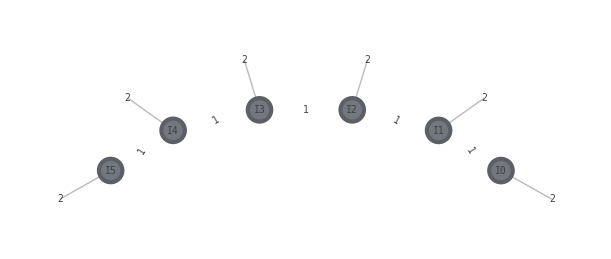

In [12]:
mpo_mps_res = mpo.apply(mps, compress=True)
mpo_mps_res.draw(show_inds='bond-size')

## QFT output vector

In [13]:
python_mpo_mps_res = mpo_mps_res.to_dense().reshape(-1,)
array_to_latex(python_mpo_mps_res, precision=16, max_size=10)

<IPython.core.display.Latex object>

## FFT output Vector

In [14]:
input = np.arange(0.0, 1.0, step=1/(2**N))
output = f(input)
fft_res = (np.fft.fft(output).reshape(-1,) / 2**(N/2)).reshape((-1,))

array_to_latex(fft_res, 16, max_size=10)

<IPython.core.display.Latex object>

## Vector norm difference

In [15]:
np.linalg.norm(python_mpo_mps_res - fft_res)

2.260075608315173e-14